# ML HW1 | Supervised Learning | Boosting
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

Note: I partially took this course in Fall of 2020 and dropped the course. Some content may trigget plagiarism tests.

## Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from matplotlib.ticker import MaxNLocator

## Set directory

In [2]:
directory = "/Users/mikepecorino/Documents/machine_learning/HW1/"

## Load inputs

In [3]:
data_all = pd.read_csv(directory + "sensor_all.csv")

## Define features and response variable

### Features list

In [4]:
features = data_all.columns[data_all.columns.isin(["subject", "activity_raw", "activity", "tag", "fold", "response_prop"]) == False]


### Features data

In [5]:
data_all_features = data_all[features]
train_features = data_all[features][data_all["tag"] == "train"]
valid_features = data_all[features][data_all["tag"] == "valid"]
test_features = data_all[features][data_all["tag"] == "test"]

### Response variable

In [6]:
response = "activity"

### Response data

In [7]:
data_all_response = data_all[response]
train_response = data_all[response][data_all["tag"] == "train"]
valid_response = data_all[response][data_all["tag"] == "valid"]
test_response = data_all[response][data_all["tag"] == "test"]

## Boosted trees

In [11]:
#Get an initial model with default parameters
xgboost_model = GradientBoostingClassifier(loss = "deviance", #deviance, exponential,
                                           learning_rate = 0.1,
                                           n_estimators = 500,
                                           subsample = 1.0,
                                           criterion = "friedman_mse",
                                           min_samples_split = 2,
                                           min_samples_leaf = 1,
                                           min_weight_fraction_leaf = 0.0,
                                           max_depth = 3,
                                           min_impurity_decrease = 0.0,
                                           init = None,
                                           random_state = 28,
                                           max_features = None,
                                           verbose = 2,
                                           max_leaf_nodes = None,
                                           warm_start = False,
                                           #presort = 'auto',
                                           validation_fraction = 0.30,
                                           n_iter_no_change = 25
                                           #tol = 0.0001
                                          )

xgboost_model.fit(train_features, train_response) 

print("XGBoost accuracy on training data: ", xgboost_model.score(train_features, train_response))
print("XGBoost accuracy on validation data: ", xgboost_model.score(valid_features, valid_response))

      Iter       Train Loss   Remaining Time 
         1           1.4104           18.21m
         2           1.1693           19.05m
         3           0.9980           19.31m
         4           0.8589           19.44m
         5           0.7475           19.48m
         6           0.6547           19.50m
         7           0.5755           19.61m
         8           0.5088           19.62m
         9           0.4536           19.60m
        10           0.4049           19.57m
        11           0.3638           19.60m
        12           0.3285           19.56m
        13           0.2962           19.52m
        14           0.2685           19.49m
        15           0.2421           19.45m
        16           0.2200           19.45m
        17           0.2025           19.42m
        18           0.1857           19.41m
        19           0.1699           19.38m
        20           0.1561           19.36m
        21           0.1440           19.35m
        2

### Grid search

In [12]:
data_cv = data_all[data_all["tag"].isin(["train", "valid"])]
folds = set(data_cv["fold"])
folds

{1, 2, 3, 4, 5}

In [19]:
#Initialize an empty data frame for recording results
xgb_results = pd.DataFrame(columns = ["iter_counter",
                                      "fold",
                                      "learning_rate",
                                      "min_samples_split",
                                      "max_depth",
                                      "in_fold_accuracy",
                                      "out_fold_accuracy"])

#Set the hyperparameter space
min_samples_splits = [2, 50, 100]
max_depths = [3, 4, 5, 6]
learning_rates = [.025, .05, .075, .1, .125]

#Start an iteration counter
iter_counter = 0

#For each min samples split, max depth, learning rate, and fold...
for min_samples_split in min_samples_splits:
    for max_depth in max_depths:
        for learning_rate in learning_rates:
            for fold in folds:
                
                #Debugging
                #min_samples_split = 2
                #max_depth = 3
                #learning_rate = .02
                #fold = 1
        
                #Increment the counter
                iter_counter = iter_counter + 1
    
                #Output message
                print("Iter:", iter_counter,
                      "| fold:", fold,
                      "| min_samples_split:", min_samples_split,
                      "| max_depth:", max_depth,
                      "| learning_rate:", learning_rate)
            
                #Train on 4 out of 5 folds
                train_fold_features = data_cv[data_cv["fold"] != fold][features]
                train_fold_response = data_cv[data_cv["fold"] != fold][response]

                #Test on the current fold
                test_fold_features = data_cv[data_cv["fold"] == fold][features]
                test_fold_response = data_cv[data_cv["fold"] == fold][response]

                #Get the model object
                xgboost_model = GradientBoostingClassifier(loss = "deviance", #deviance, exponential,
                                                           learning_rate = learning_rate,
                                                           n_estimators = 500,
                                                           subsample = 1.0,
                                                           criterion = "friedman_mse",
                                                           min_samples_split = min_samples_split,
                                                           min_samples_leaf = 1,
                                                           min_weight_fraction_leaf = 0.0,
                                                           max_depth = max_depth,
                                                           min_impurity_decrease = 0.0,
                                                           init = None,
                                                           random_state = 28,
                                                           max_features = 25,
                                                           verbose = 2,
                                                           max_leaf_nodes = None,
                                                           warm_start = False,
                                                           #presort = 'auto',
                                                           validation_fraction = 0.50,
                                                           n_iter_no_change = 25,
                                                           #tol = 0.0001
                                                          )
                
                #Fit the model
                xgboost_model.fit(train_fold_features, train_fold_response) 

                #Evaluate the model
                #In fold
                in_fold_accuracy = xgboost_model.score(train_fold_features, train_fold_response)
                #Out of fold
                out_fold_accuracy = xgboost_model.score(test_fold_features, test_fold_response)

                #Add to list of results
                xgb_results = xgb_results.append({"iter_counter": iter_counter,
                                                  "fold": fold,
                                                  "learning_rate": learning_rate,
                                                  "min_samples_split": min_samples_split,
                                                  "max_depth": max_depth,
                                                  "in_fold_accuracy": in_fold_accuracy,
                                                  "out_fold_accuracy": out_fold_accuracy},
                                                ignore_index = True)
                print(xgb_results, "\n")

Iter: 1 | fold: 1 | min_samples_split: 2 | max_depth: 3 | learning_rate: 0.025
      Iter       Train Loss   Remaining Time 
         1           1.7060           44.50s
         2           1.6351           48.43s
         3           1.5638           49.04s
         4           1.4984           48.69s
         5           1.4353           48.49s
         6           1.3781           48.25s
         7           1.3273           47.87s
         8           1.2818           47.67s
         9           1.2360           47.56s
        10           1.1938           47.20s
        11           1.1566           46.97s
        12           1.1169           46.78s
        13           1.0814           46.60s
        14           1.0485           46.38s
        15           1.0197           46.22s
        16           0.9841           46.03s
        17           0.9580           45.83s
        18           0.9315           45.72s
        19           0.9046           45.67s
        20          

       182           0.0554           30.39s
       183           0.0547           30.29s
       184           0.0541           30.19s
       185           0.0537           30.10s
       186           0.0531           30.00s
       187           0.0525           29.90s
       188           0.0520           29.81s
       189           0.0515           29.71s
       190           0.0508           29.61s
       191           0.0502           29.51s
       192           0.0497           29.45s
       193           0.0493           29.37s
       194           0.0487           29.27s
       195           0.0482           29.17s
       196           0.0476           29.08s
       197           0.0472           28.98s
       198           0.0468           28.88s
       199           0.0464           28.78s
       200           0.0459           28.69s
       201           0.0454           28.59s
       202           0.0449           28.49s
       203           0.0446           28.39s
       204

       366           0.0127           12.87s
       367           0.0126           12.78s
       368           0.0125           12.68s
       369           0.0124           12.58s
       370           0.0124           12.49s
       371           0.0123           12.39s
       372           0.0122           12.29s
       373           0.0121           12.20s
       374           0.0121           12.10s
       375           0.0120           12.01s
       376           0.0119           11.91s
       377           0.0118           11.82s
       378           0.0117           11.72s
       379           0.0117           11.63s
       380           0.0116           11.53s
       381           0.0115           11.43s
       382           0.0114           11.34s
       383           0.0114           11.24s
       384           0.0113           11.15s
       385           0.0113           11.05s
       386           0.0111           10.95s
       387           0.0111           10.86s
       388

        43           0.4759           45.38s
        44           0.4644           45.23s
        45           0.4537           45.06s
        46           0.4425           44.91s
        47           0.4327           44.77s
        48           0.4235           44.63s
        49           0.4137           44.48s
        50           0.4035           44.34s
        51           0.3953           44.20s
        52           0.3872           44.13s
        53           0.3798           44.06s
        54           0.3722           43.97s
        55           0.3638           43.86s
        56           0.3559           43.73s
        57           0.3483           43.58s
        58           0.3409           43.44s
        59           0.3336           43.30s
        60           0.3266           43.15s
        61           0.3193           43.02s
        62           0.3134           42.88s
        63           0.3074           42.74s
        64           0.3019           42.62s
        65

       228           0.0367           25.92s
       229           0.0364           25.82s
       230           0.0361           25.72s
       231           0.0358           25.62s
       232           0.0354           25.52s
       233           0.0351           25.42s
       234           0.0348           25.33s
       235           0.0345           25.24s
       236           0.0342           25.15s
       237           0.0340           25.06s
       238           0.0337           24.96s
       239           0.0335           24.86s
       240           0.0332           24.78s
       241           0.0330           24.68s
       242           0.0327           24.59s
       243           0.0324           24.49s
       244           0.0321           24.40s
       245           0.0318           24.30s
       246           0.0316           24.20s
       247           0.0313           24.11s
       248           0.0311           24.01s
       249           0.0308           23.91s
       250

       411           0.0105            8.48s
       412           0.0104            8.38s
       413           0.0104            8.29s
       414           0.0103            8.19s
       415           0.0102            8.10s
       416           0.0102            8.00s
       417           0.0101            7.91s
       418           0.0101            7.81s
       419           0.0100            7.71s
       420           0.0099            7.62s
       421           0.0099            7.52s
       422           0.0098            7.43s
       423           0.0097            7.33s
       424           0.0097            7.24s
       425           0.0096            7.14s
       426           0.0096            7.05s
       427           0.0095            6.95s
       428           0.0095            6.85s
       429           0.0094            6.76s
       430           0.0094            6.66s
       431           0.0093            6.57s
       432           0.0093            6.47s
       433

        83           0.2125           38.49s
        84           0.2092           38.40s
        85           0.2054           38.31s
        86           0.2016           38.22s
        87           0.1980           38.14s
        88           0.1944           38.06s
        89           0.1911           37.98s
        90           0.1880           37.88s
        91           0.1848           37.79s
        92           0.1814           37.69s
        93           0.1788           37.60s
        94           0.1761           37.51s
        95           0.1735           37.42s
        96           0.1710           37.33s
        97           0.1682           37.23s
        98           0.1660           37.14s
        99           0.1630           37.05s
       100           0.1607           36.95s
       101           0.1583           36.86s
       102           0.1559           36.77s
       103           0.1537           36.68s
       104           0.1512           36.58s
       105

       266           0.0262           21.81s
       267           0.0260           21.73s
       268           0.0258           21.64s
       269           0.0256           21.55s
       270           0.0253           21.46s
       271           0.0251           21.37s
       272           0.0250           21.29s
       273           0.0248           21.20s
       274           0.0246           21.11s
       275           0.0245           21.01s
       276           0.0243           20.92s
       277           0.0240           20.83s
       278           0.0239           20.74s
       279           0.0236           20.65s
       280           0.0235           20.57s
       281           0.0233           20.49s
       282           0.0231           20.39s
       283           0.0229           20.30s
       284           0.0228           20.21s
       285           0.0226           20.12s
       286           0.0224           20.03s
       287           0.0223           19.94s
       288

       450           0.0075            4.73s
       451           0.0074            4.64s
       452           0.0074            4.54s
       453           0.0073            4.45s
       454           0.0073            4.35s
       455           0.0072            4.26s
       456           0.0072            4.17s
       457           0.0071            4.07s
       458           0.0071            3.98s
       459           0.0070            3.88s
       460           0.0070            3.79s
       461           0.0069            3.69s
       462           0.0069            3.60s
       463           0.0069            3.50s
       464           0.0068            3.41s
       465           0.0068            3.31s
       466           0.0068            3.22s
       467           0.0067            3.12s
       468           0.0067            3.03s
       469           0.0066            2.93s
       470           0.0066            2.84s
       471           0.0066            2.74s
       472

       122           0.1154           35.32s
       123           0.1138           35.23s
       124           0.1122           35.13s
       125           0.1107           35.04s
       126           0.1090           34.95s
       127           0.1076           34.85s
       128           0.1060           34.76s
       129           0.1047           34.67s
       130           0.1032           34.57s
       131           0.1019           34.48s
       132           0.1005           34.38s
       133           0.0995           34.29s
       134           0.0982           34.20s
       135           0.0969           34.10s
       136           0.0957           34.01s
       137           0.0946           33.92s
       138           0.0933           33.82s
       139           0.0923           33.73s
       140           0.0910           33.64s
       141           0.0900           33.54s
       142           0.0887           33.45s
       143           0.0878           33.36s
       144

       305           0.0184           18.28s
       306           0.0182           18.19s
       307           0.0180           18.09s
       308           0.0179           18.00s
       309           0.0178           17.91s
       310           0.0176           17.81s
       311           0.0175           17.72s
       312           0.0174           17.63s
       313           0.0173           17.53s
       314           0.0172           17.44s
       315           0.0170           17.35s
       316           0.0169           17.25s
       317           0.0168           17.16s
       318           0.0167           17.06s
       319           0.0165           16.97s
       320           0.0164           16.88s
       321           0.0163           16.78s
       322           0.0161           16.69s
       323           0.0160           16.60s
       324           0.0159           16.50s
       325           0.0158           16.41s
       326           0.0157           16.32s
       327

       488           0.0057            1.13s
       489           0.0056            1.03s
       490           0.0056            0.94s
       491           0.0056            0.85s
       492           0.0055            0.75s
       493           0.0055            0.66s
       494           0.0055            0.56s
       495           0.0054            0.47s
       496           0.0054            0.38s
       497           0.0054            0.28s
       498           0.0053            0.19s
       499           0.0053            0.09s
       500           0.0053            0.00s
   iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0           1.0   1.0          0.025                2.0        3.0   
1           2.0   2.0          0.025                2.0        3.0   
2           3.0   3.0          0.025                2.0        3.0   
3           4.0   4.0          0.025                2.0        3.0   

   in_fold_accuracy  out_fold_accuracy  
0          0.990280    

       156           0.0721           32.28s
       157           0.0712           32.19s
       158           0.0703           32.09s
       159           0.0694           32.00s
       160           0.0685           31.91s
       161           0.0676           31.81s
       162           0.0667           31.72s
       163           0.0660           31.62s
       164           0.0653           31.53s
       165           0.0645           31.44s
       166           0.0637           31.34s
       167           0.0630           31.25s
       168           0.0625           31.16s
       169           0.0618           31.06s
       170           0.0612           30.97s
       171           0.0605           30.88s
       172           0.0598           30.78s
       173           0.0593           30.69s
       174           0.0587           30.60s
       175           0.0581           30.51s
       176           0.0574           30.42s
       177           0.0568           30.33s
       178

       339           0.0158           15.15s
       340           0.0157           15.06s
       341           0.0156           14.96s
       342           0.0156           14.87s
       343           0.0154           14.77s
       344           0.0153           14.68s
       345           0.0152           14.58s
       346           0.0151           14.49s
       347           0.0151           14.40s
       348           0.0150           14.30s
       349           0.0149           14.21s
       350           0.0148           14.11s
       351           0.0147           14.02s
       352           0.0146           13.93s
       353           0.0145           13.83s
       354           0.0144           13.74s
       355           0.0143           13.64s
       356           0.0142           13.55s
       357           0.0140           13.45s
       358           0.0140           13.36s
       359           0.0139           13.27s
       360           0.0138           13.17s
       361

         5           1.1837           45.75s
         6           1.1016           45.70s
         7           1.0312           45.57s
         8           0.9718           45.57s
         9           0.9123           45.48s
        10           0.8595           45.36s
        11           0.8144           45.31s
        12           0.7678           45.19s
        13           0.7273           45.11s
        14           0.6877           45.07s
        15           0.6565           44.95s
        16           0.6180           44.84s
        17           0.5895           44.78s
        18           0.5625           44.68s
        19           0.5365           44.57s
        20           0.5144           44.52s
        21           0.4910           44.43s
        22           0.4707           44.31s
        23           0.4470           44.22s
        24           0.4272           44.11s
        25           0.4085           44.00s
        26           0.3903           43.93s
        27

       188           0.0121           29.13s
       189           0.0120           29.03s
       190           0.0118           28.94s
       191           0.0117           28.85s
       192           0.0115           28.75s
       193           0.0114           28.66s
       194           0.0112           28.57s
       195           0.0110           28.47s
       196           0.0109           28.38s
       197           0.0108           28.29s
       198           0.0106           28.19s
       199           0.0105           28.10s
       200           0.0104           28.01s
       201           0.0103           27.92s
       202           0.0102           27.82s
       203           0.0101           27.73s
       204           0.0099           27.64s
       205           0.0098           27.54s
       206           0.0097           27.45s
       207           0.0096           27.36s
       208           0.0095           27.26s
       209           0.0094           27.17s
       210

       373           0.0017           11.88s
       374           0.0017           11.79s
       375           0.0017           11.69s
       376           0.0017           11.60s
       377           0.0017           11.51s
       378           0.0017           11.41s
       379           0.0016           11.32s
       380           0.0016           11.23s
       381           0.0016           11.13s
       382           0.0016           11.04s
       383           0.0016           10.95s
       384           0.0016           10.85s
       385           0.0015           10.76s
       386           0.0015           10.66s
       387           0.0015           10.57s
       388           0.0015           10.48s
       389           0.0015           10.38s
       390           0.0015           10.29s
       391           0.0015           10.20s
       392           0.0015           10.10s
       393           0.0014           10.01s
       394           0.0014            9.92s
       395

        74           0.0824           39.72s
        75           0.0804           39.63s
        76           0.0785           39.53s
        77           0.0770           39.44s
        78           0.0751           39.34s
        79           0.0740           39.25s
        80           0.0722           39.16s
        81           0.0705           39.07s
        82           0.0694           38.98s
        83           0.0681           38.89s
        84           0.0664           38.80s
        85           0.0648           38.70s
        86           0.0636           38.62s
        87           0.0621           38.53s
        88           0.0607           38.43s
        89           0.0596           38.34s
        90           0.0585           38.25s
        91           0.0574           38.15s
        92           0.0560           38.07s
        93           0.0553           37.98s
        94           0.0542           37.88s
        95           0.0532           37.80s
        96

       257           0.0060           23.18s
       258           0.0059           23.09s
       259           0.0058           23.00s
       260           0.0058           22.91s
       261           0.0057           22.82s
       262           0.0057           22.73s
       263           0.0056           22.63s
       264           0.0056           22.54s
       265           0.0055           22.45s
       266           0.0055           22.36s
       267           0.0054           22.27s
       268           0.0053           22.17s
       269           0.0053           22.08s
       270           0.0052           21.99s
       271           0.0052           21.89s
       272           0.0051           21.80s
       273           0.0051           21.71s
       274           0.0050           21.62s
       275           0.0050           21.52s
       276           0.0049           21.43s
       277           0.0049           21.34s
       278           0.0048           21.24s
       279

        32           0.3007           45.23s
        33           0.2895           45.09s
        34           0.2787           45.00s
        35           0.2684           44.94s
        36           0.2583           44.84s
        37           0.2490           44.72s
        38           0.2406           44.61s
        39           0.2316           44.47s
        40           0.2236           44.33s
        41           0.2157           44.24s
        42           0.2078           44.14s
        43           0.1997           44.00s
        44           0.1933           43.89s
        45           0.1872           43.79s
        46           0.1809           43.68s
        47           0.1749           43.59s
        48           0.1694           43.48s
        49           0.1642           43.39s
        50           0.1589           43.29s
        51           0.1537           43.18s
        52           0.1496           43.06s
        53           0.1454           42.97s
        54

       215           0.0083           27.11s
       216           0.0082           27.01s
       217           0.0081           26.91s
       218           0.0080           26.81s
       219           0.0079           26.72s
       220           0.0078           26.62s
       221           0.0077           26.52s
       222           0.0076           26.43s
       223           0.0076           26.34s
       224           0.0075           26.25s
       225           0.0074           26.16s
       226           0.0073           26.06s
       227           0.0072           25.97s
       228           0.0071           25.87s
       229           0.0070           25.77s
       230           0.0069           25.67s
       231           0.0069           25.58s
       232           0.0068           25.48s
       233           0.0067           25.38s
       234           0.0066           25.29s
       235           0.0066           25.19s
       236           0.0065           25.09s
       237

       398           0.0011            9.64s
       399           0.0011            9.54s
       400           0.0011            9.45s
       401           0.0011            9.35s
       402           0.0011            9.26s
       403           0.0011            9.17s
       404           0.0010            9.07s
       405           0.0010            8.98s
       406           0.0010            8.88s
       407           0.0010            8.79s
       408           0.0010            8.69s
       409           0.0010            8.60s
       410           0.0010            8.50s
       411           0.0010            8.41s
       412           0.0010            8.31s
       413           0.0009            8.22s
       414           0.0009            8.12s
       415           0.0009            8.03s
       416           0.0009            7.93s
       417           0.0009            7.84s
       418           0.0009            7.74s
       419           0.0009            7.65s
       420

        71           0.0879           40.21s
        72           0.0855           40.11s
        73           0.0834           40.02s
        74           0.0810           39.93s
        75           0.0789           39.83s
        76           0.0772           39.73s
        77           0.0756           39.65s
        78           0.0735           39.55s
        79           0.0721           39.46s
        80           0.0703           39.37s
        81           0.0688           39.27s
        82           0.0674           39.18s
        83           0.0659           39.08s
        84           0.0645           38.99s
        85           0.0630           38.89s
        86           0.0615           38.81s
        87           0.0601           38.71s
        88           0.0586           38.62s
        89           0.0574           38.53s
        90           0.0560           38.43s
        91           0.0547           38.33s
        92           0.0535           38.25s
        93

       254           0.0054           23.16s
       255           0.0054           23.06s
       256           0.0053           22.97s
       257           0.0053           22.88s
       258           0.0052           22.78s
       259           0.0051           22.69s
       260           0.0051           22.60s
       261           0.0050           22.50s
       262           0.0049           22.41s
       263           0.0049           22.31s
       264           0.0049           22.22s
       265           0.0048           22.12s
       266           0.0047           22.03s
       267           0.0047           21.93s
       268           0.0046           21.84s
       269           0.0046           21.75s
       270           0.0045           21.65s
       271           0.0045           21.56s
       272           0.0044           21.46s
       273           0.0044           21.37s
       274           0.0044           21.27s
       275           0.0043           21.18s
       276

         3           1.3722           45.03s
         4           1.2687           45.26s
         5           1.1743           45.33s
         6           1.0907           45.46s
         7           1.0199           45.42s
         8           0.9586           45.35s
         9           0.9007           45.37s
        10           0.8472           45.27s
        11           0.8015           45.18s
        12           0.7558           45.13s
        13           0.7152           45.07s
        14           0.6752           44.98s
        15           0.6443           44.93s
        16           0.6084           44.84s
        17           0.5814           44.73s
        18           0.5522           44.68s
        19           0.5265           44.59s
        20           0.5020           44.52s
        21           0.4783           44.46s
        22           0.4571           44.35s
        23           0.4338           44.22s
        24           0.4128           44.14s
        25

       186           0.0123           29.47s
       187           0.0121           29.37s
       188           0.0120           29.28s
       189           0.0118           29.19s
       190           0.0117           29.09s
       191           0.0115           28.99s
       192           0.0114           28.90s
       193           0.0112           28.81s
       194           0.0111           28.71s
       195           0.0110           28.62s
       196           0.0108           28.53s
       197           0.0107           28.43s
       198           0.0106           28.34s
       199           0.0105           28.25s
       200           0.0103           28.16s
       201           0.0102           28.06s
       202           0.0101           27.97s
       203           0.0100           27.87s
       204           0.0098           27.78s
       205           0.0097           27.69s
       206           0.0096           27.59s
       207           0.0095           27.50s
       208

         3           1.2301           45.08s
         4           1.1000           45.28s
         5           0.9893           45.28s
         6           0.8973           45.41s
         7           0.8202           45.36s
         8           0.7564           45.28s
         9           0.6948           45.30s
        10           0.6409           45.18s
        11           0.5964           45.08s
        12           0.5513           45.03s
        13           0.5135           44.97s
        14           0.4772           44.89s
        15           0.4494           44.85s
        16           0.4165           44.75s
        17           0.3925           44.64s
        18           0.3680           44.59s
        19           0.3469           44.50s
        20           0.3265           44.43s
        21           0.3062           44.37s
        22           0.2892           44.25s
        23           0.2707           44.13s
        24           0.2564           44.06s
        25

       186           0.0042           29.37s
       187           0.0041           29.27s
       188           0.0041           29.18s
       189           0.0040           29.09s
       190           0.0040           29.00s
       191           0.0039           28.90s
       192           0.0038           28.81s
       193           0.0037           28.72s
       194           0.0037           28.62s
       195           0.0036           28.53s
       196           0.0036           28.44s
       197           0.0035           28.35s
       198           0.0035           28.26s
       199           0.0034           28.16s
       200           0.0034           28.07s
       201           0.0033           27.98s
       202           0.0033           27.88s
       203           0.0032           27.79s
       204           0.0032           27.70s
       205           0.0031           27.61s
       206           0.0031           27.51s
       207           0.0031           27.42s
       208

        41           0.1152           42.87s
        42           0.1111           42.77s
        43           0.1067           42.68s
        44           0.1025           42.60s
        45           0.0989           42.51s
        46           0.0950           42.42s
        47           0.0916           42.34s
        48           0.0883           42.24s
        49           0.0850           42.14s
        50           0.0821           42.06s
        51           0.0790           41.97s
        52           0.0763           41.87s
        53           0.0738           41.79s
        54           0.0715           41.70s
        55           0.0695           41.60s
        56           0.0676           41.52s
        57           0.0653           41.42s
        58           0.0632           41.32s
        59           0.0614           41.24s
        60           0.0597           41.14s
        61           0.0577           41.04s
        62           0.0562           40.96s
        63

       224           0.0029           25.92s
       225           0.0029           25.82s
       226           0.0028           25.73s
       227           0.0028           25.64s
       228           0.0028           25.56s
       229           0.0027           25.47s
       230           0.0027           25.38s
       231           0.0026           25.29s
       232           0.0026           25.19s
       233           0.0026           25.10s
       234           0.0025           25.00s
       235           0.0025           24.91s
       236           0.0024           24.82s
       237           0.0024           24.72s
       238           0.0024           24.63s
       239           0.0023           24.53s
       240           0.0023           24.44s
       241           0.0023           24.34s
       242           0.0022           24.25s
       243           0.0022           24.16s
       244           0.0022           24.06s
       245           0.0021           23.97s
       246

        53           0.0713           41.53s
        54           0.0695           41.44s
        55           0.0675           41.34s
        56           0.0654           41.26s
        57           0.0631           41.17s
        58           0.0610           41.07s
        59           0.0585           40.99s
        60           0.0565           40.88s
        61           0.0546           40.79s
        62           0.0528           40.70s
        63           0.0518           40.62s
        64           0.0501           40.52s
        65           0.0487           40.44s
        66           0.0473           40.34s
        67           0.0460           40.25s
        68           0.0448           40.17s
        69           0.0435           40.07s
        70           0.0423           39.98s
        71           0.0412           39.89s
        72           0.0402           39.80s
        73           0.0390           39.70s
        74           0.0381           39.61s
        75

       236           0.0019           24.63s
       237           0.0018           24.54s
       238           0.0018           24.45s
       239           0.0018           24.35s
       240           0.0018           24.26s
       241           0.0018           24.17s
       242           0.0017           24.07s
       243           0.0017           23.98s
       244           0.0017           23.88s
       245           0.0016           23.79s
       246           0.0016           23.70s
       247           0.0016           23.61s
       248           0.0016           23.51s
       249           0.0015           23.42s
       250           0.0015           23.33s
       251           0.0015           23.23s
       252           0.0015           23.14s
       253           0.0014           23.05s
       254           0.0014           22.95s
       255           0.0014           22.86s
       256           0.0014           22.77s
       257           0.0014           22.68s
       258

       116           0.0144           35.91s
       117           0.0141           35.82s
       118           0.0138           35.72s
       119           0.0135           35.63s
       120           0.0132           35.54s
       121           0.0130           35.44s
       122           0.0127           35.36s
       123           0.0124           35.26s
       124           0.0122           35.17s
       125           0.0119           35.08s
       126           0.0116           34.98s
       127           0.0114           34.88s
       128           0.0112           34.79s
       129           0.0110           34.70s
       130           0.0107           34.60s
       131           0.0105           34.51s
       132           0.0103           34.41s
       133           0.0101           34.32s
       134           0.0100           34.23s
       135           0.0098           34.14s
       136           0.0097           34.04s
       137           0.0096           33.95s
       138

         2           1.3745           44.12s
         3           1.2148           44.87s
         4           1.0865           45.06s
         5           0.9763           45.28s
         6           0.8820           45.31s
         7           0.8032           45.26s
         8           0.7387           45.32s
         9           0.6790           45.26s
        10           0.6256           45.14s
        11           0.5807           45.12s
        12           0.5381           45.02s
        13           0.5002           44.96s
        14           0.4632           44.94s
        15           0.4351           44.84s
        16           0.4019           44.74s
        17           0.3775           44.69s
        18           0.3541           44.59s
        19           0.3340           44.51s
        20           0.3151           44.47s
        21           0.2965           44.38s
        22           0.2811           44.27s
        23           0.2629           44.20s
        24

       185           0.0047           29.51s
       186           0.0046           29.42s
       187           0.0046           29.33s
       188           0.0045           29.24s
       189           0.0044           29.14s
       190           0.0044           29.05s
       191           0.0043           28.95s
       192           0.0042           28.86s
       193           0.0042           28.76s
       194           0.0041           28.67s
       195           0.0041           28.58s
       196           0.0040           28.48s
       197           0.0039           28.39s
       198           0.0039           28.30s
       199           0.0038           28.20s
       200           0.0037           28.11s
       201           0.0037           28.01s
       202           0.0036           27.92s
       203           0.0036           27.83s
       204           0.0035           27.73s
       205           0.0034           27.64s
       206           0.0034           27.55s
       207

        63           0.0290           40.82s
        64           0.0280           40.74s
        65           0.0270           40.63s
        66           0.0262           40.54s
        67           0.0254           40.45s
        68           0.0249           40.36s
        69           0.0238           40.27s
        70           0.0230           40.17s
        71           0.0222           40.08s
        72           0.0215           39.99s
        73           0.0208           39.89s
        74           0.0203           39.79s
        75           0.0196           39.71s
        76           0.0191           39.61s
        77           0.0187           39.51s
        78           0.0181           39.42s
        79           0.0178           39.33s
        80           0.0172           39.23s
        81           0.0166           39.14s
        82           0.0162           39.05s
        83           0.0158           38.95s
        84           0.0154           38.87s
        85

         1           1.4763           44.67s
         2           1.2711           45.50s
         3           1.0904           45.64s
         4           0.9535           45.91s
         5           0.8360           45.80s
         6           0.7404           45.75s
         7           0.6632           45.76s
         8           0.6004           45.67s
         9           0.5427           45.59s
        10           0.4898           45.55s
        11           0.4473           45.44s
        12           0.4074           45.31s
        13           0.3738           45.30s
        14           0.3422           45.21s
        15           0.3197           45.09s
        16           0.2949           45.03s
        17           0.2738           44.92s
        18           0.2551           44.83s
        19           0.2390           44.77s
        20           0.2246           44.70s
        21           0.2073           44.58s
        22           0.1957           44.50s
        23

       184           0.0023           29.62s
       185           0.0023           29.52s
       186           0.0023           29.43s
       187           0.0022           29.34s
       188           0.0022           29.24s
       189           0.0021           29.15s
       190           0.0021           29.05s
       191           0.0021           28.96s
       192           0.0020           28.86s
       193           0.0020           28.77s
       194           0.0020           28.68s
       195           0.0019           28.58s
       196           0.0019           28.49s
       197           0.0019           28.40s
       198           0.0018           28.30s
       199           0.0018           28.21s
       200           0.0018           28.12s
       201           0.0017           28.02s
       202           0.0017           27.93s
       203           0.0017           27.84s
       204           0.0016           27.74s
       205           0.0016           27.65s
       206

        71           0.0227           39.96s
        72           0.0220           39.86s
        73           0.0212           39.76s
        74           0.0207           39.67s
        75           0.0202           39.58s
        76           0.0196           39.48s
        77           0.0191           39.40s
        78           0.0186           39.30s
        79           0.0182           39.21s
        80           0.0177           39.12s
        81           0.0172           39.02s
        82           0.0167           38.93s
        83           0.0164           38.84s
        84           0.0160           38.82s
        85           0.0155           38.73s
        86           0.0151           38.65s
        87           0.0148           38.56s
        88           0.0143           38.46s
        89           0.0139           38.36s
        90           0.0136           38.27s
        91           0.0132           38.20s
        92           0.0129           38.11s
        93

         1           1.4870           44.66s
         2           1.2781           45.53s
         3           1.0983           45.71s
         4           0.9575           45.96s
         5           0.8408           45.89s
         6           0.7477           45.88s
         7           0.6659           45.90s
         8           0.6040           45.80s
         9           0.5451           45.71s
        10           0.4935           45.66s
        11           0.4500           45.56s
        12           0.4102           45.43s
        13           0.3762           45.42s
        14           0.3467           45.33s
        15           0.3209           45.23s
        16           0.2948           45.16s
        17           0.2718           45.06s
        18           0.2525           44.96s
        19           0.2376           44.91s
        20           0.2219           44.83s
        21           0.2071           44.72s
        22           0.1955           44.64s
        23

       184           0.0017           29.69s
       185           0.0017           29.60s
       186           0.0017           29.50s
       187           0.0016           29.41s
       188           0.0016           29.32s
       189           0.0016           29.22s
       190           0.0016           29.13s
       191           0.0015           29.03s
       192           0.0015           28.94s
       193           0.0015           28.85s
       194           0.0014           28.76s
       195           0.0014           28.66s
       196           0.0014           28.57s
       197           0.0014           28.48s
       198           0.0013           28.38s
       199           0.0013           28.29s
       200           0.0013           28.20s
       201           0.0013           28.10s
       202           0.0013           28.01s
       203           0.0013           27.92s
       204           0.0012           27.82s
       205           0.0012           27.73s
       206

        75           0.0201           39.79s
        76           0.0195           39.70s
        77           0.0190           39.60s
        78           0.0185           39.51s
        79           0.0181           39.42s
        80           0.0176           39.32s
        81           0.0172           39.24s
        82           0.0166           39.14s
        83           0.0162           39.04s
        84           0.0159           38.97s
        85           0.0154           38.87s
        86           0.0150           38.77s
        87           0.0146           38.69s
        88           0.0142           38.59s
        89           0.0137           38.49s
        90           0.0133           38.40s
        91           0.0130           38.31s
        92           0.0127           38.21s
        93           0.0125           38.13s
        94           0.0122           38.03s
        95           0.0120           37.94s
        96           0.0117           37.85s
        97

         3           0.9887           44.99s
         4           0.8401           45.15s
         5           0.7194           45.13s
         6           0.6261           45.31s
         7           0.5467           45.25s
         8           0.4865           45.18s
         9           0.4319           45.22s
        10           0.3830           45.12s
        11           0.3462           45.00s
        12           0.3128           44.95s
        13           0.2837           44.90s
        14           0.2552           44.79s
        15           0.2349           44.76s
        16           0.2130           44.65s
        17           0.1976           44.54s
        18           0.1828           44.51s
        19           0.1702           44.42s
        20           0.1575           44.36s
        21           0.1448           44.29s
        22           0.1351           44.18s
        23           0.1252           44.07s
        24           0.1163           44.00s
        25

         1           1.4055           46.03s
         2           1.1730           47.04s
         3           0.9778           46.74s
         4           0.8361           46.76s
         5           0.7161           46.53s
         6           0.6222           46.39s
         7           0.5455           46.34s
         8           0.4855           46.21s
         9           0.4311           46.07s
        10           0.3851           45.99s
        11           0.3504           45.86s
        12           0.3167           45.71s
        13           0.2886           45.68s
        14           0.2596           45.55s
        15           0.2410           45.43s
        16           0.2199           45.35s
        17           0.2029           45.23s
        18           0.1872           45.13s
        19           0.1740           45.06s
        20           0.1626           44.97s
        21           0.1487           44.85s
        22           0.1391           44.76s
        23

       184           0.0011           29.69s
       185           0.0011           29.59s
       186           0.0011           29.50s
       187           0.0010           29.40s
       188           0.0010           29.31s
       189           0.0010           29.21s
       190           0.0010           29.12s
       191           0.0010           29.02s
       192           0.0009           28.93s
       193           0.0009           28.84s
       194           0.0009           28.75s
       195           0.0009           28.65s
       196           0.0009           28.56s
       197           0.0008           28.46s
       198           0.0008           28.37s
       199           0.0008           28.28s
       200           0.0008           28.18s
       201           0.0008           28.08s
       202           0.0008           27.99s
       203           0.0007           27.90s
       204           0.0007           27.80s
       205           0.0007           27.71s
       206

        88           0.0082           38.47s
        89           0.0079           38.38s
        90           0.0078           38.28s
        91           0.0075           38.19s
        92           0.0073           38.10s
        93           0.0071           38.01s
        94           0.0069           37.92s
        95           0.0067           37.83s
        96           0.0065           37.73s
        97           0.0063           37.64s
        98           0.0062           37.55s
        99           0.0061           37.45s
       100           0.0059           37.36s
       101           0.0057           37.26s
       102           0.0056           37.17s
       103           0.0054           37.08s
       104           0.0053           36.99s
       105           0.0052           36.90s
       106           0.0050           36.81s
       107           0.0048           36.71s
       108           0.0047           36.62s
       109           0.0045           36.53s
       110

        12           0.3160           45.44s
        13           0.2872           45.36s
        14           0.2585           45.25s
        15           0.2367           45.20s
        16           0.2145           45.08s
        17           0.1961           44.97s
        18           0.1821           44.94s
        19           0.1708           44.85s
        20           0.1584           44.77s
        21           0.1464           44.70s
        22           0.1378           44.60s
        23           0.1273           44.47s
        24           0.1185           44.40s
        25           0.1095           44.28s
        26           0.1028           44.19s
        27           0.0961           44.11s
        28           0.0900           44.03s
        29           0.0856           43.95s
        30           0.0806           43.87s
        31           0.0754           43.77s
        32           0.0713           43.67s
        33           0.0677           43.61s
        34

       195           0.0007           28.67s
       196           0.0007           28.58s
       197           0.0006           28.48s
       198           0.0006           28.39s
       199           0.0006           28.30s
       200           0.0006           28.20s
       201           0.0006           28.11s
       202           0.0006           28.02s
       203           0.0006           27.92s
       204           0.0006           27.83s
       205           0.0005           27.73s
       206           0.0005           27.64s
       207           0.0005           27.55s
       208           0.0005           27.45s
       209           0.0005           27.36s
       210           0.0005           27.27s
       211           0.0005           27.17s
    iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0            1.0   1.0          0.025                2.0        3.0   
1            2.0   2.0          0.025                2.0        3.0   
2            3.0   3.0

       102           0.0062           37.24s
       103           0.0060           37.15s
       104           0.0059           37.06s
       105           0.0057           36.96s
       106           0.0055           36.87s
       107           0.0053           36.77s
       108           0.0051           36.69s
       109           0.0049           36.59s
       110           0.0048           36.49s
       111           0.0047           36.40s
       112           0.0046           36.31s
       113           0.0044           36.22s
       114           0.0043           36.13s
       115           0.0042           36.04s
       116           0.0042           35.95s
       117           0.0041           35.86s
       118           0.0040           35.77s
       119           0.0039           35.67s
       120           0.0039           35.58s
       121           0.0038           35.49s
       122           0.0037           35.39s
       123           0.0035           35.30s
       124

        40           0.4152           55.36s
        41           0.4036           55.25s
        42           0.3925           55.15s
        43           0.3808           55.02s
        44           0.3695           54.91s
        45           0.3591           54.80s
        46           0.3498           54.71s
        47           0.3407           54.58s
        48           0.3320           54.48s
        49           0.3233           54.34s
        50           0.3148           54.22s
        51           0.3065           54.10s
        52           0.2985           53.99s
        53           0.2907           53.87s
        54           0.2833           53.75s
        55           0.2755           53.63s
        56           0.2681           53.51s
        57           0.2612           53.39s
        58           0.2542           53.28s
        59           0.2479           53.17s
        60           0.2410           53.04s
        61           0.2344           52.92s
        62

       224           0.0137           33.49s
       225           0.0136           33.37s
       226           0.0134           33.25s
       227           0.0133           33.13s
       228           0.0131           33.01s
       229           0.0130           32.89s
       230           0.0128           32.77s
       231           0.0127           32.65s
       232           0.0125           32.52s
       233           0.0123           32.40s
       234           0.0122           32.28s
       235           0.0121           32.16s
       236           0.0119           32.04s
       237           0.0118           31.92s
       238           0.0116           31.80s
       239           0.0115           31.68s
       240           0.0114           31.55s
       241           0.0113           31.43s
       242           0.0111           31.31s
       243           0.0110           31.19s
       244           0.0109           31.07s
       245           0.0107           30.95s
       246

       408           0.0022           11.19s
       409           0.0022           11.07s
       410           0.0022           10.95s
       411           0.0022           10.83s
       412           0.0021           10.70s
       413           0.0021           10.58s
       414           0.0021           10.46s
       415           0.0021           10.34s
       416           0.0021           10.22s
       417           0.0021           10.10s
       418           0.0020            9.98s
       419           0.0020            9.85s
       420           0.0020            9.73s
       421           0.0020            9.61s
       422           0.0020            9.49s
       423           0.0019            9.37s
       424           0.0019            9.25s
       425           0.0019            9.12s
       426           0.0019            9.00s
       427           0.0019            8.88s
       428           0.0019            8.76s
       429           0.0018            8.64s
       430

        20           0.7899           57.84s
        21           0.7631           57.72s
        22           0.7389           57.61s
        23           0.7145           57.45s
        24           0.6907           57.34s
        25           0.6684           57.21s
        26           0.6467           57.13s
        27           0.6257           57.01s
        28           0.6057           56.93s
        29           0.5875           56.82s
        30           0.5683           56.70s
        31           0.5499           56.59s
        32           0.5326           56.48s
        33           0.5174           56.37s
        34           0.5025           56.26s
        35           0.4877           56.14s
        36           0.4723           56.03s
        37           0.4577           55.91s
        38           0.4443           55.80s
        39           0.4314           55.67s
        40           0.4186           55.56s
        41           0.4068           55.45s
        42

       204           0.0197           36.00s
       205           0.0194           35.88s
       206           0.0192           35.76s
       207           0.0190           35.64s
       208           0.0187           35.51s
       209           0.0186           35.39s
       210           0.0183           35.27s
       211           0.0181           35.15s
       212           0.0179           35.03s
       213           0.0177           34.91s
       214           0.0174           34.79s
       215           0.0172           34.67s
       216           0.0170           34.55s
       217           0.0168           34.43s
       218           0.0166           34.31s
       219           0.0165           34.19s
       220           0.0163           34.07s
       221           0.0161           33.95s
       222           0.0159           33.83s
       223           0.0158           33.71s
       224           0.0156           33.59s
       225           0.0155           33.46s
       226

       388           0.0032           13.65s
       389           0.0031           13.53s
       390           0.0031           13.41s
       391           0.0031           13.29s
       392           0.0030           13.17s
       393           0.0030           13.05s
       394           0.0030           12.92s
       395           0.0029           12.80s
       396           0.0029           12.68s
       397           0.0029           12.56s
       398           0.0029           12.44s
       399           0.0028           12.31s
       400           0.0028           12.19s
       401           0.0028           12.07s
       402           0.0028           11.95s
       403           0.0028           11.83s
       404           0.0027           11.71s
       405           0.0027           11.58s
       406           0.0027           11.46s
       407           0.0027           11.34s
       408           0.0026           11.22s
       409           0.0026           11.10s
       410

         2           1.6053           59.12s
         3           1.5250           59.38s
         4           1.4521           59.58s
         5           1.3891           59.43s
         6           1.3283           59.42s
         7           1.2727           59.33s
         8           1.2229           59.24s
         9           1.1731           59.15s
        10           1.1270           59.02s
        11           1.0851           58.86s
        12           1.0423           58.77s
        13           1.0040           58.66s
        14           0.9681           58.57s
        15           0.9332           58.43s
        16           0.8988           58.33s
        17           0.8687           58.19s
        18           0.8396           58.10s
        19           0.8115           57.98s
        20           0.7875           57.89s
        21           0.7615           57.77s
        22           0.7373           57.66s
        23           0.7132           57.50s
        24

       186           0.0238           37.98s
       187           0.0235           37.86s
       188           0.0232           37.74s
       189           0.0229           37.62s
       190           0.0225           37.50s
       191           0.0221           37.37s
       192           0.0218           37.25s
       193           0.0215           37.13s
       194           0.0212           37.01s
       195           0.0210           36.89s
       196           0.0206           36.78s
       197           0.0204           36.66s
       198           0.0201           36.54s
       199           0.0199           36.42s
       200           0.0197           36.30s
       201           0.0194           36.17s
       202           0.0191           36.05s
       203           0.0189           35.93s
       204           0.0186           35.81s
       205           0.0184           35.69s
       206           0.0182           35.57s
       207           0.0179           35.45s
       208

       370           0.0032           15.77s
       371           0.0032           15.65s
       372           0.0032           15.53s
       373           0.0031           15.41s
       374           0.0031           15.29s
       375           0.0031           15.17s
       376           0.0031           15.05s
       377           0.0030           14.92s
       378           0.0030           14.80s
       379           0.0030           14.68s
       380           0.0029           14.56s
       381           0.0029           14.44s
       382           0.0029           14.32s
       383           0.0028           14.20s
       384           0.0028           14.08s
       385           0.0028           13.95s
       386           0.0028           13.83s
       387           0.0027           13.71s
       388           0.0027           13.59s
       389           0.0027           13.47s
       390           0.0026           13.35s
       391           0.0026           13.23s
       392

         2           1.6016           57.11s
         3           1.5239           58.05s
         4           1.4507           58.58s
         5           1.3891           58.71s
         6           1.3284           58.85s
         7           1.2718           58.91s
         8           1.2240           58.90s
         9           1.1747           58.85s
        10           1.1295           58.80s
        11           1.0888           58.66s
        12           1.0487           58.61s
        13           1.0099           58.55s
        14           0.9728           58.48s
        15           0.9392           58.36s
        16           0.9036           58.28s
        17           0.8744           58.15s
        18           0.8450           58.08s
        19           0.8165           57.96s
        20           0.7915           57.88s
        21           0.7650           57.77s
        22           0.7402           57.67s
        23           0.7156           57.52s
        24

       186           0.0231           38.66s
       187           0.0228           38.55s
       188           0.0225           38.43s
       189           0.0222           38.31s
       190           0.0218           38.19s
       191           0.0215           38.07s
       192           0.0212           37.95s
       193           0.0209           37.84s
       194           0.0206           37.73s
       195           0.0203           37.61s
       196           0.0200           37.49s
       197           0.0197           37.37s
       198           0.0195           37.25s
       199           0.0192           37.13s
       200           0.0190           37.01s
       201           0.0187           36.89s
       202           0.0185           36.77s
       203           0.0182           36.64s
       204           0.0179           36.52s
       205           0.0177           36.40s
       206           0.0175           36.28s
       207           0.0173           36.16s
       208

       370           0.0031           16.19s
       371           0.0030           16.06s
       372           0.0030           15.94s
       373           0.0030           15.81s
       374           0.0030           15.69s
       375           0.0029           15.56s
       376           0.0029           15.44s
       377           0.0029           15.31s
       378           0.0029           15.19s
       379           0.0028           15.06s
       380           0.0028           14.94s
       381           0.0028           14.81s
       382           0.0027           14.69s
       383           0.0027           14.57s
       384           0.0027           14.44s
       385           0.0027           14.32s
       386           0.0026           14.19s
       387           0.0026           14.07s
       388           0.0026           13.95s
       389           0.0026           13.83s
       390           0.0025           13.71s
       391           0.0025           13.59s
       392

         2           1.6000           56.56s
         3           1.5211           58.99s
         4           1.4498            1.00m
         5           1.3864            1.01m
         6           1.3256            1.02m
         7           1.2696            1.02m
         8           1.2186            1.01m
         9           1.1684            1.01m
        10           1.1230            1.00m
        11           1.0808            1.00m
        12           1.0381            1.01m
        13           0.9997            1.01m
        14           0.9620            1.01m
        15           0.9286            1.01m
        16           0.8928            1.00m
        17           0.8626            1.00m
        18           0.8336            1.00m
        19           0.8045            1.00m
        20           0.7799            1.00m
        21           0.7538            1.00m
        22           0.7296           59.96s
        23           0.7050           59.86s
        24

       186           0.0221           38.77s
       187           0.0218           38.64s
       188           0.0215           38.51s
       189           0.0212           38.39s
       190           0.0209           38.26s
       191           0.0206           38.13s
       192           0.0203           38.01s
       193           0.0200           37.88s
       194           0.0198           37.76s
       195           0.0196           37.64s
       196           0.0194           37.51s
       197           0.0191           37.39s
       198           0.0189           37.26s
       199           0.0186           37.14s
       200           0.0184           37.02s
       201           0.0181           36.89s
       202           0.0179           36.76s
       203           0.0176           36.64s
       204           0.0174           36.51s
       205           0.0172           36.39s
       206           0.0170           36.26s
       207           0.0168           36.14s
       208

       370           0.0035           16.00s
       371           0.0035           15.88s
       372           0.0035           15.75s
       373           0.0034           15.63s
       374           0.0034           15.51s
       375           0.0034           15.38s
       376           0.0033           15.26s
       377           0.0033           15.14s
       378           0.0033           15.01s
       379           0.0032           14.89s
       380           0.0032           14.77s
       381           0.0032           14.64s
       382           0.0032           14.52s
       383           0.0031           14.40s
       384           0.0031           14.27s
       385           0.0031           14.15s
       386           0.0031           14.03s
       387           0.0031           13.90s
       388           0.0031           13.78s
       389           0.0030           13.66s
       390           0.0030           13.53s
       391           0.0030           13.41s
       392

         6           1.0274           58.62s
         7           0.9518           58.64s
         8           0.8852           58.66s
         9           0.8232           58.61s
        10           0.7681           58.55s
        11           0.7197           58.41s
        12           0.6723           58.36s
        13           0.6313           58.28s
        14           0.5920           58.24s
        15           0.5563           58.10s
        16           0.5208           58.03s
        17           0.4909           57.91s
        18           0.4623           57.83s
        19           0.4365           57.71s
        20           0.4143           57.64s
        21           0.3915           57.52s
        22           0.3710           57.42s
        23           0.3508           57.26s
        24           0.3309           57.15s
        25           0.3133           57.02s
        26           0.2972           56.93s
        27           0.2812           56.82s
        28

       190           0.0027           37.61s
       191           0.0027           37.48s
       192           0.0026           37.36s
       193           0.0026           37.24s
       194           0.0025           37.12s
       195           0.0025           37.00s
       196           0.0024           36.88s
       197           0.0024           36.76s
       198           0.0024           36.64s
       199           0.0023           36.52s
       200           0.0023           36.40s
       201           0.0023           36.28s
       202           0.0022           36.16s
       203           0.0022           36.04s
       204           0.0022           35.92s
       205           0.0021           35.80s
       206           0.0021           35.68s
       207           0.0021           35.57s
       208           0.0020           35.45s
       209           0.0020           35.32s
       210           0.0020           35.20s
       211           0.0019           35.08s
       212

         2           1.4419           57.66s
         3           1.3143           58.53s
         4           1.2027           59.01s
         5           1.1133           59.07s
         6           1.0295           59.21s
         7           0.9535           59.22s
         8           0.8887           59.23s
         9           0.8268           59.15s
        10           0.7693           59.09s
        11           0.7215           58.93s
        12           0.6759           58.87s
        13           0.6332           58.78s
        14           0.5934           58.71s
        15           0.5580           58.58s
        16           0.5231           58.49s
        17           0.4936           58.35s
        18           0.4662           58.27s
        19           0.4402           58.14s
        20           0.4182           58.07s
        21           0.3940           57.95s
        22           0.3735           57.85s
        23           0.3532           57.70s
        24

       186           0.0036           38.29s
       187           0.0035           38.16s
       188           0.0035           38.04s
       189           0.0034           37.92s
       190           0.0033           37.80s
       191           0.0033           37.68s
       192           0.0032           37.55s
       193           0.0031           37.43s
       194           0.0031           37.31s
       195           0.0030           37.19s
       196           0.0030           37.07s
       197           0.0029           36.95s
       198           0.0029           36.83s
       199           0.0029           36.71s
       200           0.0028           36.59s
       201           0.0027           36.47s
       202           0.0027           36.35s
       203           0.0027           36.22s
       204           0.0026           36.10s
       205           0.0026           35.98s
       206           0.0025           35.86s
       207           0.0025           35.74s
       208

         2           1.4471           58.95s
         3           1.3149           59.22s
         4           1.2024           59.39s
         5           1.1109           59.25s
         6           1.0262           59.26s
         7           0.9506           59.15s
         8           0.8866           59.08s
         9           0.8250           59.00s
        10           0.7707           58.88s
        11           0.7216           58.70s
        12           0.6739           58.63s
        13           0.6319           58.52s
        14           0.5935           58.43s
        15           0.5577           58.28s
        16           0.5240           58.20s
        17           0.4945           58.06s
        18           0.4676           57.98s
        19           0.4415           57.86s
        20           0.4193           57.79s
        21           0.3962           57.66s
        22           0.3754           57.55s
        23           0.3554           57.39s
        24

       186           0.0030           38.12s
       187           0.0030           38.00s
       188           0.0029           37.88s
       189           0.0028           37.76s
       190           0.0028           37.64s
       191           0.0027           37.52s
       192           0.0027           37.40s
       193           0.0026           37.27s
       194           0.0026           37.15s
       195           0.0025           37.03s
       196           0.0025           36.91s
       197           0.0024           36.79s
       198           0.0024           36.67s
       199           0.0023           36.55s
       200           0.0023           36.43s
       201           0.0023           36.31s
       202           0.0022           36.18s
       203           0.0022           36.06s
       204           0.0022           35.94s
       205           0.0021           35.82s
       206           0.0021           35.70s
       207           0.0021           35.58s
       208

         2           1.4407           57.09s
         3           1.3107           58.05s
         4           1.1976           58.60s
         5           1.1080           58.74s
         6           1.0235           58.89s
         7           0.9486           58.88s
         8           0.8864           58.86s
         9           0.8257           58.80s
        10           0.7710           58.72s
        11           0.7237           58.59s
        12           0.6760           58.57s
        13           0.6340           58.52s
        14           0.5943           58.46s
        15           0.5592           58.35s
        16           0.5235           58.26s
        17           0.4949           58.15s
        18           0.4681           58.06s
        19           0.4418           57.95s
        20           0.4177           57.88s
        21           0.3950           57.75s
        22           0.3741           57.67s
        23           0.3531           57.51s
        24

       186           0.0029           39.59s
       187           0.0028           39.46s
       188           0.0028           39.33s
       189           0.0027           39.21s
       190           0.0027           39.09s
       191           0.0026           38.96s
       192           0.0026           38.83s
       193           0.0025           38.70s
       194           0.0025           38.57s
       195           0.0024           38.44s
       196           0.0024           38.32s
       197           0.0024           38.19s
       198           0.0023           38.06s
       199           0.0023           37.93s
       200           0.0022           37.81s
       201           0.0022           37.68s
       202           0.0022           37.55s
       203           0.0021           37.42s
       204           0.0021           37.29s
       205           0.0021           37.16s
       206           0.0020           37.03s
       207           0.0020           36.90s
       208

        14           0.5840           59.46s
        15           0.5490           59.26s
        16           0.5134           59.12s
        17           0.4841           58.94s
        18           0.4554           58.83s
        19           0.4295           58.68s
        20           0.4071           58.57s
        21           0.3846           58.43s
        22           0.3644           58.30s
        23           0.3444           58.11s
        24           0.3254           57.98s
        25           0.3081           57.84s
        26           0.2918           57.75s
        27           0.2763           57.62s
        28           0.2624           57.58s
        29           0.2488           57.48s
        30           0.2358           57.35s
        31           0.2238           57.24s
        32           0.2127           57.25s
        33           0.2029           57.11s
        34           0.1933           56.98s
        35           0.1839           56.83s
        36

       198           0.0027           36.83s
       199           0.0026           36.71s
       200           0.0026           36.59s
       201           0.0025           36.47s
       202           0.0025           36.35s
       203           0.0025           36.22s
       204           0.0024           36.10s
       205           0.0024           35.98s
       206           0.0023           35.86s
       207           0.0023           35.74s
       208           0.0023           35.62s
       209           0.0022           35.49s
       210           0.0022           35.37s
       211           0.0022           35.25s
       212           0.0022           35.13s
       213           0.0021           35.01s
       214           0.0021           34.88s
       215           0.0021           34.76s
       216           0.0020           34.64s
       217           0.0020           34.52s
       218           0.0020           34.39s
       219           0.0019           34.27s
       220

        22           0.2066           57.27s
        23           0.1917           57.11s
        24           0.1777           57.00s
        25           0.1656           56.88s
        26           0.1538           56.80s
        27           0.1432           56.68s
        28           0.1340           56.60s
        29           0.1262           56.50s
        30           0.1180           56.40s
        31           0.1108           56.28s
        32           0.1044           56.17s
        33           0.0981           56.05s
        34           0.0922           55.95s
        35           0.0872           55.84s
        36           0.0821           55.73s
        37           0.0769           55.63s
        38           0.0732           55.56s
        39           0.0689           55.42s
        40           0.0655           55.32s
        41           0.0624           55.20s
        42           0.0590           55.08s
        43           0.0559           54.96s
        44

       206           0.0004           35.64s
       207           0.0004           35.52s
       208           0.0004           35.41s
       209           0.0004           35.28s
       210           0.0004           35.16s
       211           0.0004           35.04s
       212           0.0004           34.92s
       213           0.0004           34.80s
       214           0.0004           34.68s
       215           0.0004           34.56s
       216           0.0003           34.44s
       217           0.0003           34.31s
       218           0.0003           34.19s
    iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0            1.0   1.0          0.025                2.0        3.0   
1            2.0   2.0          0.025                2.0        3.0   
2            3.0   3.0          0.025                2.0        3.0   
3            4.0   4.0          0.025                2.0        3.0   
4            5.0   5.0          0.025                2.0    

        76           0.0156           51.56s
        77           0.0152           51.43s
        78           0.0147           51.32s
        79           0.0142           51.20s
        80           0.0136           51.08s
        81           0.0133           50.96s
        82           0.0129           50.85s
        83           0.0125           50.72s
        84           0.0121           50.60s
        85           0.0117           50.48s
        86           0.0113           50.36s
        87           0.0109           50.24s
        88           0.0105           50.11s
        89           0.0102           49.99s
        90           0.0100           49.88s
        91           0.0097           49.75s
        92           0.0094           49.63s
        93           0.0092           49.51s
        94           0.0089           49.39s
        95           0.0086           49.27s
        96           0.0084           49.15s
        97           0.0082           49.03s
        98

         2           1.3071           58.87s
         3           1.1419           59.13s
         4           1.0080           59.37s
         5           0.9045           59.20s
         6           0.8113           59.20s
         7           0.7309           59.12s
         8           0.6651           59.07s
         9           0.6022           58.97s
        10           0.5492           58.84s
        11           0.5019           58.68s
        12           0.4580           58.62s
        13           0.4196           58.89s
        14           0.3854           59.18s
        15           0.3548           58.97s
        16           0.3265           58.81s
        17           0.3030           58.65s
        18           0.2809           58.51s
        19           0.2610           58.34s
        20           0.2434           58.23s
        21           0.2254           58.08s
        22           0.2099           57.94s
        23           0.1954           57.78s
        24

       186           0.0007           38.12s
       187           0.0006           38.00s
       188           0.0006           37.88s
       189           0.0006           37.75s
       190           0.0006           37.63s
       191           0.0006           37.51s
       192           0.0005           37.39s
       193           0.0005           37.26s
       194           0.0005           37.15s
       195           0.0005           37.02s
       196           0.0005           36.90s
       197           0.0005           36.78s
       198           0.0005           36.66s
       199           0.0005           36.54s
       200           0.0005           36.42s
       201           0.0004           36.30s
       202           0.0004           36.18s
       203           0.0004           36.05s
       204           0.0004           35.93s
       205           0.0004           35.81s
       206           0.0004           35.69s
       207           0.0004           35.57s
       208

        50           0.0394           54.52s
        51           0.0378           54.40s
        52           0.0359           54.29s
        53           0.0343           54.16s
        54           0.0328           54.05s
        55           0.0313           53.92s
        56           0.0299           53.81s
        57           0.0283           53.69s
        58           0.0271           53.57s
        59           0.0259           53.45s
        60           0.0249           53.33s
        61           0.0237           53.21s
        62           0.0228           53.09s
        63           0.0218           52.97s
        64           0.0209           52.86s
        65           0.0201           52.74s
        66           0.0193           52.62s
        67           0.0187           52.49s
        68           0.0182           52.38s
        69           0.0175           52.26s
        70           0.0168           52.15s
        71           0.0161           52.02s
        72

      Iter       Train Loss   Remaining Time 
         1           1.4989           51.85s
         2           1.2955           56.38s
         3           1.1329           57.67s
         4           1.0030           58.25s
         5           0.8975           58.38s
         6           0.8025           58.55s
         7           0.7222           58.58s
         8           0.6543           58.61s
         9           0.5922           58.58s
        10           0.5392           58.53s
        11           0.4922           58.41s
        12           0.4483           58.38s
        13           0.4098           58.29s
        14           0.3754           58.23s
        15           0.3456           58.11s
        16           0.3176           58.02s
        17           0.2937           57.90s
        18           0.2721           57.82s
        19           0.2520           57.71s
        20           0.2347           57.64s
        21           0.2169           57.52s
        2

      Iter       Train Loss   Remaining Time 
         1           1.4074           53.32s
         2           1.1766           56.78s
         3           0.9950           57.80s
         4           0.8488           58.29s
         5           0.7394           58.40s
         6           0.6471           58.54s
         7           0.5694           58.55s
         8           0.5045           58.57s
         9           0.4468           58.53s
        10           0.3967           58.46s
        11           0.3560           58.31s
        12           0.3176           58.29s
        13           0.2865           58.21s
        14           0.2598           58.15s
        15           0.2348           58.09s
        16           0.2111           57.98s
        17           0.1924           57.87s
        18           0.1760           57.78s
        19           0.1612           57.66s
        20           0.1472           57.58s
        21           0.1340           57.46s
        2

         2           1.1763           57.64s
         3           0.9981           58.47s
         4           0.8541           58.89s
         5           0.7498           58.97s
         6           0.6552           59.16s
         7           0.5749           59.17s
         8           0.5116           59.21s
         9           0.4529           59.15s
        10           0.4027           59.08s
        11           0.3612           58.93s
        12           0.3249           58.89s
        13           0.2923           58.79s
        14           0.2626           58.72s
        15           0.2376           58.57s
        16           0.2157           58.47s
        17           0.1969           58.35s
        18           0.1809           58.27s
        19           0.1663           58.15s
        20           0.1531           58.08s
        21           0.1395           57.95s
        22           0.1292           57.84s
        23           0.1175           57.69s
        24

      Iter       Train Loss   Remaining Time 
         1           1.4225           58.15s
         2           1.1829           59.32s
         3           0.9979           59.48s
         4           0.8527           59.65s
         5           0.7458           59.48s
         6           0.6496           59.49s
         7           0.5721           59.39s
         8           0.5077           59.32s
         9           0.4495           59.23s
        10           0.4030           59.11s
        11           0.3606           58.94s
        12           0.3224           58.89s
        13           0.2907           58.78s
        14           0.2631           58.69s
        15           0.2373           58.53s
        16           0.2149           58.40s
        17           0.1958           58.28s
        18           0.1796           58.17s
        19           0.1646           58.03s
        20           0.1515           57.94s
        21           0.1390           57.80s
        2

         1           1.4062           54.62s
         2           1.1782           57.33s
         3           0.9933           58.41s
         4           0.8450           58.80s
         5           0.7394           59.02s
         6           0.6463           59.06s
         7           0.5676           59.13s
         8           0.5052           59.07s
         9           0.4469           59.11s
        10           0.3983           58.98s
        11           0.3586           58.88s
        12           0.3198           58.78s
        13           0.2876           58.76s
        14           0.2603           58.65s
        15           0.2344           58.53s
        16           0.2126           58.41s
        17           0.1942           58.32s
        18           0.1776           58.22s
        19           0.1627           58.12s
        20           0.1489           58.02s
        21           0.1373           57.93s
        22           0.1259           57.81s
        23

         1           1.4099           52.34s
         2           1.1688           56.20s
         3           0.9880           57.74s
         4           0.8473           58.27s
         5           0.7383           58.56s
         6           0.6420           58.65s
         7           0.5603           58.77s
         8           0.4952           58.71s
         9           0.4377           58.72s
        10           0.3909           58.65s
        11           0.3505           58.56s
        12           0.3126           58.49s
        13           0.2798           58.45s
        14           0.2507           58.35s
        15           0.2275           58.29s
        16           0.2052           58.15s
        17           0.1863           58.06s
        18           0.1700           57.97s
        19           0.1550           57.87s
        20           0.1431           57.78s
        21           0.1298           57.69s
        22           0.1201           57.57s
        23

         1           1.3209           53.41s
         2           1.0646           56.52s
         3           0.8720           57.77s
         4           0.7226           58.20s
         5           0.6142           58.40s
         6           0.5242           58.48s
         7           0.4517           58.63s
         8           0.3923           58.62s
         9           0.3405           58.65s
        10           0.2979           58.51s
        11           0.2621           58.42s
        12           0.2286           58.34s
        13           0.2028           58.28s
        14           0.1791           58.14s
        15           0.1593           58.05s
        16           0.1421           57.91s
        17           0.1274           57.85s
        18           0.1146           57.77s
        19           0.1043           57.71s
        20           0.0937           57.61s
        21           0.0846           57.52s
        22           0.0775           57.39s
        23

         2           1.0656           57.41s
         3           0.8775           58.24s
         4           0.7286           58.68s
         5           0.6251           58.73s
         6           0.5347           58.95s
         7           0.4593           58.96s
         8           0.4008           59.02s
         9           0.3491           58.94s
        10           0.3046           58.86s
        11           0.2686           58.71s
        12           0.2380           58.66s
        13           0.2112           58.56s
        14           0.1863           58.49s
        15           0.1660           58.34s
        16           0.1489           58.23s
        17           0.1328           58.09s
        18           0.1206           58.01s
        19           0.1097           57.88s
        20           0.1000           57.81s
        21           0.0895           57.69s
        22           0.0824           57.59s
        23           0.0741           57.43s
        24

         2           1.0724           59.03s
         3           0.8761           59.28s
         4           0.7263           59.56s
         5           0.6207           59.38s
         6           0.5267           59.37s
         7           0.4557           59.32s
         8           0.3965           59.28s
         9           0.3447           59.18s
        10           0.3006           59.03s
        11           0.2659           58.87s
        12           0.2344           58.82s
        13           0.2079           58.71s
        14           0.1843           58.60s
        15           0.1639           58.44s
        16           0.1464           58.31s
        17           0.1310           58.16s
        18           0.1191           58.07s
        19           0.1078           57.94s
        20           0.0976           57.84s
        21           0.0889           57.71s
        22           0.0820           57.61s
        23           0.0739           57.46s
        24

         2           1.0665           57.04s
         3           0.8716           57.99s
         4           0.7214           58.56s
         5           0.6161           58.73s
         6           0.5254           58.87s
         7           0.4525           58.89s
         8           0.3939           58.91s
         9           0.3426           58.85s
        10           0.3007           58.78s
        11           0.2653           58.66s
        12           0.2309           58.63s
        13           0.2037           58.55s
        14           0.1808           58.49s
        15           0.1620           58.35s
        16           0.1445           58.25s
        17           0.1292           58.13s
        18           0.1166           58.06s
        19           0.1060           57.95s
        20           0.0952           57.88s
        21           0.0860           57.76s
        22           0.0783           57.65s
        23           0.0712           57.52s
        24

         2           1.0563           56.41s
         3           0.8647           57.65s
         4           0.7208           58.32s
         5           0.6134           58.46s
         6           0.5213           58.61s
         7           0.4459           58.68s
         8           0.3849           58.76s
         9           0.3332           58.73s
        10           0.2919           58.68s
        11           0.2568           58.56s
        12           0.2254           58.58s
        13           0.1970           58.48s
        14           0.1744           58.42s
        15           0.1558           58.31s
        16           0.1385           58.22s
        17           0.1232           58.11s
        18           0.1117           58.07s
        19           0.1002           57.96s
        20           0.0915           57.89s
        21           0.0829           57.78s
        22           0.0754           57.66s
        23           0.0685           57.52s
        24

         2           1.5877            1.13m
         3           1.5055            1.16m
         4           1.4256            1.18m
         5           1.3549            1.18m
         6           1.2914            1.19m
         7           1.2321            1.19m
         8           1.1763            1.19m
         9           1.1272            1.19m
        10           1.0786            1.19m
        11           1.0322            1.19m
        12           0.9878            1.19m
        13           0.9488            1.19m
        14           0.9108            1.19m
        15           0.8756            1.19m
        16           0.8410            1.19m
        17           0.8106            1.19m
        18           0.7789            1.19m
        19           0.7491            1.18m
        20           0.7224            1.18m
        21           0.6953            1.18m
        22           0.6690            1.18m
        23           0.6451            1.17m
        24

       186           0.0095           46.55s
       187           0.0093           46.42s
       188           0.0092           46.27s
       189           0.0090           46.13s
       190           0.0088           45.98s
       191           0.0087           45.83s
       192           0.0085           45.68s
       193           0.0084           45.53s
       194           0.0082           45.38s
       195           0.0080           45.23s
       196           0.0079           45.09s
       197           0.0077           44.94s
       198           0.0076           44.79s
       199           0.0074           44.64s
       200           0.0073           44.49s
       201           0.0071           44.35s
       202           0.0070           44.20s
       203           0.0069           44.05s
       204           0.0068           43.90s
       205           0.0066           43.75s
       206           0.0065           43.61s
       207           0.0064           43.46s
       208

       370           0.0006           19.31s
       371           0.0006           19.16s
       372           0.0006           19.02s
       373           0.0006           18.87s
       374           0.0006           18.72s
       375           0.0006           18.57s
       376           0.0005           18.42s
       377           0.0005           18.27s
       378           0.0005           18.12s
       379           0.0005           17.98s
       380           0.0005           17.83s
       381           0.0005           17.68s
       382           0.0005           17.53s
       383           0.0005           17.39s
       384           0.0005           17.24s
       385           0.0005           17.10s
       386           0.0005           16.95s
       387           0.0005           16.80s
       388           0.0005           16.66s
       389           0.0005           16.51s
       390           0.0005           16.36s
       391           0.0004           16.21s
       392

         6           1.2906            1.20m
         7           1.2317            1.20m
         8           1.1771            1.20m
         9           1.1261            1.20m
        10           1.0774            1.20m
        11           1.0321            1.19m
        12           0.9888            1.19m
        13           0.9495            1.19m
        14           0.9117            1.19m
        15           0.8766            1.19m
        16           0.8422            1.19m
        17           0.8110            1.19m
        18           0.7804            1.19m
        19           0.7508            1.18m
        20           0.7235            1.18m
        21           0.6960            1.18m
        22           0.6712            1.18m
        23           0.6467            1.17m
        24           0.6236            1.17m
        25           0.6019            1.17m
        26           0.5809            1.17m
        27           0.5602            1.17m
        28

       190           0.0099           46.21s
       191           0.0097           46.05s
       192           0.0095           45.91s
       193           0.0094           45.76s
       194           0.0093           45.61s
       195           0.0091           45.46s
       196           0.0089           45.31s
       197           0.0088           45.17s
       198           0.0086           45.02s
       199           0.0084           44.87s
       200           0.0083           44.72s
       201           0.0081           44.57s
       202           0.0080           44.42s
       203           0.0079           44.27s
       204           0.0077           44.12s
       205           0.0076           43.97s
       206           0.0075           43.82s
       207           0.0073           43.67s
       208           0.0072           43.52s
       209           0.0071           43.38s
       210           0.0070           43.22s
       211           0.0069           43.07s
       212

       374           0.0007           18.80s
       375           0.0007           18.65s
       376           0.0007           18.50s
       377           0.0007           18.35s
       378           0.0007           18.20s
       379           0.0007           18.05s
       380           0.0007           17.90s
       381           0.0007           17.75s
       382           0.0007           17.61s
       383           0.0006           17.46s
       384           0.0006           17.31s
       385           0.0006           17.16s
       386           0.0006           17.01s
       387           0.0006           16.86s
       388           0.0006           16.71s
       389           0.0006           16.56s
       390           0.0006           16.41s
       391           0.0006           16.26s
       392           0.0006           16.11s
       393           0.0006           15.97s
       394           0.0006           15.82s
       395           0.0006           15.67s
       396

         2           1.5892            1.20m
         3           1.5051            1.21m
         4           1.4251            1.21m
         5           1.3542            1.21m
         6           1.2903            1.21m
         7           1.2307            1.21m
         8           1.1756            1.21m
         9           1.1253            1.20m
        10           1.0766            1.20m
        11           1.0302            1.20m
        12           0.9885            1.20m
        13           0.9500            1.20m
        14           0.9113            1.19m
        15           0.8756            1.19m
        16           0.8417            1.19m
        17           0.8102            1.19m
        18           0.7792            1.19m
        19           0.7496            1.18m
        20           0.7229            1.18m
        21           0.6961            1.18m
        22           0.6706            1.18m
        23           0.6464            1.17m
        24

       186           0.0099           46.54s
       187           0.0097           46.39s
       188           0.0096           46.24s
       189           0.0094           46.09s
       190           0.0092           45.95s
       191           0.0091           45.80s
       192           0.0089           45.65s
       193           0.0087           45.50s
       194           0.0086           45.36s
       195           0.0084           45.21s
       196           0.0083           45.06s
       197           0.0081           44.91s
       198           0.0080           44.77s
       199           0.0078           44.62s
       200           0.0077           44.47s
       201           0.0075           44.32s
       202           0.0074           44.17s
       203           0.0073           44.03s
       204           0.0072           43.88s
       205           0.0070           43.73s
       206           0.0069           43.59s
       207           0.0068           43.44s
       208

       370           0.0006           19.32s
       371           0.0006           19.18s
       372           0.0006           19.03s
       373           0.0006           18.88s
       374           0.0006           18.73s
       375           0.0006           18.58s
       376           0.0006           18.43s
       377           0.0006           18.28s
       378           0.0006           18.13s
       379           0.0006           17.99s
       380           0.0006           17.84s
       381           0.0005           17.69s
       382           0.0005           17.54s
       383           0.0005           17.39s
       384           0.0005           17.24s
       385           0.0005           17.09s
       386           0.0005           16.94s
       387           0.0005           16.80s
       388           0.0005           16.65s
       389           0.0005           16.50s
       390           0.0005           16.35s
       391           0.0005           16.20s
       392

         2           1.5909            1.14m
         3           1.5083            1.17m
         4           1.4315            1.19m
         5           1.3604            1.19m
         6           1.2962            1.20m
         7           1.2371            1.20m
         8           1.1833            1.20m
         9           1.1328            1.20m
        10           1.0836            1.20m
        11           1.0383            1.19m
        12           0.9958            1.19m
        13           0.9563            1.19m
        14           0.9197            1.19m
        15           0.8858            1.19m
        16           0.8510            1.19m
        17           0.8188            1.18m
        18           0.7870            1.18m
        19           0.7570            1.18m
        20           0.7292            1.18m
        21           0.7029            1.18m
        22           0.6768            1.18m
        23           0.6520            1.17m
        24

       186           0.0097           46.89s
       187           0.0095           46.74s
       188           0.0093           46.60s
       189           0.0092           46.47s
       190           0.0090           46.37s
       191           0.0088           46.23s
       192           0.0086           46.10s
       193           0.0085           45.97s
       194           0.0083           45.84s
       195           0.0082           45.75s
       196           0.0080           45.65s
       197           0.0079           45.53s
       198           0.0077           45.39s
       199           0.0076           45.25s
       200           0.0075           45.10s
       201           0.0073           44.96s
       202           0.0072           44.82s
       203           0.0071           44.67s
       204           0.0069           44.52s
       205           0.0068           44.37s
       206           0.0067           44.22s
       207           0.0066           44.08s
       208

       369           0.0006           20.37s
       370           0.0006           20.22s
       371           0.0006           20.06s
       372           0.0006           19.90s
       373           0.0006           19.75s
       374           0.0006           19.59s
       375           0.0005           19.43s
       376           0.0005           19.27s
       377           0.0005           19.12s
       378           0.0005           18.96s
       379           0.0005           18.80s
       380           0.0005           18.64s
       381           0.0005           18.49s
       382           0.0005           18.33s
       383           0.0005           18.18s
       384           0.0005           18.02s
       385           0.0005           17.86s
       386           0.0005           17.70s
       387           0.0005           17.55s
       388           0.0005           17.39s
       389           0.0004           17.23s
       390           0.0004           17.08s
       391

         1           1.6843            1.03m
         2           1.5930            1.14m
         3           1.5084            1.18m
         4           1.4329            1.19m
         5           1.3613            1.20m
         6           1.2964            1.20m
         7           1.2373            1.20m
         8           1.1824            1.20m
         9           1.1319            1.20m
        10           1.0826            1.20m
        11           1.0363            1.20m
        12           0.9933            1.20m
        13           0.9533            1.20m
        14           0.9152            1.20m
        15           0.8810            1.20m
        16           0.8455            1.20m
        17           0.8142            1.19m
        18           0.7839            1.19m
        19           0.7536            1.19m
        20           0.7263            1.19m
        21           0.6990            1.18m
        22           0.6730            1.18m
        23

       185           0.0099           47.07s
       186           0.0097           46.92s
       187           0.0096           46.77s
       188           0.0094           46.62s
       189           0.0092           46.47s
       190           0.0091           46.36s
       191           0.0089           46.21s
       192           0.0088           46.07s
       193           0.0086           45.92s
       194           0.0085           45.77s
       195           0.0083           45.62s
       196           0.0082           45.47s
       197           0.0080           45.33s
       198           0.0079           45.18s
       199           0.0078           45.03s
       200           0.0076           44.88s
       201           0.0075           44.73s
       202           0.0074           44.58s
       203           0.0073           44.44s
       204           0.0072           44.29s
       205           0.0071           44.14s
       206           0.0069           43.99s
       207

         1           1.5750            1.02m
         2           1.4156            1.13m
         3           1.2822            1.17m
         4           1.1597            1.18m
         5           1.0582            1.19m
         6           0.9709            1.19m
         7           0.8935            1.20m
         8           0.8241            1.20m
         9           0.7623            1.20m
        10           0.7050            1.19m
        11           0.6537            1.19m
        12           0.6060            1.19m
        13           0.5636            1.19m
        14           0.5247            1.19m
        15           0.4898            1.19m
        16           0.4565            1.19m
        17           0.4273            1.19m
        18           0.3991            1.18m
        19           0.3733            1.18m
        20           0.3501            1.18m
        21           0.3274            1.18m
        22           0.3063            1.18m
        23

       185           0.0006           46.83s
       186           0.0006           46.68s
       187           0.0006           46.53s
       188           0.0006           46.38s
       189           0.0005           46.23s
       190           0.0005           46.08s
       191           0.0005           45.93s
       192           0.0005           45.78s
       193           0.0005           45.63s
       194           0.0005           45.48s
       195           0.0004           45.34s
       196           0.0004           45.20s
       197           0.0004           45.05s
       198           0.0004           44.91s
       199           0.0004           44.76s
       200           0.0004           44.61s
       201           0.0004           44.47s
       202           0.0004           44.32s
       203           0.0004           44.17s
       204           0.0004           44.02s
       205           0.0003           43.87s
       206           0.0003           43.72s
       207

         2           1.4186            1.15m
         3           1.2790            1.18m
         4           1.1565            1.19m
         5           1.0557            1.19m
         6           0.9694            1.20m
         7           0.8928            1.20m
         8           0.8237            1.20m
         9           0.7618            1.20m
        10           0.7052            1.20m
        11           0.6538            1.19m
        12           0.6065            1.19m
        13           0.5648            1.19m
        14           0.5264            1.19m
        15           0.4928            1.19m
        16           0.4596            1.19m
        17           0.4307            1.19m
        18           0.4032            1.18m
        19           0.3774            1.18m
        20           0.3540            1.18m
        21           0.3312            1.18m
        22           0.3104            1.18m
        23           0.2904            1.17m
        24

       186           0.0008           46.89s
       187           0.0008           46.74s
       188           0.0008           46.60s
       189           0.0008           46.45s
       190           0.0008           46.30s
       191           0.0007           46.15s
       192           0.0007           46.00s
       193           0.0007           45.86s
       194           0.0007           45.71s
       195           0.0007           45.56s
       196           0.0007           45.41s
       197           0.0006           45.26s
       198           0.0006           45.12s
       199           0.0006           44.97s
       200           0.0006           44.82s
       201           0.0006           44.67s
       202           0.0006           44.52s
       203           0.0006           44.37s
       204           0.0005           44.23s
       205           0.0005           44.08s
       206           0.0005           43.93s
       207           0.0005           43.78s
       208

         2           1.4182            1.19m
         3           1.2815            1.20m
         4           1.1602            1.21m
         5           1.0583            1.20m
         6           0.9708            1.20m
         7           0.8937            1.20m
         8           0.8248            1.20m
         9           0.7645            1.20m
        10           0.7081            1.20m
        11           0.6561            1.20m
        12           0.6105            1.19m
        13           0.5687            1.19m
        14           0.5292            1.19m
        15           0.4946            1.19m
        16           0.4621            1.19m
        17           0.4320            1.19m
        18           0.4037            1.18m
        19           0.3782            1.18m
        20           0.3552            1.18m
        21           0.3334            1.18m
        22           0.3124            1.17m
        23           0.2928            1.17m
        24

       186           0.0007           46.49s
       187           0.0006           46.34s
       188           0.0006           46.19s
       189           0.0006           46.05s
       190           0.0006           45.90s
       191           0.0006           45.75s
       192           0.0006           45.61s
       193           0.0005           45.46s
       194           0.0005           45.31s
       195           0.0005           45.16s
       196           0.0005           45.02s
       197           0.0005           44.87s
       198           0.0005           44.73s
       199           0.0005           44.58s
       200           0.0005           44.43s
       201           0.0004           44.28s
       202           0.0004           44.14s
       203           0.0004           43.99s
       204           0.0004           43.84s
       205           0.0004           43.70s
       206           0.0004           43.55s
       207           0.0004           43.40s
       208

         2           1.4225            1.17m
         3           1.2814            1.21m
         4           1.1586            1.23m
         5           1.0572            1.22m
         6           0.9707            1.22m
         7           0.8926            1.23m
         8           0.8255            1.23m
         9           0.7642            1.23m
        10           0.7081            1.23m
        11           0.6570            1.23m
        12           0.6113            1.22m
        13           0.5693            1.23m
        14           0.5308            1.22m
        15           0.4975            1.23m
        16           0.4640            1.23m
        17           0.4347            1.23m
        18           0.4060            1.23m
        19           0.3803            1.22m
        20           0.3574            1.22m
        21           0.3354            1.22m
        22           0.3141            1.22m
        23           0.2942            1.22m
        24

       186           0.0006           48.06s
       187           0.0006           47.90s
       188           0.0006           47.75s
       189           0.0005           47.58s
       190           0.0005           47.43s
       191           0.0005           47.27s
       192           0.0005           47.11s
       193           0.0005           46.96s
       194           0.0005           46.80s
       195           0.0005           46.64s
       196           0.0005           46.49s
       197           0.0004           46.33s
       198           0.0004           46.18s
       199           0.0004           46.02s
       200           0.0004           45.86s
       201           0.0004           45.70s
       202           0.0004           45.55s
       203           0.0004           45.39s
       204           0.0004           45.24s
       205           0.0004           45.08s
       206           0.0004           44.93s
       207           0.0004           44.77s
       208

         2           1.4263            1.13m
         3           1.2880            1.17m
         4           1.1723            1.19m
         5           1.0689            1.20m
         6           0.9787            1.20m
         7           0.9003            1.20m
         8           0.8313            1.20m
         9           0.7684            1.20m
        10           0.7108            1.20m
        11           0.6581            1.20m
        12           0.6108            1.20m
        13           0.5682            1.20m
        14           0.5289            1.20m
        15           0.4939            1.20m
        16           0.4593            1.20m
        17           0.4302            1.19m
        18           0.4029            1.19m
        19           0.3769            1.19m
        20           0.3534            1.19m
        21           0.3311            1.19m
        22           0.3096            1.18m
        23           0.2892            1.18m
        24

       186           0.0007           47.44s
       187           0.0007           47.29s
       188           0.0007           47.14s
       189           0.0007           46.99s
       190           0.0006           46.84s
       191           0.0006           46.69s
    iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0            1.0   1.0          0.025                2.0        3.0   
1            2.0   2.0          0.025                2.0        3.0   
2            3.0   3.0          0.025                2.0        3.0   
3            4.0   4.0          0.025                2.0        3.0   
4            5.0   5.0          0.025                2.0        3.0   
5            6.0   1.0          0.050                2.0        3.0   
6            7.0   2.0          0.050                2.0        3.0   
7            8.0   3.0          0.050                2.0        3.0   
8            9.0   4.0          0.050                2.0        3.0   
9           10.0   5

        22           0.1549            1.17m
        23           0.1415            1.17m
        24           0.1301            1.17m
        25           0.1198            1.17m
        26           0.1099            1.17m
        27           0.1005            1.16m
        28           0.0923            1.16m
        29           0.0854            1.16m
        30           0.0789            1.16m
        31           0.0726            1.15m
        32           0.0669            1.15m
        33           0.0620            1.15m
        34           0.0574            1.15m
        35           0.0531            1.14m
        36           0.0492            1.14m
        37           0.0457            1.14m
        38           0.0426            1.14m
        39           0.0398            1.14m
        40           0.0370            1.13m
        41           0.0347            1.13m
        42           0.0323            1.13m
        43           0.0301            1.13m
        44

        20           0.1871            1.18m
        21           0.1707            1.18m
        22           0.1568            1.17m
        23           0.1439            1.17m
        24           0.1322            1.17m
        25           0.1214            1.17m
        26           0.1120            1.16m
        27           0.1028            1.16m
        28           0.0943            1.16m
        29           0.0873            1.16m
        30           0.0806            1.16m
        31           0.0745            1.15m
        32           0.0687            1.15m
        33           0.0641            1.15m
        34           0.0596            1.15m
        35           0.0558            1.14m
        36           0.0519            1.14m
        37           0.0481            1.14m
        38           0.0449            1.14m
        39           0.0419            1.14m
        40           0.0389            1.13m
        41           0.0363            1.13m
        42

        16           0.2671            1.19m
        17           0.2440            1.18m
        18           0.2225            1.18m
        19           0.2037            1.18m
        20           0.1870            1.18m
        21           0.1714            1.17m
        22           0.1576            1.17m
        23           0.1445            1.17m
        24           0.1322            1.17m
        25           0.1221            1.16m
        26           0.1129            1.16m
        27           0.1040            1.16m
        28           0.0960            1.16m
        29           0.0894            1.16m
        30           0.0825            1.15m
        31           0.0763            1.15m
        32           0.0706            1.15m
        33           0.0658            1.15m
        34           0.0611            1.14m
        35           0.0567            1.14m
        36           0.0524            1.14m
        37           0.0488            1.14m
        38

        10           0.4816            1.20m
        11           0.4336            1.19m
        12           0.3914            1.19m
        13           0.3550            1.19m
        14           0.3216            1.19m
        15           0.2932            1.19m
        16           0.2664            1.19m
        17           0.2432            1.18m
        18           0.2223            1.18m
        19           0.2033            1.18m
        20           0.1864            1.18m
        21           0.1702            1.18m
        22           0.1558            1.17m
        23           0.1428            1.17m
        24           0.1307            1.17m
        25           0.1203            1.17m
        26           0.1106            1.16m
        27           0.1010            1.16m
        28           0.0933            1.16m
        29           0.0861            1.16m
        30           0.0794            1.15m
        31           0.0733            1.15m
        32

        28           0.0929            1.16m
        29           0.0860            1.16m
        30           0.0796            1.16m
        31           0.0730            1.16m
        32           0.0676            1.16m
        33           0.0625            1.15m
        34           0.0577            1.15m
        35           0.0537            1.15m
        36           0.0497            1.15m
        37           0.0462            1.15m
        38           0.0433            1.14m
        39           0.0406            1.14m
        40           0.0377            1.14m
        41           0.0353            1.14m
        42           0.0331            1.13m
        43           0.0310            1.13m
        44           0.0289            1.13m
        45           0.0272            1.13m
        46           0.0257            1.13m
        47           0.0240            1.12m
        48           0.0225            1.12m
        49           0.0211            1.12m
        50

        54           0.0058            1.10m
        55           0.0054            1.10m
        56           0.0050            1.10m
        57           0.0047            1.09m
        58           0.0044            1.09m
        59           0.0042            1.09m
        60           0.0039            1.09m
        61           0.0037            1.09m
        62           0.0035            1.08m
        63           0.0033            1.08m
        64           0.0032            1.08m
        65           0.0030            1.08m
        66           0.0028            1.07m
        67           0.0027            1.07m
        68           0.0026            1.07m
        69           0.0024            1.07m
        70           0.0023            1.06m
        71           0.0022            1.06m
        72           0.0021            1.06m
        73           0.0020            1.06m
        74           0.0019            1.06m
        75           0.0018            1.05m
        76

        77           0.0021            1.05m
        78           0.0020            1.05m
        79           0.0019            1.05m
        80           0.0018            1.04m
        81           0.0017            1.04m
        82           0.0016            1.04m
        83           0.0015            1.04m
        84           0.0015            1.03m
        85           0.0014            1.03m
        86           0.0013            1.03m
        87           0.0013            1.03m
        88           0.0012            1.02m
        89           0.0011            1.02m
        90           0.0011            1.02m
        91           0.0010            1.02m
        92           0.0010            1.01m
        93           0.0010            1.01m
        94           0.0009            1.01m
        95           0.0009            1.01m
        96           0.0009            1.00m
        97           0.0008            1.00m
        98           0.0008           59.99s
        99

        86           0.0009            1.02m
        87           0.0009            1.02m
        88           0.0008            1.02m
        89           0.0008            1.01m
        90           0.0007            1.01m
        91           0.0007            1.01m
        92           0.0007            1.01m
        93           0.0006            1.00m
        94           0.0006            1.00m
        95           0.0006           59.92s
        96           0.0005           59.78s
        97           0.0005           59.64s
        98           0.0005           59.50s
        99           0.0005           59.35s
       100           0.0004           59.20s
       101           0.0004           59.05s
       102           0.0004           58.90s
       103           0.0004           58.76s
       104           0.0004           58.61s
       105           0.0003           58.47s
       106           0.0003           58.32s
       107           0.0003           58.18s
       108

        96           0.0006            1.00m
        97           0.0005           59.89s
        98           0.0005           59.75s
        99           0.0005           59.60s
       100           0.0005           59.46s
       101           0.0005           59.31s
       102           0.0004           59.16s
       103           0.0004           59.01s
       104           0.0004           58.87s
       105           0.0004           58.73s
       106           0.0004           58.58s
       107           0.0003           58.43s
       108           0.0003           58.29s
       109           0.0003           58.14s
       110           0.0003           57.99s
       111           0.0003           57.85s
       112           0.0003           57.70s
       113           0.0002           57.57s
       114           0.0002           57.44s
       115           0.0002           57.29s
       116           0.0002           57.15s
       117           0.0002           57.00s
       118

         1           1.2857            1.01m
         2           1.0149            1.12m
         3           0.8218            1.15m
         4           0.6621            1.17m
         5           0.5481            1.19m
         6           0.4581            1.20m
         7           0.3856            1.20m
         8           0.3247            1.19m
         9           0.2768            1.19m
        10           0.2368            1.19m
        11           0.2023            1.19m
        12           0.1742            1.19m
        13           0.1510            1.19m
        14           0.1302            1.19m
        15           0.1141            1.18m
        16           0.0998            1.18m
        17           0.0883            1.18m
        18           0.0777            1.18m
        19           0.0688            1.18m
        20           0.0605            1.18m
        21           0.0533            1.17m
        22           0.0468            1.17m
        23

        43           0.0070            1.13m
        44           0.0065            1.12m
        45           0.0061            1.12m
        46           0.0057            1.12m
        47           0.0053            1.12m
        48           0.0049            1.12m
        49           0.0046            1.11m
        50           0.0043            1.11m
        51           0.0041            1.11m
        52           0.0038            1.11m
        53           0.0035            1.11m
        54           0.0034            1.10m
        55           0.0031            1.10m
        56           0.0030            1.10m
        57           0.0028            1.10m
        58           0.0027            1.09m
        59           0.0025            1.09m
        60           0.0023            1.09m
        61           0.0022            1.09m
        62           0.0021            1.09m
        63           0.0020            1.09m
        64           0.0019            1.08m
        65

        65           0.0015            1.08m
        66           0.0014            1.08m
        67           0.0013            1.08m
        68           0.0012            1.08m
        69           0.0011            1.07m
        70           0.0010            1.07m
        71           0.0010            1.07m
        72           0.0009            1.07m
        73           0.0008            1.06m
        74           0.0008            1.06m
        75           0.0007            1.06m
        76           0.0007            1.06m
        77           0.0006            1.05m
        78           0.0006            1.05m
        79           0.0006            1.05m
        80           0.0005            1.05m
        81           0.0005            1.04m
        82           0.0005            1.04m
        83           0.0004            1.04m
        84           0.0004            1.04m
        85           0.0004            1.04m
        86           0.0004            1.03m
        87

       101           0.0002           59.88s
       102           0.0002           59.72s
       103           0.0001           59.57s
       104           0.0001           59.42s
       105           0.0001           59.27s
       106           0.0001           59.12s
       107           0.0001           58.96s
       108           0.0001           58.81s
    iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0            1.0   1.0          0.025                2.0        3.0   
1            2.0   2.0          0.025                2.0        3.0   
2            3.0   3.0          0.025                2.0        3.0   
3            4.0   4.0          0.025                2.0        3.0   
4            5.0   5.0          0.025                2.0        3.0   
..           ...   ...            ...                ...        ...   
69          70.0   5.0          0.100                2.0        5.0   
70          71.0   1.0          0.125                2.0        5.0   
7

        22           0.6275            1.40m
        23           0.6028            1.39m
        24           0.5791            1.39m
        25           0.5563            1.39m
        26           0.5353            1.38m
        27           0.5148            1.38m
        28           0.4951            1.38m
        29           0.4770            1.38m
        30           0.4589            1.38m
        31           0.4418            1.37m
        32           0.4250            1.37m
        33           0.4091            1.37m
        34           0.3938            1.36m
        35           0.3792            1.36m
        36           0.3653            1.36m
        37           0.3517            1.36m
        38           0.3387            1.35m
        39           0.3263            1.35m
        40           0.3146            1.35m
        41           0.3033            1.34m
        42           0.2925            1.34m
        43           0.2820            1.34m
        44

       206           0.0025           51.68s
       207           0.0025           51.51s
       208           0.0024           51.33s
       209           0.0024           51.15s
       210           0.0023           50.97s
       211           0.0022           50.80s
       212           0.0022           50.62s
       213           0.0022           50.45s
       214           0.0021           50.27s
       215           0.0021           50.09s
       216           0.0020           49.92s
       217           0.0020           49.74s
       218           0.0019           49.56s
       219           0.0019           49.39s
       220           0.0018           49.21s
       221           0.0018           49.03s
       222           0.0018           48.85s
       223           0.0017           48.68s
       224           0.0017           48.50s
       225           0.0016           48.32s
       226           0.0016           48.15s
       227           0.0016           47.97s
       228

        12           0.9548            1.42m
        13           0.9139            1.41m
        14           0.8759            1.41m
        15           0.8387            1.41m
        16           0.8034            1.41m
        17           0.7709            1.41m
        18           0.7389            1.41m
        19           0.7091            1.40m
        20           0.6802            1.40m
        21           0.6529            1.40m
        22           0.6272            1.40m
        23           0.6027            1.40m
        24           0.5788            1.39m
        25           0.5567            1.39m
        26           0.5356            1.39m
        27           0.5150            1.39m
        28           0.4958            1.38m
        29           0.4777            1.38m
        30           0.4596            1.38m
        31           0.4425            1.38m
        32           0.4262            1.37m
        33           0.4107            1.37m
        34

       196           0.0037           54.21s
       197           0.0036           54.03s
       198           0.0035           53.85s
       199           0.0034           53.67s
       200           0.0034           53.49s
       201           0.0033           53.31s
       202           0.0032           53.13s
       203           0.0031           52.94s
       204           0.0031           52.76s
       205           0.0030           52.58s
       206           0.0029           52.40s
       207           0.0029           52.22s
       208           0.0028           52.04s
       209           0.0028           51.86s
       210           0.0027           51.68s
       211           0.0026           51.54s
       212           0.0026           51.41s
       213           0.0025           51.27s
       214           0.0025           51.11s
       215           0.0024           50.93s
       216           0.0024           50.75s
       217           0.0023           50.57s
       218

         2           1.5785            1.37m
         3           1.4888            1.40m
         4           1.4073            1.42m
         5           1.3365            1.42m
         6           1.2682            1.42m
         7           1.2062            1.43m
         8           1.1497            1.43m
         9           1.0975            1.43m
        10           1.0457            1.43m
        11           0.9991            1.42m
        12           0.9541            1.42m
        13           0.9136            1.42m
        14           0.8750            1.42m
        15           0.8382            1.41m
        16           0.8035            1.41m
        17           0.7704            1.41m
        18           0.7390            1.41m
        19           0.7094            1.41m
        20           0.6818            1.40m
        21           0.6543            1.40m
        22           0.6289            1.40m
        23           0.6044            1.39m
        24

       186           0.0042           55.34s
       187           0.0041           55.16s
       188           0.0040           54.98s
       189           0.0039           54.81s
       190           0.0038           54.63s
       191           0.0037           54.44s
       192           0.0036           54.27s
       193           0.0036           54.09s
       194           0.0035           53.91s
       195           0.0034           53.74s
       196           0.0033           53.56s
       197           0.0032           53.38s
       198           0.0031           53.20s
       199           0.0031           53.02s
       200           0.0030           52.85s
       201           0.0029           52.67s
       202           0.0028           52.49s
       203           0.0028           52.32s
       204           0.0027           52.14s
       205           0.0027           51.96s
       206           0.0026           51.79s
       207           0.0025           51.61s
       208

         2           1.5769            1.34m
         3           1.4865            1.38m
         4           1.4061            1.40m
         5           1.3326            1.41m
         6           1.2654            1.42m
         7           1.2041            1.42m
         8           1.1487            1.42m
         9           1.0959            1.42m
        10           1.0453            1.42m
        11           0.9981            1.42m
        12           0.9535            1.42m
        13           0.9122            1.42m
        14           0.8736            1.41m
        15           0.8389            1.41m
        16           0.8035            1.41m
        17           0.7701            1.41m
        18           0.7385            1.41m
        19           0.7086            1.40m
        20           0.6808            1.40m
        21           0.6534            1.40m
        22           0.6275            1.40m
        23           0.6028            1.39m
        24

       186           0.0040           55.59s
       187           0.0039           55.41s
       188           0.0038           55.23s
       189           0.0037           55.05s
       190           0.0036           54.88s
       191           0.0035           54.70s
       192           0.0034           54.53s
       193           0.0034           54.35s
       194           0.0033           54.17s
       195           0.0032           53.99s
       196           0.0031           53.82s
       197           0.0031           53.64s
       198           0.0030           53.46s
       199           0.0029           53.28s
       200           0.0029           53.11s
       201           0.0028           52.93s
       202           0.0027           52.76s
       203           0.0027           52.58s
       204           0.0026           52.40s
       205           0.0025           52.22s
       206           0.0025           52.05s
       207           0.0024           51.88s
       208

        52           0.2007            1.32m
        53           0.1939            1.32m
        54           0.1872            1.31m
        55           0.1809            1.31m
        56           0.1747            1.31m
        57           0.1687            1.30m
        58           0.1629            1.30m
        59           0.1573            1.30m
        60           0.1520            1.30m
        61           0.1469            1.29m
        62           0.1419            1.29m
        63           0.1371            1.29m
        64           0.1326            1.28m
        65           0.1280            1.28m
        66           0.1237            1.28m
        67           0.1194            1.28m
        68           0.1154            1.27m
        69           0.1114            1.27m
        70           0.1076            1.27m
        71           0.1041            1.26m
        72           0.1006            1.26m
        73           0.0973            1.26m
        74

       236           0.0012           46.73s
       237           0.0012           46.55s
       238           0.0012           46.37s
       239           0.0012           46.20s
       240           0.0011           46.02s
       241           0.0011           45.84s
       242           0.0011           45.67s
       243           0.0011           45.49s
       244           0.0011           45.31s
       245           0.0010           45.13s
       246           0.0010           44.96s
       247           0.0010           44.78s
       248           0.0010           44.60s
       249           0.0010           44.42s
       250           0.0009           44.25s
       251           0.0009           44.08s
       252           0.0009           43.90s
       253           0.0009           43.72s
       254           0.0009           43.55s
       255           0.0009           43.37s
       256           0.0008           43.20s
       257           0.0008           43.02s
       258

       122           0.0010            1.11m
       123           0.0010            1.11m
       124           0.0010            1.10m
       125           0.0009            1.10m
       126           0.0009            1.10m
       127           0.0008            1.10m
       128           0.0008            1.09m
       129           0.0008            1.09m
       130           0.0007            1.09m
       131           0.0007            1.08m
       132           0.0007            1.08m
       133           0.0006            1.08m
       134           0.0006            1.07m
       135           0.0006            1.07m
       136           0.0006            1.07m
       137           0.0005            1.07m
       138           0.0005            1.06m
       139           0.0005            1.06m
       140           0.0005            1.06m
       141           0.0005            1.05m
       142           0.0004            1.05m
       143           0.0004            1.05m
       144

        96           0.0041            1.19m
        97           0.0039            1.18m
        98           0.0037            1.18m
        99           0.0036            1.18m
       100           0.0034            1.18m
       101           0.0032            1.17m
       102           0.0031            1.17m
       103           0.0030            1.17m
       104           0.0028            1.16m
       105           0.0027            1.16m
       106           0.0026            1.16m
       107           0.0025            1.16m
       108           0.0024            1.15m
       109           0.0023            1.15m
       110           0.0022            1.15m
       111           0.0021            1.14m
       112           0.0020            1.14m
       113           0.0019            1.14m
       114           0.0019            1.13m
       115           0.0018            1.13m
       116           0.0017            1.13m
       117           0.0017            1.13m
       118

        56           0.0300            1.30m
        57           0.0284            1.30m
        58           0.0269            1.29m
        59           0.0254            1.29m
        60           0.0239            1.29m
        61           0.0225            1.28m
        62           0.0213            1.28m
        63           0.0201            1.28m
        64           0.0191            1.28m
        65           0.0181            1.27m
        66           0.0171            1.27m
        67           0.0161            1.27m
        68           0.0153            1.26m
        69           0.0144            1.26m
        70           0.0136            1.26m
        71           0.0129            1.26m
        72           0.0122            1.25m
        73           0.0116            1.25m
        74           0.0110            1.25m
        75           0.0104            1.24m
        76           0.0099            1.24m
        77           0.0095            1.24m
        78

         2           1.3988            1.35m
         3           1.2590            1.39m
         4           1.1365            1.41m
         5           1.0306            1.42m
         6           0.9375            1.42m
         7           0.8579            1.42m
         8           0.7887            1.43m
         9           0.7263            1.43m
        10           0.6679            1.43m
        11           0.6177            1.42m
        12           0.5702            1.42m
        13           0.5279            1.42m
        14           0.4881            1.42m
        15           0.4543            1.42m
        16           0.4211            1.42m
        17           0.3904            1.41m
        18           0.3619            1.41m
        19           0.3364            1.41m
        20           0.3129            1.41m
        21           0.2906            1.41m
        22           0.2708            1.40m
        23           0.2525            1.40m
        24

         2           1.3959            1.30m
         3           1.2509            1.36m
         4           1.1302            1.38m
         5           1.0273            1.40m
         6           0.9373            1.41m
         7           0.8567            1.41m
         8           0.7849            1.41m
         9           0.7217            1.41m
        10           0.6637            1.41m
        11           0.6121            1.41m
        12           0.5650            1.41m
        13           0.5203            1.41m
        14           0.4810            1.41m
        15           0.4447            1.40m
        16           0.4115            1.40m
        17           0.3810            1.40m
        18           0.3533            1.40m
        19           0.3285            1.40m
        20           0.3043            1.40m
        21           0.2826            1.39m
        22           0.2634            1.39m
        23           0.2447            1.39m
        24

         2           1.2421            1.31m
         3           1.0654            1.36m
         4           0.9212            1.39m
         5           0.8053            1.40m
         6           0.7080            1.41m
         7           0.6259            1.41m
         8           0.5542            1.41m
         9           0.4926            1.41m
        10           0.4381            1.41m
        11           0.3901            1.41m
        12           0.3485            1.41m
        13           0.3123            1.41m
        14           0.2803            1.41m
        15           0.2510            1.40m
        16           0.2256            1.40m
        17           0.2035            1.40m
        18           0.1832            1.40m
        19           0.1655            1.40m
        20           0.1491            1.40m
        21           0.1338            1.39m
        22           0.1208            1.39m
        23           0.1093            1.39m
        24

        24           0.1028            1.40m
        25           0.0930            1.40m
        26           0.0846            1.40m
        27           0.0768            1.39m
        28           0.0699            1.39m
        29           0.0640            1.39m
        30           0.0582            1.39m
        31           0.0530            1.39m
        32           0.0484            1.39m
        33           0.0443            1.38m
        34           0.0404            1.38m
        35           0.0371            1.38m
        36           0.0338            1.38m
        37           0.0310            1.37m
        38           0.0285            1.37m
        39           0.0262            1.37m
        40           0.0241            1.36m
        41           0.0222            1.36m
        42           0.0207            1.36m
        43           0.0189            1.35m
        44           0.0174            1.35m
        45           0.0161            1.35m
        46

        46           0.0138            1.36m
        47           0.0126            1.35m
        48           0.0116            1.35m
        49           0.0107            1.35m
        50           0.0098            1.34m
        51           0.0091            1.34m
        52           0.0085            1.34m
        53           0.0079            1.33m
        54           0.0072            1.33m
        55           0.0067            1.33m
        56           0.0062            1.32m
        57           0.0057            1.32m
        58           0.0054            1.32m
        59           0.0050            1.31m
        60           0.0046            1.31m
        61           0.0043            1.31m
        62           0.0040            1.31m
        63           0.0037            1.30m
        64           0.0035            1.30m
        65           0.0033            1.30m
        66           0.0031            1.30m
        67           0.0028            1.29m
        68

        60           0.0047            1.30m
        61           0.0044            1.30m
        62           0.0041            1.29m
        63           0.0038            1.29m
        64           0.0035            1.29m
        65           0.0033            1.28m
        66           0.0030            1.28m
        67           0.0028            1.28m
        68           0.0026            1.27m
        69           0.0024            1.27m
        70           0.0023            1.27m
        71           0.0021            1.26m
        72           0.0020            1.26m
        73           0.0018            1.26m
        74           0.0017            1.26m
        75           0.0016            1.25m
        76           0.0015            1.25m
        77           0.0014            1.25m
        78           0.0013            1.24m
        79           0.0012            1.24m
        80           0.0012            1.24m
        81           0.0011            1.24m
        82

        86           0.0008            1.22m
        87           0.0007            1.21m
        88           0.0007            1.21m
        89           0.0007            1.21m
        90           0.0006            1.20m
        91           0.0006            1.20m
        92           0.0006            1.20m
        93           0.0005            1.20m
        94           0.0005            1.19m
        95           0.0005            1.19m
        96           0.0005            1.19m
        97           0.0004            1.18m
        98           0.0004            1.18m
        99           0.0004            1.18m
       100           0.0004            1.18m
       101           0.0004            1.17m
    iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0            1.0   1.0          0.025                2.0        3.0   
1            2.0   2.0          0.025                2.0        3.0   
2            3.0   3.0          0.025                2.0        3.0

         1           1.3629            1.22m
         2           1.1029            1.34m
         3           0.9104            1.38m
         4           0.7564            1.40m
         5           0.6433            1.41m
         6           0.5452            1.41m
         7           0.4672            1.42m
         8           0.4013            1.42m
         9           0.3452            1.42m
        10           0.2979            1.42m
        11           0.2582            1.42m
        12           0.2249            1.42m
        13           0.1963            1.42m
        14           0.1712            1.42m
        15           0.1493            1.42m
        16           0.1300            1.41m
        17           0.1132            1.41m
        18           0.0988            1.41m
        19           0.0870            1.40m
        20           0.0766            1.40m
        21           0.0675            1.40m
        22           0.0596            1.40m
        23

        24           0.0468            1.39m
        25           0.0415            1.39m
        26           0.0369            1.39m
        27           0.0330            1.38m
        28           0.0292            1.38m
        29           0.0264            1.38m
        30           0.0233            1.38m
        31           0.0209            1.37m
        32           0.0185            1.37m
        33           0.0167            1.37m
        34           0.0150            1.37m
        35           0.0134            1.36m
        36           0.0122            1.36m
        37           0.0111            1.36m
        38           0.0101            1.35m
        39           0.0090            1.35m
        40           0.0081            1.35m
        41           0.0073            1.34m
        42           0.0067            1.34m
        43           0.0060            1.34m
        44           0.0055            1.34m
        45           0.0050            1.33m
        46

        63           0.0009            1.29m
        64           0.0009            1.29m
        65           0.0008            1.28m
        66           0.0007            1.28m
        67           0.0007            1.28m
        68           0.0006            1.27m
        69           0.0006            1.27m
        70           0.0005            1.27m
        71           0.0005            1.26m
        72           0.0005            1.26m
        73           0.0004            1.26m
        74           0.0004            1.25m
        75           0.0004            1.25m
        76           0.0003            1.25m
        77           0.0003            1.25m
        78           0.0003            1.24m
        79           0.0003            1.24m
        80           0.0003            1.24m
        81           0.0002            1.23m
        82           0.0002            1.23m
        83           0.0002            1.23m
        84           0.0002            1.23m
        85

         1           1.2798            1.18m
         2           0.9818            1.31m
         3           0.7744            1.36m
         4           0.6206            1.38m
         5           0.5046            1.39m
         6           0.4134            1.40m
         7           0.3415            1.41m
         8           0.2845            1.41m
         9           0.2379            1.41m
        10           0.1988            1.41m
        11           0.1668            1.41m
        12           0.1408            1.41m
        13           0.1187            1.41m
        14           0.1015            1.41m
        15           0.0865            1.40m
        16           0.0739            1.40m
        17           0.0633            1.40m
        18           0.0541            1.40m
        19           0.0468            1.40m
        20           0.0402            1.39m
        21           0.0343            1.39m
        22           0.0300            1.39m
        23

        62           0.0004            1.29m
        63           0.0004            1.28m
        64           0.0004            1.28m
        65           0.0003            1.28m
        66           0.0003            1.28m
        67           0.0003            1.27m
        68           0.0003            1.27m
        69           0.0002            1.27m
        70           0.0002            1.26m
        71           0.0002            1.26m
        72           0.0002            1.26m
        73           0.0002            1.26m
        74           0.0002            1.25m
        75           0.0001            1.25m
        76           0.0001            1.25m
        77           0.0001            1.24m
        78           0.0001            1.24m
        79           0.0001            1.24m
        80           0.0001            1.24m
        81           0.0001            1.23m
        82           0.0001            1.23m
    iter_counter  fold  learning_rate  min_samples_spli

         2           0.9817            1.35m
         3           0.7748            1.38m
         4           0.6264            1.41m
         5           0.5092            1.41m
         6           0.4185            1.42m
         7           0.3456            1.42m
         8           0.2884            1.42m
         9           0.2407            1.42m
        10           0.2014            1.42m
        11           0.1707            1.42m
        12           0.1434            1.42m
        13           0.1221            1.41m
        14           0.1036            1.41m
        15           0.0886            1.41m
        16           0.0753            1.41m
        17           0.0639            1.41m
        18           0.0549            1.40m
        19           0.0472            1.40m
        20           0.0405            1.40m
        21           0.0347            1.40m
        22           0.0299            1.40m
        23           0.0257            1.39m
        24

        69           0.0002            1.27m
    iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0            1.0   1.0          0.025                2.0        3.0   
1            2.0   2.0          0.025                2.0        3.0   
2            3.0   3.0          0.025                2.0        3.0   
3            4.0   4.0          0.025                2.0        3.0   
4            5.0   5.0          0.025                2.0        3.0   
..           ...   ...            ...                ...        ...   
95          96.0   1.0          0.125                2.0        6.0   
96          97.0   2.0          0.125                2.0        6.0   
97          98.0   3.0          0.125                2.0        6.0   
98          99.0   4.0          0.125                2.0        6.0   
99         100.0   5.0          0.125                2.0        6.0   

    in_fold_accuracy  out_fold_accuracy  
0           0.990280           0.983871  
1           0.9904

       151           0.0803           32.62s
       152           0.0794           32.53s
       153           0.0786           32.43s
       154           0.0777           32.34s
       155           0.0768           32.24s
       156           0.0758           32.15s
       157           0.0748           32.06s
       158           0.0739           31.97s
       159           0.0732           31.88s
       160           0.0723           31.78s
       161           0.0714           31.69s
       162           0.0706           31.59s
       163           0.0697           31.50s
       164           0.0689           31.41s
       165           0.0681           31.32s
       166           0.0674           31.22s
       167           0.0666           31.13s
       168           0.0659           31.04s
       169           0.0652           30.94s
       170           0.0646           30.85s
       171           0.0638           30.76s
       172           0.0631           30.66s
       173

       334           0.0165           15.55s
       335           0.0164           15.45s
       336           0.0163           15.36s
       337           0.0161           15.27s
       338           0.0161           15.17s
       339           0.0160           15.08s
       340           0.0159           14.99s
       341           0.0158           14.89s
       342           0.0157           14.80s
       343           0.0156           14.70s
       344           0.0155           14.61s
       345           0.0154           14.52s
       346           0.0153           14.42s
       347           0.0152           14.33s
       348           0.0151           14.23s
       349           0.0150           14.14s
       350           0.0149           14.05s
       351           0.0149           13.95s
       352           0.0148           13.86s
       353           0.0147           13.77s
       354           0.0146           13.67s
       355           0.0145           13.58s
       356

         2           1.6330           44.84s
         3           1.5598           45.61s
         4           1.4938           45.72s
         5           1.4322           45.87s
         6           1.3752           45.85s
         7           1.3250           45.78s
         8           1.2796           45.79s
         9           1.2341           45.71s
        10           1.1918           45.56s
        11           1.1512           45.56s
        12           1.1141           45.44s
        13           1.0789           45.33s
        14           1.0458           45.30s
        15           1.0176           45.18s
        16           0.9827           45.06s
        17           0.9577           44.99s
        18           0.9306           44.91s
        19           0.9036           44.82s
        20           0.8803           44.77s
        21           0.8546           44.65s
        22           0.8311           44.53s
        23           0.8080           44.44s
        24

       185           0.0570           29.45s
       186           0.0564           29.36s
       187           0.0559           29.26s
       188           0.0554           29.17s
       189           0.0548           29.08s
       190           0.0543           28.98s
       191           0.0537           28.89s
       192           0.0532           28.80s
       193           0.0529           28.71s
       194           0.0524           28.62s
       195           0.0518           28.52s
       196           0.0514           28.43s
       197           0.0510           28.34s
       198           0.0505           28.24s
       199           0.0500           28.15s
       200           0.0495           28.06s
       201           0.0490           27.96s
       202           0.0486           27.87s
       203           0.0481           27.78s
       204           0.0477           27.69s
       205           0.0473           27.59s
       206           0.0468           27.50s
       207

       368           0.0148           12.37s
       369           0.0148           12.27s
       370           0.0147           12.18s
       371           0.0146           12.08s
       372           0.0145           11.99s
       373           0.0145           11.90s
       374           0.0143           11.80s
       375           0.0143           11.71s
       376           0.0142           11.62s
       377           0.0141           11.52s
       378           0.0140           11.43s
       379           0.0139           11.33s
       380           0.0139           11.24s
       381           0.0138           11.15s
       382           0.0137           11.05s
       383           0.0136           10.96s
       384           0.0136           10.87s
       385           0.0135           10.77s
       386           0.0134           10.68s
       387           0.0134           10.58s
       388           0.0133           10.49s
       389           0.0132           10.40s
       390

        18           0.9280           45.00s
        19           0.9015           44.88s
        20           0.8787           44.77s
        21           0.8533           44.69s
        22           0.8296           44.57s
        23           0.8066           44.43s
        24           0.7822           44.35s
        25           0.7608           44.23s
        26           0.7405           44.14s
        27           0.7205           44.07s
        28           0.7018           44.02s
        29           0.6850           43.92s
        30           0.6663           43.83s
        31           0.6483           43.75s
        32           0.6296           43.64s
        33           0.6144           43.57s
        34           0.6008           43.47s
        35           0.5863           43.36s
        36           0.5716           43.29s
        37           0.5570           43.26s
        38           0.5421           43.18s
        39           0.5283           43.09s
        40

       203           0.0478           27.77s
       204           0.0473           27.67s
       205           0.0468           27.58s
       206           0.0464           27.49s
       207           0.0459           27.39s
       208           0.0454           27.30s
       209           0.0450           27.21s
       210           0.0445           27.11s
       211           0.0441           27.02s
       212           0.0437           26.93s
       213           0.0434           26.83s
       214           0.0430           26.74s
       215           0.0426           26.64s
       216           0.0421           26.55s
       217           0.0418           26.45s
       218           0.0414           26.36s
       219           0.0410           26.27s
       220           0.0405           26.17s
       221           0.0401           26.08s
       222           0.0398           25.99s
       223           0.0395           25.89s
       224           0.0392           25.80s
       225

       386           0.0120           10.67s
       387           0.0119           10.58s
       388           0.0118           10.49s
       389           0.0117           10.39s
       390           0.0117           10.30s
       391           0.0116           10.21s
       392           0.0115           10.12s
       393           0.0114           10.02s
       394           0.0114            9.93s
       395           0.0113            9.83s
       396           0.0112            9.74s
       397           0.0112            9.65s
       398           0.0111            9.55s
       399           0.0110            9.46s
       400           0.0109            9.37s
       401           0.0109            9.27s
       402           0.0108            9.18s
       403           0.0107            9.09s
       404           0.0106            8.99s
       405           0.0106            8.90s
       406           0.0105            8.80s
       407           0.0104            8.71s
       408

        36           0.5707           43.50s
        37           0.5561           43.41s
        38           0.5408           43.31s
        39           0.5273           43.23s
        40           0.5149           43.12s
        41           0.5029           43.02s
        42           0.4912           42.94s
        43           0.4789           42.85s
        44           0.4672           42.75s
        45           0.4567           42.67s
        46           0.4455           42.58s
        47           0.4346           42.47s
        48           0.4258           42.39s
        49           0.4166           42.29s
        50           0.4074           42.19s
        51           0.3985           42.11s
        52           0.3900           42.02s
        53           0.3827           41.93s
        54           0.3754           41.85s
        55           0.3669           41.74s
        56           0.3598           41.64s
        57           0.3526           41.56s
        58

       220           0.0396           26.56s
       221           0.0392           26.46s
       222           0.0389           26.37s
       223           0.0385           26.27s
       224           0.0382           26.18s
       225           0.0379           26.08s
       226           0.0375           25.99s
       227           0.0371           25.89s
       228           0.0367           25.79s
       229           0.0364           25.70s
       230           0.0361           25.60s
       231           0.0358           25.51s
       232           0.0354           25.41s
       233           0.0351           25.32s
       234           0.0348           25.22s
       235           0.0344           25.12s
       236           0.0341           25.03s
       237           0.0338           24.93s
       238           0.0334           24.84s
       239           0.0332           24.74s
       240           0.0328           24.64s
       241           0.0326           24.55s
       242

       403           0.0101            9.18s
       404           0.0100            9.08s
       405           0.0100            8.99s
       406           0.0099            8.89s
       407           0.0099            8.80s
       408           0.0098            8.70s
       409           0.0098            8.61s
       410           0.0097            8.51s
       411           0.0096            8.42s
       412           0.0096            8.33s
       413           0.0095            8.23s
       414           0.0094            8.14s
       415           0.0094            8.04s
       416           0.0094            7.95s
       417           0.0093            7.85s
       418           0.0092            7.76s
       419           0.0092            7.66s
       420           0.0091            7.57s
       421           0.0091            7.47s
       422           0.0090            7.38s
       423           0.0090            7.28s
       424           0.0089            7.19s
       425

        51           0.3904           42.04s
        52           0.3823           41.93s
        53           0.3747           41.84s
        54           0.3676           41.76s
        55           0.3591           41.66s
        56           0.3520           41.56s
        57           0.3441           41.47s
        58           0.3360           41.37s
        59           0.3287           41.28s
        60           0.3216           41.20s
        61           0.3139           41.10s
        62           0.3087           40.99s
        63           0.3028           40.91s
        64           0.2969           40.81s
        65           0.2913           40.71s
        66           0.2857           40.62s
        67           0.2798           40.52s
        68           0.2747           40.43s
        69           0.2681           40.34s
        70           0.2627           40.24s
        71           0.2577           40.14s
        72           0.2521           40.05s
        73

       234           0.0349           24.97s
       235           0.0346           24.87s
       236           0.0343           24.78s
       237           0.0341           24.69s
       238           0.0338           24.59s
       239           0.0335           24.50s
       240           0.0333           24.41s
       241           0.0330           24.31s
       242           0.0328           24.22s
       243           0.0325           24.13s
       244           0.0322           24.03s
       245           0.0318           23.94s
       246           0.0316           23.84s
       247           0.0313           23.75s
       248           0.0311           23.65s
       249           0.0309           23.56s
       250           0.0306           23.47s
       251           0.0304           23.38s
       252           0.0301           23.28s
       253           0.0298           23.19s
       254           0.0296           23.09s
       255           0.0294           23.00s
       256

       417           0.0106            7.81s
       418           0.0105            7.71s
       419           0.0105            7.62s
       420           0.0104            7.52s
       421           0.0104            7.43s
       422           0.0103            7.33s
       423           0.0102            7.24s
       424           0.0102            7.15s
       425           0.0101            7.05s
       426           0.0100            6.96s
       427           0.0100            6.86s
       428           0.0099            6.77s
       429           0.0099            6.68s
       430           0.0098            6.58s
       431           0.0098            6.49s
       432           0.0098            6.39s
       433           0.0097            6.30s
       434           0.0096            6.21s
       435           0.0096            6.11s
       436           0.0095            6.02s
       437           0.0095            5.92s
       438           0.0095            5.83s
       439

        66           0.1034           40.47s
        67           0.1010           40.37s
        68           0.0988           40.28s
        69           0.0962           40.20s
        70           0.0942           40.10s
        71           0.0919           40.00s
        72           0.0893           39.91s
        73           0.0871           39.82s
        74           0.0850           39.72s
        75           0.0827           39.64s
        76           0.0809           39.54s
        77           0.0796           39.45s
        78           0.0772           39.36s
        79           0.0754           39.26s
        80           0.0734           39.16s
        81           0.0717           39.07s
        82           0.0705           38.98s
        83           0.0691           38.88s
        84           0.0678           38.79s
        85           0.0661           38.70s
        86           0.0648           38.61s
        87           0.0631           38.52s
        88

       249           0.0066           23.50s
       250           0.0065           23.41s
       251           0.0064           23.31s
       252           0.0064           23.22s
       253           0.0063           23.13s
       254           0.0063           23.03s
       255           0.0062           22.94s
       256           0.0061           22.84s
       257           0.0061           22.75s
       258           0.0060           22.66s
       259           0.0059           22.56s
       260           0.0059           22.47s
       261           0.0058           22.38s
       262           0.0058           22.28s
       263           0.0057           22.19s
       264           0.0056           22.10s
       265           0.0056           22.00s
       266           0.0055           21.91s
       267           0.0055           21.82s
       268           0.0054           21.72s
       269           0.0054           21.63s
       270           0.0053           21.53s
       271

       432           0.0012            6.36s
       433           0.0011            6.27s
       434           0.0011            6.18s
       435           0.0011            6.08s
       436           0.0011            5.99s
       437           0.0011            5.89s
       438           0.0011            5.80s
       439           0.0011            5.71s
       440           0.0011            5.61s
       441           0.0011            5.52s
       442           0.0011            5.43s
       443           0.0010            5.33s
       444           0.0010            5.24s
       445           0.0010            5.15s
       446           0.0010            5.05s
       447           0.0010            4.96s
       448           0.0010            4.87s
       449           0.0010            4.77s
       450           0.0010            4.68s
       451           0.0010            4.58s
       452           0.0010            4.49s
       453           0.0010            4.40s
       454

        99           0.0509           37.54s
       100           0.0499           37.45s
       101           0.0491           37.35s
       102           0.0483           37.26s
       103           0.0476           37.17s
       104           0.0467           37.07s
       105           0.0460           36.99s
       106           0.0452           36.89s
       107           0.0444           36.80s
       108           0.0438           36.71s
       109           0.0429           36.61s
       110           0.0420           36.52s
       111           0.0414           36.43s
       112           0.0407           36.34s
       113           0.0403           36.25s
       114           0.0398           36.16s
       115           0.0393           36.07s
       116           0.0388           35.97s
       117           0.0382           35.88s
       118           0.0375           35.79s
       119           0.0370           35.70s
       120           0.0364           35.61s
       121

       282           0.0053           20.46s
       283           0.0052           20.36s
       284           0.0052           20.27s
       285           0.0052           20.18s
       286           0.0051           20.08s
       287           0.0051           19.99s
       288           0.0051           19.90s
       289           0.0050           19.80s
       290           0.0050           19.71s
       291           0.0049           19.61s
       292           0.0049           19.52s
       293           0.0048           19.43s
       294           0.0048           19.33s
       295           0.0047           19.24s
       296           0.0047           19.14s
       297           0.0046           19.05s
       298           0.0046           18.96s
       299           0.0045           18.86s
       300           0.0045           18.77s
       301           0.0045           18.67s
       302           0.0045           18.58s
       303           0.0044           18.49s
       304

       465           0.0010            3.29s
       466           0.0010            3.19s
       467           0.0010            3.10s
       468           0.0010            3.00s
       469           0.0010            2.91s
       470           0.0010            2.82s
       471           0.0010            2.72s
       472           0.0010            2.63s
       473           0.0010            2.53s
       474           0.0010            2.44s
       475           0.0010            2.35s
       476           0.0009            2.25s
       477           0.0009            2.16s
       478           0.0009            2.07s
       479           0.0009            1.97s
       480           0.0009            1.88s
       481           0.0009            1.78s
       482           0.0009            1.69s
       483           0.0009            1.60s
       484           0.0009            1.50s
       485           0.0009            1.41s
       486           0.0009            1.31s
       487

       114           0.0390           36.00s
       115           0.0384           35.90s
       116           0.0378           35.81s
       117           0.0372           35.73s
       118           0.0367           35.63s
       119           0.0361           35.54s
       120           0.0355           35.45s
       121           0.0350           35.35s
       122           0.0344           35.26s
       123           0.0339           35.18s
       124           0.0334           35.09s
       125           0.0328           34.99s
       126           0.0321           34.90s
       127           0.0315           34.80s
       128           0.0309           34.71s
       129           0.0305           34.62s
       130           0.0299           34.52s
       131           0.0295           34.43s
       132           0.0290           34.34s
       133           0.0285           34.24s
       134           0.0281           34.15s
       135           0.0277           34.06s
       136

       297           0.0038           18.97s
       298           0.0038           18.88s
       299           0.0038           18.78s
       300           0.0037           18.69s
       301           0.0037           18.60s
       302           0.0037           18.50s
       303           0.0036           18.41s
       304           0.0036           18.32s
       305           0.0036           18.22s
       306           0.0035           18.13s
       307           0.0035           18.04s
       308           0.0034           17.95s
       309           0.0034           17.86s
       310           0.0033           17.76s
       311           0.0033           17.67s
       312           0.0033           17.57s
       313           0.0033           17.48s
       314           0.0032           17.39s
       315           0.0032           17.29s
       316           0.0032           17.20s
       317           0.0031           17.11s
       318           0.0031           17.01s
       319

         3           1.3800           46.24s
         4           1.2716           46.21s
         5           1.1785           46.29s
         6           1.0961           46.20s
         7           1.0231           46.07s
         8           0.9652           46.07s
         9           0.9069           45.97s
        10           0.8530           45.83s
        11           0.8083           45.81s
        12           0.7630           45.68s
        13           0.7228           45.62s
        14           0.6881           45.61s
        15           0.6545           45.49s
        16           0.6193           45.36s
        17           0.5939           45.28s
        18           0.5642           45.20s
        19           0.5386           45.09s
        20           0.5140           45.04s
        21           0.4916           44.93s
        22           0.4710           44.81s
        23           0.4467           44.72s
        24           0.4250           44.63s
        25

       188           0.0121           29.43s
       189           0.0119           29.33s
       190           0.0117           29.24s
       191           0.0115           29.14s
       192           0.0114           29.05s
       193           0.0113           28.96s
       194           0.0112           28.87s
       195           0.0110           28.77s
       196           0.0109           28.67s
       197           0.0108           28.58s
       198           0.0107           28.48s
       199           0.0105           28.39s
       200           0.0104           28.29s
       201           0.0102           28.20s
       202           0.0101           28.10s
       203           0.0100           28.01s
       204           0.0099           27.91s
       205           0.0098           27.82s
       206           0.0097           27.72s
       207           0.0096           27.63s
       208           0.0095           27.54s
       209           0.0094           27.44s
       210

       371           0.0018           12.16s
       372           0.0018           12.07s
       373           0.0018           11.98s
       374           0.0018           11.88s
       375           0.0017           11.79s
       376           0.0017           11.69s
       377           0.0017           11.60s
       378           0.0017           11.50s
       379           0.0017           11.41s
       380           0.0017           11.32s
       381           0.0016           11.22s
       382           0.0016           11.13s
       383           0.0016           11.03s
       384           0.0016           10.94s
       385           0.0016           10.84s
       386           0.0015           10.75s
       387           0.0015           10.65s
       388           0.0015           10.56s
       389           0.0015           10.47s
       390           0.0015           10.37s
       391           0.0015           10.28s
       392           0.0015           10.18s
       393

        96           0.0499           37.97s
        97           0.0491           37.88s
        98           0.0484           37.79s
        99           0.0473           37.70s
       100           0.0465           37.62s
       101           0.0457           37.54s
       102           0.0448           37.46s
       103           0.0440           37.38s
       104           0.0431           37.29s
       105           0.0425           37.22s
       106           0.0416           37.16s
       107           0.0408           37.06s
       108           0.0403           36.98s
       109           0.0394           36.90s
       110           0.0387           36.81s
       111           0.0381           36.74s
       112           0.0372           36.65s
       113           0.0368           36.57s
       114           0.0363           36.50s
       115           0.0358           36.41s
       116           0.0352           36.33s
       117           0.0346           36.25s
       118

       279           0.0051           21.25s
       280           0.0051           21.15s
       281           0.0050           21.05s
       282           0.0050           20.96s
       283           0.0049           20.86s
       284           0.0049           20.76s
       285           0.0049           20.67s
       286           0.0048           20.57s
       287           0.0048           20.47s
       288           0.0048           20.38s
       289           0.0047           20.29s
       290           0.0047           20.19s
       291           0.0046           20.10s
       292           0.0046           20.01s
       293           0.0045           19.91s
       294           0.0045           19.82s
       295           0.0045           19.73s
       296           0.0045           19.63s
       297           0.0044           19.54s
       298           0.0043           19.44s
       299           0.0043           19.35s
       300           0.0043           19.26s
       301

        65           0.0515           42.01s
        66           0.0501           41.92s
        67           0.0486           41.84s
        68           0.0475           41.76s
        69           0.0460           41.66s
        70           0.0448           41.60s
        71           0.0437           41.51s
        72           0.0424           41.42s
        73           0.0413           41.32s
        74           0.0401           41.24s
        75           0.0389           41.14s
        76           0.0380           41.03s
        77           0.0372           40.93s
        78           0.0363           40.83s
        79           0.0355           40.74s
        80           0.0345           40.66s
        81           0.0336           40.56s
        82           0.0329           40.46s
        83           0.0323           40.36s
        84           0.0315           40.25s
        85           0.0306           40.13s
        86           0.0299           40.04s
        87

       248           0.0020           24.22s
       249           0.0020           24.12s
       250           0.0020           24.03s
       251           0.0019           23.93s
       252           0.0019           23.83s
       253           0.0019           23.73s
       254           0.0019           23.64s
       255           0.0018           23.54s
       256           0.0018           23.44s
       257           0.0018           23.34s
       258           0.0018           23.24s
       259           0.0017           23.14s
       260           0.0017           23.05s
       261           0.0017           22.95s
       262           0.0017           22.85s
       263           0.0017           22.76s
       264           0.0016           22.66s
       265           0.0016           22.56s
       266           0.0016           22.46s
       267           0.0016           22.36s
       268           0.0016           22.27s
       269           0.0015           22.17s
       270

        47           0.0930           42.74s
        48           0.0900           42.65s
        49           0.0866           42.54s
        50           0.0838           42.47s
        51           0.0812           42.38s
        52           0.0782           42.28s
        53           0.0759           42.19s
        54           0.0736           42.10s
        55           0.0713           41.99s
        56           0.0693           41.90s
        57           0.0672           41.80s
        58           0.0648           41.69s
        59           0.0627           41.60s
        60           0.0608           41.50s
        61           0.0590           41.41s
        62           0.0578           41.32s
        63           0.0564           41.23s
        64           0.0550           41.15s
        65           0.0536           41.08s
        66           0.0524           40.97s
        67           0.0510           40.87s
        68           0.0497           40.78s
        69

       230           0.0031           25.42s
       231           0.0031           25.32s
       232           0.0030           25.23s
       233           0.0030           25.14s
       234           0.0030           25.04s
       235           0.0029           24.95s
       236           0.0029           24.85s
       237           0.0029           24.76s
       238           0.0028           24.66s
       239           0.0028           24.57s
       240           0.0028           24.48s
       241           0.0027           24.38s
       242           0.0027           24.29s
       243           0.0027           24.19s
       244           0.0026           24.10s
       245           0.0025           24.00s
       246           0.0025           23.91s
       247           0.0025           23.81s
       248           0.0024           23.72s
       249           0.0024           23.62s
       250           0.0024           23.53s
       251           0.0023           23.44s
       252

        50           0.0827           42.27s
        51           0.0801           42.17s
        52           0.0777           42.07s
        53           0.0749           41.97s
        54           0.0729           41.88s
        55           0.0703           41.78s
        56           0.0681           41.70s
        57           0.0657           41.60s
        58           0.0635           41.50s
        59           0.0609           41.41s
        60           0.0589           41.30s
        61           0.0569           41.21s
        62           0.0551           41.12s
        63           0.0538           41.02s
        64           0.0521           40.92s
        65           0.0508           40.84s
        66           0.0492           40.74s
        67           0.0478           40.64s
        68           0.0467           40.56s
        69           0.0453           40.46s
        70           0.0443           40.37s
        71           0.0433           40.28s
        72

       233           0.0022           25.06s
       234           0.0022           24.96s
       235           0.0021           24.87s
       236           0.0021           24.78s
       237           0.0021           24.68s
       238           0.0021           24.59s
       239           0.0020           24.49s
       240           0.0020           24.40s
       241           0.0020           24.31s
       242           0.0020           24.21s
       243           0.0019           24.12s
       244           0.0019           24.02s
       245           0.0019           23.93s
       246           0.0019           23.84s
       247           0.0018           23.75s
       248           0.0018           23.65s
       249           0.0018           23.56s
       250           0.0018           23.46s
       251           0.0017           23.37s
       252           0.0017           23.28s
       253           0.0017           23.18s
       254           0.0017           23.09s
       255

        32           0.1715           44.13s
        33           0.1633           44.01s
        34           0.1556           43.91s
        35           0.1498           43.82s
        36           0.1429           43.71s
        37           0.1361           43.62s
        38           0.1308           43.55s
        39           0.1253           43.44s
        40           0.1204           43.35s
        41           0.1160           43.28s
        42           0.1113           43.17s
        43           0.1070           43.07s
        44           0.1026           43.00s
        45           0.0993           42.91s
        46           0.0953           42.81s
        47           0.0914           42.72s
        48           0.0888           42.64s
        49           0.0856           42.54s
        50           0.0824           42.46s
        51           0.0794           42.36s
        52           0.0765           42.26s
        53           0.0739           42.18s
        54

       215           0.0031           26.94s
       216           0.0030           26.84s
       217           0.0030           26.74s
       218           0.0029           26.65s
       219           0.0029           26.56s
       220           0.0028           26.46s
       221           0.0028           26.37s
       222           0.0028           26.27s
       223           0.0027           26.18s
       224           0.0027           26.08s
       225           0.0027           25.99s
       226           0.0026           25.89s
       227           0.0026           25.80s
       228           0.0025           25.70s
       229           0.0025           25.61s
       230           0.0025           25.52s
       231           0.0024           25.42s
       232           0.0024           25.32s
       233           0.0024           25.23s
       234           0.0023           25.14s
       235           0.0023           25.04s
       236           0.0023           24.95s
       237

        87           0.0274           38.92s
        88           0.0267           38.83s
        89           0.0260           38.73s
        90           0.0254           38.64s
        91           0.0248           38.54s
        92           0.0243           38.44s
        93           0.0237           38.35s
        94           0.0233           38.26s
        95           0.0228           38.16s
        96           0.0223           38.08s
        97           0.0220           37.98s
        98           0.0216           37.88s
        99           0.0211           37.79s
       100           0.0208           37.70s
       101           0.0203           37.60s
       102           0.0199           37.51s
       103           0.0195           37.41s
       104           0.0192           37.31s
       105           0.0187           37.22s
       106           0.0183           37.13s
       107           0.0179           37.03s
       108           0.0177           36.94s
       109

         2           1.2772           44.72s
         3           1.0959           45.50s
         4           0.9445           45.56s
         5           0.8278           45.71s
         6           0.7346           45.70s
         7           0.6595           45.58s
         8           0.5967           45.60s
         9           0.5390           45.55s
        10           0.4892           45.45s
        11           0.4486           45.41s
        12           0.4081           45.27s
        13           0.3753           45.22s
        14           0.3442           45.16s
        15           0.3197           45.06s
        16           0.2928           44.95s
        17           0.2732           44.89s
        18           0.2537           44.81s
        19           0.2389           44.72s
        20           0.2232           44.69s
        21           0.2088           44.57s
        22           0.1951           44.45s
        23           0.1805           44.36s
        24

       185           0.0022           29.59s
       186           0.0022           29.49s
       187           0.0021           29.40s
       188           0.0021           29.30s
       189           0.0020           29.21s
       190           0.0020           29.11s
       191           0.0019           29.02s
       192           0.0019           28.92s
       193           0.0019           28.83s
       194           0.0018           28.74s
       195           0.0018           28.64s
       196           0.0018           28.55s
       197           0.0018           28.46s
       198           0.0017           28.36s
       199           0.0017           28.27s
       200           0.0016           28.17s
       201           0.0016           28.08s
       202           0.0016           27.99s
       203           0.0016           27.89s
       204           0.0015           27.80s
       205           0.0015           27.70s
       206           0.0015           27.61s
       207

       107           0.0105           36.96s
       108           0.0103           36.86s
       109           0.0100           36.76s
       110           0.0097           36.67s
       111           0.0094           36.58s
       112           0.0093           36.48s
       113           0.0091           36.40s
       114           0.0089           36.30s
       115           0.0088           36.20s
       116           0.0087           36.11s
       117           0.0085           36.02s
       118           0.0082           35.92s
       119           0.0081           35.83s
       120           0.0080           35.74s
       121           0.0079           35.64s
       122           0.0077           35.55s
       123           0.0075           35.46s
       124           0.0073           35.36s
       125           0.0073           35.28s
       126           0.0071           35.18s
       127           0.0069           35.08s
       128           0.0068           34.99s
       129

         2           1.2782           45.81s
         3           1.0961           46.16s
         4           0.9536           46.12s
         5           0.8348           46.18s
         6           0.7391           46.02s
         7           0.6635           45.84s
         8           0.6009           45.81s
         9           0.5427           45.69s
        10           0.4917           45.52s
        11           0.4485           45.50s
        12           0.4105           45.39s
        13           0.3784           45.34s
        14           0.3450           45.29s
        15           0.3220           45.19s
        16           0.2949           45.11s
        17           0.2752           45.05s
        18           0.2564           44.94s
        19           0.2406           44.89s
        20           0.2254           44.84s
        21           0.2108           44.72s
        22           0.1974           44.60s
        23           0.1851           44.51s
        24

       185           0.0020           29.56s
       186           0.0020           29.47s
       187           0.0019           29.37s
       188           0.0019           29.28s
       189           0.0019           29.19s
       190           0.0018           29.09s
       191           0.0018           29.00s
       192           0.0017           28.90s
       193           0.0017           28.81s
       194           0.0017           28.71s
       195           0.0017           28.62s
       196           0.0017           28.52s
       197           0.0016           28.43s
       198           0.0016           28.34s
       199           0.0016           28.24s
       200           0.0016           28.15s
       201           0.0015           28.06s
       202           0.0015           27.96s
       203           0.0015           27.87s
       204           0.0015           27.77s
       205           0.0014           27.68s
       206           0.0014           27.59s
       207

       106           0.0096           37.14s
       107           0.0094           37.04s
       108           0.0091           36.94s
       109           0.0089           36.85s
       110           0.0088           36.76s
       111           0.0086           36.66s
       112           0.0084           36.57s
       113           0.0083           36.48s
       114           0.0081           36.39s
       115           0.0080           36.29s
       116           0.0078           36.20s
       117           0.0076           36.10s
       118           0.0075           36.01s
       119           0.0073           35.91s
       120           0.0071           35.81s
       121           0.0070           35.73s
       122           0.0068           35.63s
       123           0.0067           35.54s
       124           0.0065           35.45s
       125           0.0063           35.35s
       126           0.0061           35.26s
       127           0.0061           35.16s
       128

        33           0.0948           43.66s
        34           0.0903           43.58s
        35           0.0859           43.49s
        36           0.0815           43.43s
        37           0.0781           43.36s
        38           0.0752           43.29s
        39           0.0720           43.22s
        40           0.0690           43.11s
        41           0.0664           43.02s
        42           0.0637           42.94s
        43           0.0603           42.84s
        44           0.0582           42.74s
        45           0.0565           42.68s
        46           0.0543           42.60s
        47           0.0518           42.50s
        48           0.0502           42.44s
        49           0.0486           42.34s
        50           0.0468           42.24s
        51           0.0452           42.16s
        52           0.0436           42.06s
        53           0.0418           41.97s
        54           0.0408           41.88s
        55

         3           0.9848           45.60s
         4           0.8276           45.62s
         5           0.7090           45.54s
         6           0.6179           45.65s
         7           0.5447           45.54s
         8           0.4855           45.43s
         9           0.4326           45.45s
        10           0.3878           45.32s
        11           0.3512           45.27s
        12           0.3178           45.24s
        13           0.2877           45.17s
        14           0.2591           45.09s
        15           0.2393           45.06s
        16           0.2176           44.95s
        17           0.2005           44.82s
        18           0.1852           44.76s
        19           0.1737           44.66s
        20           0.1621           44.60s
        21           0.1506           44.54s
        22           0.1412           44.42s
        23           0.1305           44.29s
        24           0.1210           44.22s
        25

         2           1.1750           45.36s
         3           0.9832           46.01s
         4           0.8335           46.09s
         5           0.7145           46.24s
         6           0.6212           46.11s
         7           0.5486           45.94s
         8           0.4889           45.92s
         9           0.4311           45.81s
        10           0.3868           45.72s
        11           0.3482           45.66s
        12           0.3137           45.50s
        13           0.2866           45.41s
        14           0.2598           45.36s
        15           0.2395           45.22s
        16           0.2183           45.10s
        17           0.2002           45.03s
        18           0.1850           44.96s
        19           0.1724           44.87s
        20           0.1597           44.82s
        21           0.1475           44.70s
        22           0.1395           44.58s
        23           0.1280           44.48s
        24

       185           0.0012           29.60s
       186           0.0012           29.51s
       187           0.0012           29.41s
       188           0.0012           29.32s
       189           0.0011           29.22s
       190           0.0011           29.13s
       191           0.0011           29.03s
       192           0.0011           28.94s
       193           0.0010           28.84s
       194           0.0010           28.75s
       195           0.0010           28.66s
       196           0.0010           28.56s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...     

       137           0.0025           33.93s
       138           0.0024           33.83s
       139           0.0024           33.74s
       140           0.0023           33.65s
       141           0.0023           33.56s
       142           0.0022           33.47s
       143           0.0021           33.38s
       144           0.0021           33.29s
       145           0.0020           33.19s
       146           0.0020           33.10s
       147           0.0019           33.00s
       148           0.0018           32.91s
       149           0.0018           32.82s
       150           0.0017           32.72s
       151           0.0017           32.63s
       152           0.0016           32.54s
       153           0.0016           32.45s
       154           0.0016           32.35s
       155           0.0016           32.26s
       156           0.0015           32.17s
       157           0.0015           32.08s
       158           0.0015           31.99s
       159

        94           0.0077           38.16s
        95           0.0075           38.07s
        96           0.0072           37.97s
        97           0.0071           37.88s
        98           0.0069           37.78s
        99           0.0068           37.68s
       100           0.0066           37.59s
       101           0.0064           37.49s
       102           0.0062           37.40s
       103           0.0061           37.31s
       104           0.0059           37.22s
       105           0.0057           37.12s
       106           0.0056           37.03s
       107           0.0054           36.93s
       108           0.0053           36.84s
       109           0.0052           36.75s
       110           0.0050           36.65s
       111           0.0049           36.55s
       112           0.0048           36.47s
       113           0.0047           36.37s
       114           0.0046           36.28s
       115           0.0045           36.18s
       116

        53           0.0273           42.42s
        54           0.0267           42.31s
        55           0.0256           42.20s
        56           0.0249           42.11s
        57           0.0239           42.01s
        58           0.0233           41.90s
        59           0.0226           41.82s
        60           0.0218           41.70s
        61           0.0210           41.60s
        62           0.0203           41.50s
        63           0.0194           41.40s
        64           0.0187           41.29s
        65           0.0181           41.20s
        66           0.0175           41.10s
        67           0.0170           40.98s
        68           0.0166           40.89s
        69           0.0160           40.79s
        70           0.0155           40.70s
        71           0.0148           40.60s
        72           0.0145           40.50s
        73           0.0142           40.39s
        74           0.0139           40.30s
        75

        25           0.6702           56.93s
        26           0.6491           56.82s
        27           0.6283           56.70s
        28           0.6088           56.59s
        29           0.5902           56.51s
        30           0.5716           56.38s
        31           0.5546           56.27s
        32           0.5375           56.13s
        33           0.5221           56.01s
        34           0.5075           55.88s
        35           0.4920           55.77s
        36           0.4769           55.65s
        37           0.4631           55.57s
        38           0.4495           55.44s
        39           0.4363           55.31s
        40           0.4240           55.18s
        41           0.4125           55.07s
        42           0.4014           54.95s
        43           0.3899           54.84s
        44           0.3790           54.72s
        45           0.3685           54.64s
        46           0.3588           54.52s
        47

       209           0.0194           35.20s
       210           0.0192           35.08s
       211           0.0189           34.96s
       212           0.0187           34.84s
       213           0.0185           34.72s
       214           0.0183           34.60s
       215           0.0180           34.49s
       216           0.0178           34.36s
       217           0.0176           34.24s
       218           0.0174           34.12s
       219           0.0172           34.00s
       220           0.0170           33.88s
       221           0.0169           33.76s
       222           0.0167           33.64s
       223           0.0164           33.52s
       224           0.0163           33.40s
       225           0.0162           33.28s
       226           0.0160           33.16s
       227           0.0158           33.04s
       228           0.0156           32.91s
       229           0.0155           32.80s
       230           0.0153           32.68s
       231

       393           0.0033           12.99s
       394           0.0032           12.87s
       395           0.0032           12.75s
       396           0.0032           12.63s
       397           0.0032           12.51s
       398           0.0031           12.38s
       399           0.0031           12.26s
       400           0.0031           12.14s
       401           0.0030           12.02s
       402           0.0030           11.90s
       403           0.0030           11.78s
       404           0.0030           11.66s
       405           0.0030           11.54s
       406           0.0029           11.41s
       407           0.0029           11.29s
       408           0.0029           11.17s
       409           0.0029           11.05s
       410           0.0029           10.93s
       411           0.0028           10.81s
       412           0.0028           10.69s
       413           0.0028           10.56s
       414           0.0028           10.44s
       415

        42           0.4041           55.46s
        43           0.3924           55.33s
        44           0.3822           55.22s
        45           0.3720           55.09s
        46           0.3624           54.99s
        47           0.3529           54.86s
        48           0.3434           54.75s
        49           0.3344           54.63s
        50           0.3251           54.52s
        51           0.3162           54.41s
        52           0.3084           54.29s
        53           0.3011           54.16s
        54           0.2936           54.05s
        55           0.2861           53.92s
        56           0.2787           53.80s
        57           0.2713           53.67s
        58           0.2646           53.55s
        59           0.2581           53.42s
        60           0.2514           53.29s
        61           0.2452           53.17s
        62           0.2394           53.07s
        63           0.2338           52.94s
        64

       226           0.0169           33.30s
       227           0.0168           33.18s
       228           0.0166           33.06s
       229           0.0164           32.94s
       230           0.0162           32.81s
       231           0.0161           32.69s
       232           0.0159           32.57s
       233           0.0157           32.45s
       234           0.0156           32.33s
       235           0.0154           32.21s
       236           0.0152           32.09s
       237           0.0151           31.97s
       238           0.0149           31.85s
       239           0.0147           31.72s
       240           0.0145           31.60s
       241           0.0144           31.48s
       242           0.0142           31.36s
       243           0.0141           31.24s
       244           0.0139           31.12s
       245           0.0138           30.99s
       246           0.0136           30.88s
       247           0.0135           30.75s
       248

       410           0.0034           10.97s
       411           0.0033           10.85s
       412           0.0033           10.73s
       413           0.0033           10.60s
       414           0.0033           10.48s
       415           0.0032           10.36s
       416           0.0032           10.24s
       417           0.0032           10.12s
       418           0.0031            9.99s
       419           0.0031            9.87s
       420           0.0031            9.75s
       421           0.0030            9.63s
       422           0.0030            9.51s
       423           0.0030            9.38s
       424           0.0030            9.26s
       425           0.0030            9.14s
       426           0.0029            9.02s
       427           0.0029            8.90s
       428           0.0029            8.78s
       429           0.0029            8.65s
       430           0.0029            8.53s
       431           0.0028            8.41s
       432

        58           0.2678           53.54s
        59           0.2613           53.42s
        60           0.2545           53.29s
        61           0.2482           53.17s
        62           0.2428           53.05s
        63           0.2373           52.92s
        64           0.2318           52.80s
        65           0.2265           52.67s
        66           0.2211           52.54s
        67           0.2157           52.41s
        68           0.2107           52.29s
        69           0.2057           52.15s
        70           0.2012           52.04s
        71           0.1969           51.92s
        72           0.1922           51.79s
        73           0.1883           51.67s
        74           0.1837           51.55s
        75           0.1792           51.43s
        76           0.1752           51.31s
        77           0.1715           51.18s
        78           0.1677           51.06s
        79           0.1641           50.93s
        80

       242           0.0141           31.28s
       243           0.0140           31.16s
       244           0.0138           31.03s
       245           0.0136           30.91s
       246           0.0135           30.80s
       247           0.0134           30.67s
       248           0.0132           30.55s
       249           0.0131           30.43s
       250           0.0129           30.31s
       251           0.0127           30.19s
       252           0.0126           30.07s
       253           0.0125           29.95s
       254           0.0123           29.83s
       255           0.0122           29.71s
       256           0.0121           29.59s
       257           0.0119           29.46s
       258           0.0118           29.34s
       259           0.0117           29.22s
       260           0.0116           29.10s
       261           0.0115           28.98s
       262           0.0114           28.86s
       263           0.0112           28.74s
       264

       426           0.0025            8.99s
       427           0.0024            8.87s
       428           0.0024            8.75s
       429           0.0024            8.63s
       430           0.0024            8.51s
       431           0.0024            8.38s
       432           0.0023            8.26s
       433           0.0023            8.14s
       434           0.0023            8.02s
       435           0.0023            7.90s
       436           0.0023            7.78s
       437           0.0022            7.66s
       438           0.0022            7.53s
       439           0.0022            7.41s
       440           0.0022            7.29s
       441           0.0022            7.17s
       442           0.0022            7.05s
       443           0.0021            6.93s
       444           0.0021            6.81s
       445           0.0021            6.68s
       446           0.0021            6.56s
       447           0.0021            6.44s
       448

        74           0.1816           51.84s
        75           0.1773           51.71s
        76           0.1735           51.59s
        77           0.1700           51.46s
        78           0.1660           51.34s
        79           0.1625           51.21s
        80           0.1589           51.09s
        81           0.1553           50.96s
        82           0.1521           50.85s
        83           0.1491           50.71s
        84           0.1460           50.59s
        85           0.1433           50.47s
        86           0.1402           50.36s
        87           0.1372           50.23s
        88           0.1341           50.10s
        89           0.1313           49.98s
        90           0.1286           49.86s
        91           0.1260           49.73s
        92           0.1235           49.61s
        93           0.1211           49.49s
        94           0.1187           49.37s
        95           0.1162           49.25s
        96

       258           0.0110           29.52s
       259           0.0108           29.40s
       260           0.0107           29.28s
       261           0.0106           29.16s
       262           0.0105           29.03s
       263           0.0103           28.91s
       264           0.0102           28.79s
       265           0.0102           28.67s
       266           0.0100           28.55s
       267           0.0099           28.43s
       268           0.0098           28.30s
       269           0.0097           28.18s
       270           0.0096           28.06s
       271           0.0095           27.94s
       272           0.0094           27.82s
       273           0.0094           27.70s
       274           0.0093           27.58s
       275           0.0092           27.45s
       276           0.0091           27.33s
       277           0.0090           27.21s
       278           0.0089           27.09s
       279           0.0088           26.96s
       280

       442           0.0021            7.09s
       443           0.0021            6.97s
       444           0.0021            6.84s
       445           0.0020            6.72s
       446           0.0020            6.60s
       447           0.0020            6.48s
       448           0.0020            6.35s
       449           0.0020            6.23s
       450           0.0020            6.11s
       451           0.0019            5.99s
       452           0.0019            5.87s
       453           0.0019            5.74s
       454           0.0019            5.62s
       455           0.0019            5.50s
       456           0.0019            5.38s
       457           0.0018            5.25s
       458           0.0018            5.13s
       459           0.0018            5.01s
       460           0.0018            4.89s
       461           0.0018            4.77s
       462           0.0018            4.64s
       463           0.0018            4.52s
       464

        90           0.1212           50.64s
        91           0.1188           50.55s
        92           0.1164           50.45s
        93           0.1138           50.34s
        94           0.1115           50.22s
        95           0.1095           50.13s
        96           0.1074           50.02s
        97           0.1053           49.90s
        98           0.1032           49.79s
        99           0.1009           49.69s
       100           0.0991           49.58s
       101           0.0970           49.47s
       102           0.0952           49.35s
       103           0.0934           49.22s
       104           0.0915           49.09s
       105           0.0897           48.95s
       106           0.0880           48.83s
       107           0.0862           48.71s
       108           0.0847           48.58s
       109           0.0832           48.45s
       110           0.0816           48.33s
       111           0.0802           48.19s
       112

       274           0.0096           28.24s
       275           0.0095           28.12s
       276           0.0094           27.99s
       277           0.0093           27.87s
       278           0.0092           27.75s
       279           0.0091           27.62s
       280           0.0091           27.49s
       281           0.0090           27.37s
       282           0.0089           27.25s
       283           0.0089           27.12s
       284           0.0088           27.00s
       285           0.0087           26.87s
       286           0.0087           26.75s
       287           0.0086           26.62s
       288           0.0086           26.50s
       289           0.0085           26.37s
       290           0.0084           26.25s
       291           0.0083           26.12s
       292           0.0082           25.99s
       293           0.0082           25.87s
       294           0.0081           25.74s
       295           0.0081           25.62s
       296

       458           0.0022            5.26s
       459           0.0022            5.13s
       460           0.0022            5.01s
       461           0.0022            4.88s
       462           0.0022            4.76s
       463           0.0022            4.63s
       464           0.0022            4.51s
       465           0.0022            4.38s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...            ...                ...        ...   
125         126.0   1.0          0.025               50.0        4.0   
126         127.0   2.0          0.025               50.0       

       142           0.0082           44.74s
       143           0.0081           44.61s
       144           0.0079           44.49s
       145           0.0078           44.36s
       146           0.0076           44.23s
       147           0.0075           44.10s
       148           0.0073           43.96s
       149           0.0072           43.83s
       150           0.0071           43.70s
       151           0.0069           43.57s
       152           0.0068           43.44s
       153           0.0067           43.31s
       154           0.0065           43.19s
       155           0.0064           43.05s
       156           0.0063           42.92s
       157           0.0062           42.79s
       158           0.0061           42.66s
       159           0.0059           42.53s
       160           0.0058           42.41s
       161           0.0057           42.27s
       162           0.0057           42.15s
       163           0.0055           42.01s
       164

       326           0.0005           21.52s
       327           0.0005           21.39s
       328           0.0005           21.27s
       329           0.0005           21.14s
       330           0.0005           21.02s
       331           0.0005           20.89s
       332           0.0004           20.77s
       333           0.0004           20.65s
       334           0.0004           20.52s
       335           0.0004           20.39s
       336           0.0004           20.27s
       337           0.0004           20.15s
       338           0.0004           20.02s
       339           0.0004           19.90s
       340           0.0004           19.77s
       341           0.0004           19.65s
       342           0.0004           19.52s
       343           0.0004           19.40s
       344           0.0004           19.27s
       345           0.0004           19.15s
       346           0.0004           19.03s
       347           0.0004           18.90s
       348

       110           0.0181           47.56s
       111           0.0178           47.43s
       112           0.0174           47.31s
       113           0.0171           47.19s
       114           0.0167           47.07s
       115           0.0164           46.95s
       116           0.0161           46.84s
       117           0.0158           46.72s
       118           0.0154           46.59s
       119           0.0151           46.47s
       120           0.0149           46.35s
       121           0.0146           46.23s
       122           0.0143           46.12s
       123           0.0140           46.00s
       124           0.0137           45.88s
       125           0.0135           45.76s
       126           0.0133           45.64s
       127           0.0130           45.52s
       128           0.0127           45.40s
       129           0.0125           45.28s
       130           0.0122           45.16s
       131           0.0120           45.03s
       132

       294           0.0009           25.21s
       295           0.0009           25.09s
       296           0.0009           24.97s
       297           0.0009           24.84s
       298           0.0009           24.72s
       299           0.0009           24.60s
       300           0.0008           24.47s
       301           0.0008           24.35s
       302           0.0008           24.23s
       303           0.0008           24.11s
       304           0.0008           23.99s
       305           0.0008           23.86s
       306           0.0008           23.74s
       307           0.0008           23.62s
       308           0.0008           23.50s
       309           0.0007           23.37s
       310           0.0007           23.25s
       311           0.0007           23.13s
       312           0.0007           23.01s
       313           0.0007           22.89s
       314           0.0007           22.76s
       315           0.0007           22.64s
       316

       100           0.0222           48.50s
       101           0.0216           48.37s
       102           0.0212           48.25s
       103           0.0206           48.14s
       104           0.0202           48.02s
       105           0.0197           47.90s
       106           0.0193           47.78s
       107           0.0189           47.66s
       108           0.0185           47.54s
       109           0.0180           47.41s
       110           0.0176           47.29s
       111           0.0172           47.17s
       112           0.0168           47.05s
       113           0.0165           46.93s
       114           0.0162           46.82s
       115           0.0158           46.71s
       116           0.0155           46.60s
       117           0.0153           46.48s
       118           0.0149           46.36s
       119           0.0146           46.24s
       120           0.0143           46.11s
       121           0.0139           45.99s
       122

       284           0.0008           26.29s
       285           0.0007           26.17s
       286           0.0007           26.05s
       287           0.0007           25.93s
       288           0.0007           25.81s
       289           0.0007           25.69s
       290           0.0007           25.57s
       291           0.0007           25.44s
       292           0.0007           25.32s
       293           0.0007           25.20s
       294           0.0007           25.08s
       295           0.0006           24.96s
       296           0.0006           24.84s
       297           0.0006           24.71s
       298           0.0006           24.59s
       299           0.0006           24.47s
       300           0.0006           24.35s
       301           0.0006           24.23s
       302           0.0006           24.11s
       303           0.0006           23.98s
       304           0.0006           23.86s
       305           0.0005           23.74s
       306

        88           0.0298           50.10s
        89           0.0290           50.00s
        90           0.0282           49.89s
        91           0.0274           49.77s
        92           0.0267           49.67s
        93           0.0262           49.55s
        94           0.0254           49.44s
        95           0.0248           49.31s
        96           0.0242           49.20s
        97           0.0235           49.07s
        98           0.0231           48.95s
        99           0.0225           48.83s
       100           0.0221           48.72s
       101           0.0216           48.60s
       102           0.0210           48.49s
       103           0.0205           48.37s
       104           0.0199           48.24s
       105           0.0194           48.12s
       106           0.0189           48.00s
       107           0.0184           47.88s
       108           0.0180           47.76s
       109           0.0175           47.63s
       110

       272           0.0010           27.87s
       273           0.0010           27.75s
       274           0.0009           27.63s
       275           0.0009           27.51s
       276           0.0009           27.38s
       277           0.0009           27.26s
       278           0.0009           27.14s
       279           0.0009           27.02s
       280           0.0009           26.90s
       281           0.0008           26.78s
       282           0.0008           26.65s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...            ...                ...        ...   
1

       138           0.0098           44.11s
       139           0.0096           43.99s
       140           0.0094           43.87s
       141           0.0093           43.75s
       142           0.0091           43.64s
       143           0.0090           43.51s
       144           0.0089           43.40s
       145           0.0087           43.27s
       146           0.0086           43.15s
       147           0.0084           43.03s
       148           0.0083           42.91s
       149           0.0081           42.79s
       150           0.0080           42.67s
       151           0.0077           42.55s
       152           0.0076           42.43s
       153           0.0075           42.31s
       154           0.0074           42.19s
       155           0.0073           42.06s
       156           0.0072           41.95s
       157           0.0070           41.83s
       158           0.0069           41.71s
       159           0.0068           41.58s
       160

        30           0.1254           56.59s
        31           0.1178           56.49s
        32           0.1103           56.38s
        33           0.1039           56.27s
        34           0.0979           56.17s
        35           0.0930           56.06s
        36           0.0873           55.99s
        37           0.0823           55.86s
        38           0.0780           55.74s
        39           0.0738           55.60s
        40           0.0702           55.50s
        41           0.0662           55.39s
        42           0.0629           55.27s
        43           0.0600           55.15s
        44           0.0575           55.04s
        45           0.0548           54.92s
        46           0.0526           54.81s
        47           0.0498           54.68s
        48           0.0470           54.58s
        49           0.0448           54.44s
        50           0.0428           54.34s
        51           0.0410           54.23s
        52

      Iter       Train Loss   Remaining Time 
         1           1.5031           54.58s
         2           1.3064           57.39s
         3           1.1467           58.33s
         4           1.0115           58.86s
         5           0.9056           58.94s
         6           0.8134           59.16s
         7           0.7336           59.20s
         8           0.6674           59.17s
         9           0.6079           59.05s
        10           0.5514           58.94s
        11           0.5050           58.77s
        12           0.4615           58.68s
        13           0.4258           58.57s
        14           0.3909           58.48s
        15           0.3625           58.34s
        16           0.3339           58.23s
        17           0.3096           58.11s
        18           0.2881           58.01s
        19           0.2675           57.87s
        20           0.2505           57.79s
        21           0.2322           57.66s
        2

       184           0.0012           38.61s
       185           0.0012           38.49s
       186           0.0011           38.38s
       187           0.0011           38.26s
       188           0.0011           38.13s
       189           0.0011           38.01s
       190           0.0010           37.89s
       191           0.0010           37.76s
       192           0.0010           37.64s
       193           0.0010           37.52s
       194           0.0010           37.41s
       195           0.0009           37.29s
       196           0.0009           37.17s
       197           0.0009           37.04s
       198           0.0009           36.92s
       199           0.0009           36.80s
       200           0.0008           36.68s
       201           0.0008           36.56s
       202           0.0008           36.43s
       203           0.0008           36.31s
       204           0.0008           36.19s
       205           0.0008           36.07s
       206

        44           0.0580           55.10s
        45           0.0552           54.98s
        46           0.0528           54.89s
        47           0.0503           54.76s
        48           0.0476           54.66s
        49           0.0455           54.53s
        50           0.0433           54.42s
        51           0.0414           54.30s
        52           0.0398           54.19s
        53           0.0380           54.06s
        54           0.0362           53.95s
        55           0.0347           53.83s
        56           0.0334           53.72s
        57           0.0319           53.60s
        58           0.0305           53.47s
        59           0.0290           53.33s
        60           0.0276           53.21s
        61           0.0263           53.09s
        62           0.0251           52.97s
        63           0.0241           52.86s
        64           0.0232           52.75s
        65           0.0225           52.63s
        66

       228           0.0003           33.08s
       229           0.0003           32.96s
       230           0.0003           32.84s
       231           0.0003           32.71s
       232           0.0003           32.60s
       233           0.0003           32.47s
       234           0.0003           32.35s
       235           0.0003           32.23s
       236           0.0003           32.11s
       237           0.0003           31.99s
       238           0.0003           31.86s
       239           0.0003           31.74s
       240           0.0003           31.62s
       241           0.0003           31.50s
       242           0.0003           31.38s
       243           0.0002           31.26s
       244           0.0002           31.14s
       245           0.0002           31.02s
       246           0.0002           30.90s
       247           0.0002           30.78s
       248           0.0002           30.65s
       249           0.0002           30.53s
       250

       122           0.0039           46.14s
       123           0.0038           46.02s
       124           0.0037           45.90s
       125           0.0036           45.78s
       126           0.0035           45.66s
       127           0.0034           45.54s
       128           0.0033           45.41s
       129           0.0032           45.29s
       130           0.0031           45.17s
       131           0.0031           45.05s
       132           0.0030           44.93s
       133           0.0029           44.81s
       134           0.0029           44.69s
       135           0.0028           44.56s
       136           0.0028           44.44s
       137           0.0027           44.33s
       138           0.0026           44.21s
       139           0.0026           44.08s
       140           0.0025           43.96s
       141           0.0024           43.84s
       142           0.0024           43.72s
       143           0.0023           43.60s
       144

        74           0.0163           51.95s
        75           0.0157           51.83s
        76           0.0153           51.71s
        77           0.0148           51.59s
        78           0.0144           51.48s
        79           0.0141           51.36s
        80           0.0137           51.24s
        81           0.0134           51.11s
        82           0.0130           51.00s
        83           0.0126           50.88s
        84           0.0123           50.76s
        85           0.0119           50.64s
        86           0.0116           50.52s
        87           0.0113           50.40s
        88           0.0109           50.27s
        89           0.0105           50.15s
        90           0.0102           50.03s
        91           0.0100           49.90s
        92           0.0097           49.78s
        93           0.0095           49.67s
        94           0.0093           49.55s
        95           0.0091           49.43s
        96

        40           0.0364           55.59s
        41           0.0345           55.47s
        42           0.0326           55.36s
        43           0.0307           55.28s
        44           0.0292           55.18s
        45           0.0276           55.07s
        46           0.0264           54.97s
        47           0.0249           54.85s
        48           0.0238           54.75s
        49           0.0226           54.60s
        50           0.0214           54.49s
        51           0.0202           54.38s
        52           0.0193           54.27s
        53           0.0182           54.14s
        54           0.0175           54.03s
        55           0.0166           53.91s
        56           0.0158           53.80s
        57           0.0152           53.67s
        58           0.0144           53.54s
        59           0.0137           53.43s
        60           0.0131           53.30s
        61           0.0125           53.18s
        62

        38           0.0455           56.18s
        39           0.0429           56.06s
        40           0.0404           55.96s
        41           0.0382           55.85s
        42           0.0363           55.73s
        43           0.0345           55.61s
        44           0.0329           55.50s
        45           0.0313           55.41s
        46           0.0299           55.31s
        47           0.0287           55.21s
        48           0.0275           55.12s
        49           0.0264           55.00s
        50           0.0253           54.92s
        51           0.0242           54.81s
        52           0.0232           54.70s
        53           0.0221           54.57s
        54           0.0212           54.46s
        55           0.0201           54.32s
        56           0.0193           54.21s
        57           0.0185           54.08s
        58           0.0179           53.97s
        59           0.0170           53.84s
        60

      Iter       Train Loss   Remaining Time 
         1           1.4258           57.91s
         2           1.1893           59.05s
         3           1.0049           59.17s
         4           0.8612           59.30s
         5           0.7473           59.19s
         6           0.6552           59.19s
         7           0.5799           59.11s
         8           0.5135           59.08s
         9           0.4568           59.05s
        10           0.4096           59.00s
        11           0.3688           58.84s
        12           0.3329           58.81s
        13           0.3011           58.71s
        14           0.2731           58.64s
        15           0.2488           58.45s
        16           0.2249           58.33s
        17           0.2061           58.26s
        18           0.1884           58.20s
        19           0.1742           58.10s
        20           0.1605           58.03s
        21           0.1471           57.91s
        2

       184           0.0002           38.52s
       185           0.0002           38.40s
       186           0.0002           38.28s
       187           0.0002           38.16s
       188           0.0002           38.04s
       189           0.0002           37.91s
       190           0.0002           37.79s
       191           0.0002           37.67s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...            ...                ...        ...   
138         139.0   4.0          0.075               50.0        4.0   
139         140.0   5.0          0.075               50.0       

       142           0.0009           43.80s
       143           0.0008           43.68s
       144           0.0008           43.57s
       145           0.0008           43.44s
       146           0.0008           43.32s
       147           0.0008           43.20s
       148           0.0007           43.08s
       149           0.0007           42.96s
       150           0.0007           42.84s
       151           0.0007           42.72s
       152           0.0006           42.60s
       153           0.0006           42.47s
       154           0.0006           42.35s
       155           0.0006           42.23s
       156           0.0006           42.11s
       157           0.0006           41.99s
       158           0.0005           41.87s
       159           0.0005           41.75s
       160           0.0005           41.63s
       161           0.0005           41.51s
       162           0.0005           41.38s
       163           0.0005           41.25s
       164

       108           0.0028           47.96s
       109           0.0027           47.83s
       110           0.0026           47.71s
       111           0.0026           47.59s
       112           0.0025           47.46s
       113           0.0024           47.35s
       114           0.0023           47.23s
       115           0.0023           47.12s
       116           0.0022           47.00s
       117           0.0022           46.88s
       118           0.0021           46.76s
       119           0.0021           46.64s
       120           0.0020           46.52s
       121           0.0020           46.40s
       122           0.0019           46.28s
       123           0.0019           46.16s
       124           0.0018           46.04s
       125           0.0018           45.92s
       126           0.0017           45.79s
       127           0.0017           45.67s
       128           0.0016           45.54s
       129           0.0016           45.42s
       130

       104           0.0014           48.06s
       105           0.0014           47.94s
       106           0.0013           47.83s
       107           0.0012           47.71s
       108           0.0012           47.59s
       109           0.0012           47.47s
       110           0.0011           47.37s
       111           0.0011           47.31s
       112           0.0010           47.20s
       113           0.0010           47.09s
       114           0.0010           46.98s
       115           0.0009           46.86s
       116           0.0009           46.74s
       117           0.0009           46.62s
       118           0.0008           46.50s
       119           0.0008           46.38s
       120           0.0008           46.26s
       121           0.0008           46.13s
       122           0.0007           46.01s
       123           0.0007           45.89s
       124           0.0007           45.77s
       125           0.0006           45.64s
       126

       115           0.0011           47.18s
       116           0.0011           47.05s
       117           0.0011           46.93s
       118           0.0010           46.81s
       119           0.0010           46.69s
       120           0.0010           46.57s
       121           0.0010           46.44s
       122           0.0009           46.32s
       123           0.0009           46.20s
       124           0.0008           46.08s
       125           0.0008           45.95s
       126           0.0008           45.83s
       127           0.0008           45.71s
       128           0.0007           45.58s
       129           0.0007           45.46s
       130           0.0007           45.34s
       131           0.0007           45.21s
       132           0.0007           45.09s
       133           0.0006           44.97s
       134           0.0006           44.84s
       135           0.0006           44.72s
       136           0.0006           44.60s
       137

       111           0.0010           47.26s
       112           0.0009           47.14s
       113           0.0009           47.03s
       114           0.0009           46.90s
       115           0.0009           46.78s
       116           0.0008           46.67s
       117           0.0008           46.55s
       118           0.0008           46.43s
       119           0.0007           46.32s
       120           0.0007           46.19s
       121           0.0007           46.08s
       122           0.0007           45.96s
       123           0.0006           45.84s
       124           0.0006           45.71s
       125           0.0006           45.59s
       126           0.0006           45.48s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0       

         1           1.3231           52.25s
         2           1.0596           56.03s
         3           0.8676           57.56s
         4           0.7151           58.06s
         5           0.6072           58.33s
         6           0.5170           58.57s
         7           0.4426           58.68s
         8           0.3829           58.75s
         9           0.3320           58.84s
        10           0.2891           58.71s
        11           0.2559           58.64s
        12           0.2239           58.56s
        13           0.1978           58.53s
        14           0.1752           58.43s
        15           0.1577           58.35s
        16           0.1415           58.23s
        17           0.1282           58.13s
        18           0.1165           58.06s
        19           0.1055           58.00s
        20           0.0956           57.90s
        21           0.0860           57.82s
        22           0.0783           57.72s
        23

        28           0.5576            1.15m
        29           0.5395            1.15m
        30           0.5208            1.15m
        31           0.5035            1.15m
        32           0.4866            1.14m
        33           0.4704            1.14m
        34           0.4558            1.14m
        35           0.4412            1.14m
        36           0.4270            1.13m
        37           0.4130            1.13m
        38           0.3994            1.13m
        39           0.3864            1.13m
        40           0.3744            1.13m
        41           0.3627            1.12m
        42           0.3515            1.12m
        43           0.3404            1.12m
        44           0.3301            1.12m
        45           0.3206            1.11m
        46           0.3112            1.11m
        47           0.3018            1.11m
        48           0.2929            1.11m
        49           0.2840            1.10m
        50

       212           0.0082           42.49s
       213           0.0081           42.34s
       214           0.0079           42.20s
       215           0.0078           42.05s
       216           0.0077           41.90s
       217           0.0075           41.75s
       218           0.0074           41.61s
       219           0.0073           41.46s
       220           0.0072           41.31s
       221           0.0071           41.16s
       222           0.0070           41.02s
       223           0.0069           40.87s
       224           0.0068           40.73s
       225           0.0067           40.58s
       226           0.0066           40.43s
       227           0.0065           40.29s
       228           0.0064           40.14s
       229           0.0063           39.99s
       230           0.0062           39.85s
       231           0.0061           39.70s
       232           0.0060           39.56s
       233           0.0059           39.41s
       234

       396           0.0007           15.39s
       397           0.0007           15.25s
       398           0.0007           15.10s
       399           0.0007           14.95s
       400           0.0007           14.80s
       401           0.0007           14.65s
       402           0.0007           14.51s
       403           0.0007           14.36s
       404           0.0007           14.21s
       405           0.0007           14.06s
       406           0.0007           13.92s
       407           0.0007           13.77s
       408           0.0007           13.62s
       409           0.0007           13.47s
       410           0.0006           13.33s
       411           0.0006           13.18s
       412           0.0006           13.03s
       413           0.0006           12.88s
       414           0.0006           12.73s
       415           0.0006           12.59s
       416           0.0006           12.44s
       417           0.0006           12.29s
       418

       126           0.0417           55.36s
       127           0.0410           55.21s
       128           0.0400           55.06s
       129           0.0392           54.91s
       130           0.0384           54.76s
       131           0.0376           54.60s
       132           0.0368           54.46s
       133           0.0360           54.31s
       134           0.0353           54.17s
       135           0.0347           54.02s
       136           0.0340           53.88s
       137           0.0333           53.73s
       138           0.0327           53.58s
       139           0.0321           53.44s
       140           0.0314           53.30s
       141           0.0308           53.14s
       142           0.0303           53.00s
       143           0.0298           52.85s
       144           0.0292           52.71s
       145           0.0287           52.55s
       146           0.0281           52.40s
       147           0.0276           52.26s
       148

       310           0.0026           28.19s
       311           0.0025           28.05s
       312           0.0025           27.90s
       313           0.0025           27.75s
       314           0.0025           27.60s
       315           0.0024           27.45s
       316           0.0024           27.31s
       317           0.0024           27.16s
       318           0.0023           27.01s
       319           0.0023           26.86s
       320           0.0023           26.71s
       321           0.0023           26.56s
       322           0.0022           26.42s
       323           0.0022           26.27s
       324           0.0022           26.12s
       325           0.0022           25.97s
       326           0.0021           25.82s
       327           0.0021           25.68s
       328           0.0021           25.53s
       329           0.0021           25.38s
       330           0.0021           25.23s
       331           0.0020           25.08s
       332

       494           0.0003            0.89s
       495           0.0003            0.74s
       496           0.0003            0.59s
       497           0.0003            0.45s
       498           0.0003            0.30s
       499           0.0003            0.15s
       500           0.0003            0.00s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...            ...                ...        ...   
147         148.0   3.0          0.125               50.0        4.0   
148         149.0   4.0          0.125               50.0        4.0   
149         150.0   5.0          0.12

       142           0.0287           52.68s
       143           0.0281           52.54s
       144           0.0276           52.39s
       145           0.0270           52.24s
       146           0.0265           52.09s
       147           0.0260           51.95s
       148           0.0255           51.80s
       149           0.0251           51.65s
       150           0.0246           51.51s
       151           0.0241           51.37s
       152           0.0236           51.22s
       153           0.0232           51.08s
       154           0.0227           50.94s
       155           0.0223           50.79s
       156           0.0219           50.64s
       157           0.0215           50.49s
       158           0.0211           50.34s
       159           0.0206           50.19s
       160           0.0202           50.05s
       161           0.0198           49.89s
       162           0.0195           49.75s
       163           0.0191           49.60s
       164

       326           0.0017           25.70s
       327           0.0017           25.56s
       328           0.0016           25.41s
       329           0.0016           25.26s
       330           0.0016           25.11s
       331           0.0016           24.97s
       332           0.0016           24.82s
       333           0.0015           24.68s
       334           0.0015           24.53s
       335           0.0015           24.38s
       336           0.0015           24.23s
       337           0.0015           24.09s
       338           0.0014           23.94s
       339           0.0014           23.79s
       340           0.0014           23.64s
       341           0.0014           23.50s
       342           0.0014           23.35s
       343           0.0014           23.20s
       344           0.0014           23.05s
       345           0.0013           22.91s
       346           0.0013           22.76s
       347           0.0013           22.61s
       348

        18           0.8029            1.18m
        19           0.7734            1.18m
        20           0.7470            1.18m
        21           0.7206            1.17m
        22           0.6954            1.17m
        23           0.6715            1.17m
        24           0.6473            1.17m
        25           0.6255            1.16m
        26           0.6040            1.16m
        27           0.5835            1.16m
        28           0.5641            1.16m
        29           0.5456            1.15m
        30           0.5279            1.15m
        31           0.5102            1.15m
        32           0.4934            1.15m
        33           0.4778            1.15m
        34           0.4626            1.14m
        35           0.4479            1.14m
        36           0.4331            1.14m
        37           0.4181            1.14m
        38           0.4046            1.13m
        39           0.3925            1.13m
        40

       202           0.0096           44.13s
       203           0.0094           43.98s
       204           0.0093           43.84s
       205           0.0091           43.69s
       206           0.0090           43.54s
       207           0.0089           43.39s
       208           0.0087           43.25s
       209           0.0086           43.10s
       210           0.0085           42.95s
       211           0.0083           42.81s
       212           0.0082           42.66s
       213           0.0081           42.51s
       214           0.0079           42.37s
       215           0.0078           42.22s
       216           0.0077           42.07s
       217           0.0075           41.92s
       218           0.0074           41.77s
       219           0.0073           41.62s
       220           0.0072           41.48s
       221           0.0071           41.33s
       222           0.0070           41.18s
       223           0.0069           41.03s
       224

       386           0.0008           16.94s
       387           0.0008           16.79s
       388           0.0008           16.64s
       389           0.0008           16.49s
       390           0.0008           16.34s
       391           0.0008           16.19s
       392           0.0008           16.05s
       393           0.0008           15.90s
       394           0.0008           15.75s
       395           0.0008           15.60s
       396           0.0008           15.45s
       397           0.0007           15.31s
       398           0.0007           15.16s
       399           0.0007           15.01s
       400           0.0007           14.86s
       401           0.0007           14.71s
       402           0.0007           14.56s
       403           0.0007           14.42s
       404           0.0007           14.27s
       405           0.0007           14.12s
       406           0.0007           13.97s
       407           0.0007           13.82s
       408

       106           0.0605           58.19s
       107           0.0589           58.04s
       108           0.0576           57.90s
       109           0.0562           57.74s
       110           0.0550           57.60s
       111           0.0536           57.45s
       112           0.0525           57.30s
       113           0.0512           57.15s
       114           0.0502           57.01s
       115           0.0490           56.86s
       116           0.0480           56.73s
       117           0.0470           56.58s
       118           0.0459           56.44s
       119           0.0450           56.29s
       120           0.0440           56.14s
       121           0.0430           55.99s
       122           0.0421           55.85s
       123           0.0412           55.70s
       124           0.0403           55.56s
       125           0.0394           55.40s
       126           0.0386           55.26s
       127           0.0378           55.11s
       128

       290           0.0030           31.21s
       291           0.0029           31.06s
       292           0.0029           30.92s
       293           0.0029           30.77s
       294           0.0029           30.62s
       295           0.0028           30.47s
       296           0.0028           30.33s
       297           0.0028           30.18s
       298           0.0027           30.03s
       299           0.0027           29.88s
       300           0.0027           29.73s
       301           0.0026           29.58s
       302           0.0026           29.44s
       303           0.0026           29.29s
       304           0.0025           29.14s
       305           0.0025           28.99s
       306           0.0025           28.84s
       307           0.0025           28.70s
       308           0.0024           28.55s
       309           0.0024           28.40s
       310           0.0024           28.25s
       311           0.0024           28.10s
       312

        60           0.0439            1.08m
        61           0.0421            1.08m
        62           0.0404            1.08m
        63           0.0389            1.08m
        64           0.0374            1.07m
        65           0.0358            1.07m
        66           0.0345            1.07m
        67           0.0333            1.07m
        68           0.0320            1.06m
        69           0.0306            1.06m
        70           0.0294            1.06m
        71           0.0280            1.06m
        72           0.0269            1.05m
        73           0.0259            1.05m
        74           0.0249            1.05m
        75           0.0238            1.05m
        76           0.0229            1.04m
        77           0.0222            1.04m
        78           0.0214            1.04m
        79           0.0206            1.04m
        80           0.0199            1.03m
        81           0.0192            1.03m
        82

         2           1.4262            1.15m
         3           1.2940            1.17m
         4           1.1786            1.18m
         5           1.0787            1.19m
         6           0.9917            1.19m
         7           0.9128            1.19m
         8           0.8457            1.19m
         9           0.7857            1.19m
        10           0.7291            1.19m
        11           0.6766            1.19m
        12           0.6302            1.19m
        13           0.5885            1.18m
        14           0.5494            1.18m
        15           0.5137            1.18m
        16           0.4792            1.18m
        17           0.4495            1.18m
        18           0.4227            1.18m
        19           0.3969            1.17m
        20           0.3732            1.17m
        21           0.3510            1.17m
        22           0.3300            1.17m
        23           0.3102            1.17m
        24

       186           0.0014           46.61s
       187           0.0014           46.46s
       188           0.0013           46.32s
       189           0.0013           46.17s
       190           0.0013           46.02s
       191           0.0012           45.87s
       192           0.0012           45.73s
       193           0.0012           45.58s
       194           0.0012           45.43s
       195           0.0011           45.29s
       196           0.0011           45.14s
       197           0.0011           44.99s
       198           0.0011           44.85s
       199           0.0010           44.70s
       200           0.0010           44.55s
       201           0.0010           44.40s
       202           0.0010           44.26s
       203           0.0009           44.12s
       204           0.0009           43.98s
       205           0.0009           43.83s
       206           0.0009           43.68s
       207           0.0009           43.54s
       208

        92           0.0130            1.00m
        93           0.0125           59.95s
        94           0.0122           59.82s
        95           0.0118           59.67s
        96           0.0115           59.52s
        97           0.0111           59.38s
        98           0.0108           59.24s
        99           0.0104           59.09s
       100           0.0100           58.95s
       101           0.0097           58.79s
       102           0.0094           58.65s
       103           0.0092           58.50s
       104           0.0089           58.36s
       105           0.0086           58.21s
       106           0.0083           58.06s
       107           0.0080           57.91s
       108           0.0078           57.76s
       109           0.0076           57.61s
       110           0.0073           57.46s
       111           0.0071           57.32s
       112           0.0068           57.18s
       113           0.0067           57.04s
       114

       276           0.0001           33.22s
       277           0.0001           33.07s
       278           0.0001           32.93s
       279           0.0001           32.78s
       280           0.0001           32.63s
       281           0.0001           32.48s
       282           0.0001           32.34s
       283           0.0001           32.19s
       284           0.0001           32.04s
       285           0.0001           31.89s
       286           0.0001           31.75s
       287           0.0001           31.60s
       288           0.0001           31.45s
       289           0.0001           31.30s
       290           0.0001           31.15s
       291           0.0001           31.01s
       292           0.0001           30.86s
       293           0.0001           30.71s
       294           0.0001           30.56s
       295           0.0001           30.41s
       296           0.0001           30.27s
       297           0.0001           30.12s
       298

       124           0.0047           55.75s
       125           0.0046           55.60s
       126           0.0044           55.46s
       127           0.0043           55.30s
       128           0.0041           55.15s
       129           0.0040           55.01s
       130           0.0039           54.86s
       131           0.0038           54.72s
       132           0.0037           54.57s
       133           0.0036           54.43s
       134           0.0035           54.28s
       135           0.0034           54.14s
       136           0.0034           54.00s
       137           0.0033           53.86s
       138           0.0032           53.72s
       139           0.0031           53.57s
       140           0.0030           53.42s
       141           0.0030           53.27s
       142           0.0029           53.13s
       143           0.0028           52.98s
       144           0.0027           52.84s
       145           0.0027           52.69s
       146

        28           0.2239            1.16m
        29           0.2120            1.15m
        30           0.2000            1.15m
        31           0.1883            1.15m
        32           0.1777            1.15m
        33           0.1684            1.15m
        34           0.1592            1.14m
        35           0.1503            1.14m
        36           0.1417            1.14m
        37           0.1340            1.14m
        38           0.1268            1.14m
        39           0.1197            1.13m
        40           0.1134            1.13m
        41           0.1078            1.13m
        42           0.1023            1.13m
        43           0.0968            1.12m
        44           0.0920            1.12m
        45           0.0877            1.12m
        46           0.0834            1.12m
        47           0.0794            1.11m
        48           0.0752            1.11m
        49           0.0718            1.11m
        50

         2           1.2757            1.11m
         3           1.1099            1.15m
         4           0.9700            1.17m
         5           0.8573            1.17m
         6           0.7642            1.18m
         7           0.6822            1.18m
         8           0.6158            1.18m
         9           0.5528            1.18m
        10           0.4974            1.18m
        11           0.4488            1.18m
        12           0.4070            1.18m
        13           0.3704            1.18m
        14           0.3383            1.18m
        15           0.3075            1.17m
        16           0.2797            1.17m
        17           0.2563            1.17m
        18           0.2349            1.17m
        19           0.2158            1.17m
        20           0.1982            1.17m
        21           0.1815            1.16m
        22           0.1670            1.16m
        23           0.1537            1.16m
        24

      Iter       Train Loss   Remaining Time 
         1           1.4877            1.05m
         2           1.2794            1.14m
         3           1.1150            1.17m
         4           0.9784            1.18m
         5           0.8652            1.19m
         6           0.7714            1.19m
         7           0.6881            1.19m
         8           0.6191            1.19m
         9           0.5601            1.19m
        10           0.5060            1.19m
        11           0.4560            1.19m
        12           0.4137            1.19m
        13           0.3767            1.19m
        14           0.3422            1.19m
        15           0.3132            1.19m
        16           0.2858            1.18m
        17           0.2616            1.18m
        18           0.2404            1.18m
        19           0.2209            1.18m
        20           0.2038            1.18m
        21           0.1872            1.18m
        2

         2           1.2764            1.19m
         3           1.1113            1.20m
         4           0.9745            1.21m
         5           0.8611            1.20m
         6           0.7660            1.21m
         7           0.6840            1.20m
         8           0.6124            1.20m
         9           0.5535            1.20m
        10           0.4989            1.20m
        11           0.4508            1.19m
        12           0.4081            1.19m
        13           0.3708            1.19m
        14           0.3375            1.19m
        15           0.3079            1.19m
        16           0.2808            1.18m
        17           0.2570            1.18m
        18           0.2354            1.18m
        19           0.2167            1.18m
        20           0.1997            1.17m
        21           0.1841            1.17m
        22           0.1699            1.17m
        23           0.1566            1.17m
        24

         2           1.2915            1.14m
         3           1.1269            1.17m
         4           0.9878            1.18m
         5           0.8735            1.19m
         6           0.7779            1.20m
         7           0.6960            1.19m
         8           0.6291            1.19m
         9           0.5661            1.19m
        10           0.5099            1.19m
        11           0.4598            1.19m
        12           0.4170            1.19m
        13           0.3801            1.19m
        14           0.3462            1.19m
        15           0.3155            1.18m
        16           0.2872            1.18m
        17           0.2632            1.18m
        18           0.2412            1.18m
        19           0.2219            1.18m
        20           0.2043            1.18m
        21           0.1868            1.17m
        22           0.1717            1.17m
        23           0.1584            1.17m
        24

         2           1.2835            1.18m
         3           1.1161            1.20m
         4           0.9757            1.21m
         5           0.8622            1.21m
         6           0.7677            1.21m
         7           0.6824            1.21m
         8           0.6136            1.21m
         9           0.5511            1.21m
        10           0.4947            1.21m
        11           0.4461            1.21m
        12           0.4048            1.20m
        13           0.3678            1.20m
        14           0.3348            1.20m
        15           0.3042            1.20m
        16           0.2771            1.20m
        17           0.2536            1.19m
        18           0.2322            1.19m
        19           0.2132            1.19m
        20           0.1958            1.19m
        21           0.1793            1.19m
        22           0.1652            1.18m
        23           0.1516            1.18m
        24

         2           1.1409            1.13m
         3           0.9571            1.16m
         4           0.8092            1.17m
         5           0.6915            1.18m
         6           0.5989            1.18m
         7           0.5194            1.19m
         8           0.4567            1.19m
         9           0.3990            1.19m
        10           0.3505            1.19m
        11           0.3076            1.18m
        12           0.2736            1.18m
        13           0.2434            1.18m
        14           0.2159            1.18m
        15           0.1922            1.18m
        16           0.1711            1.18m
        17           0.1539            1.17m
        18           0.1383            1.17m
        19           0.1242            1.17m
        20           0.1120            1.17m
        21           0.1010            1.17m
        22           0.0918            1.17m
        23           0.0823            1.17m
        24

        13           0.2510            1.20m
        14           0.2233            1.20m
        15           0.2000            1.20m
        16           0.1790            1.19m
        17           0.1620            1.19m
        18           0.1467            1.19m
        19           0.1317            1.18m
        20           0.1200            1.18m
        21           0.1087            1.18m
        22           0.0992            1.18m
        23           0.0891            1.18m
        24           0.0810            1.17m
        25           0.0738            1.17m
        26           0.0674            1.17m
        27           0.0614            1.17m
        28           0.0563            1.17m
        29           0.0520            1.16m
        30           0.0478            1.16m
        31           0.0440            1.16m
        32           0.0404            1.16m
        33           0.0371            1.16m
        34           0.0345            1.15m
        35

         8           0.4597            1.21m
         9           0.4035            1.21m
        10           0.3554            1.21m
        11           0.3139            1.21m
        12           0.2782            1.20m
        13           0.2466            1.20m
        14           0.2194            1.20m
        15           0.1961            1.20m
        16           0.1748            1.19m
        17           0.1570            1.19m
        18           0.1422            1.19m
        19           0.1283            1.19m
        20           0.1159            1.18m
        21           0.1054            1.18m
        22           0.0957            1.18m
        23           0.0866            1.18m
        24           0.0788            1.17m
        25           0.0720            1.17m
        26           0.0658            1.17m
        27           0.0603            1.17m
        28           0.0554            1.17m
        29           0.0512            1.16m
        30

         2           1.1645            1.16m
         3           0.9790            1.18m
         4           0.8294            1.20m
         5           0.7100            1.20m
         6           0.6139            1.20m
         7           0.5338            1.20m
         8           0.4694            1.20m
         9           0.4118            1.20m
        10           0.3607            1.20m
        11           0.3184            1.19m
        12           0.2814            1.19m
        13           0.2509            1.19m
        14           0.2229            1.19m
        15           0.1982            1.19m
        16           0.1777            1.19m
        17           0.1594            1.19m
        18           0.1438            1.18m
        19           0.1297            1.18m
        20           0.1173            1.18m
        21           0.1057            1.18m
        22           0.0960            1.18m
        23           0.0870            1.17m
        24

        28           0.0530            1.16m
        29           0.0489            1.16m
        30           0.0451            1.16m
        31           0.0412            1.15m
        32           0.0377            1.15m
        33           0.0352            1.15m
        34           0.0324            1.15m
        35           0.0299            1.15m
        36           0.0275            1.14m
        37           0.0255            1.14m
        38           0.0237            1.14m
        39           0.0220            1.14m
        40           0.0203            1.14m
        41           0.0189            1.13m
        42           0.0178            1.13m
        43           0.0165            1.13m
        44           0.0154            1.13m
        45           0.0146            1.13m
        46           0.0138            1.12m
        47           0.0129            1.12m
        48           0.0123            1.12m
        49           0.0116            1.12m
        50

        57           0.0034            1.09m
        58           0.0032            1.09m
        59           0.0029            1.09m
        60           0.0028            1.09m
        61           0.0026            1.08m
        62           0.0025            1.08m
        63           0.0023            1.08m
        64           0.0022            1.08m
        65           0.0021            1.07m
        66           0.0020            1.07m
        67           0.0019            1.07m
        68           0.0018            1.07m
        69           0.0017            1.07m
        70           0.0016            1.06m
        71           0.0015            1.06m
        72           0.0015            1.06m
        73           0.0014            1.06m
        74           0.0013            1.05m
        75           0.0012            1.05m
        76           0.0012            1.05m
        77           0.0011            1.05m
        78           0.0010            1.05m
        79

        85           0.0009            1.03m
        86           0.0009            1.03m
        87           0.0009            1.03m
        88           0.0008            1.03m
        89           0.0008            1.02m
        90           0.0007            1.02m
        91           0.0007            1.02m
        92           0.0007            1.02m
        93           0.0006            1.01m
        94           0.0006            1.01m
        95           0.0006            1.01m
        96           0.0005            1.01m
        97           0.0005            1.01m
        98           0.0005            1.00m
        99           0.0005            1.00m
       100           0.0005           59.86s
       101           0.0004           59.71s
       102           0.0004           59.56s
       103           0.0004           59.41s
       104           0.0003           59.26s
       105           0.0003           59.12s
       106           0.0003           58.97s
       107

       110           0.0002           58.06s
       111           0.0002           57.91s
       112           0.0002           57.77s
       113           0.0002           57.61s
       114           0.0001           57.47s
       115           0.0001           57.32s
       116           0.0001           57.18s
       117           0.0001           57.02s
       118           0.0001           56.88s
       119           0.0001           56.73s
       120           0.0001           56.59s
       121           0.0001           56.43s
       122           0.0001           56.29s
       123           0.0001           56.15s
       124           0.0001           56.00s
       125           0.0001           55.85s
       126           0.0001           55.70s
       127           0.0001           55.55s
       128           0.0001           55.40s
       129           0.0001           55.25s
       130           0.0001           55.11s
       131           0.0001           54.95s
       132

         1           1.3203            1.05m
         2           1.0408            1.13m
         3           0.8440            1.16m
         4           0.6888            1.18m
         5           0.5720            1.18m
         6           0.4818            1.19m
         7           0.4052            1.19m
         8           0.3460            1.19m
         9           0.2966            1.19m
        10           0.2547            1.19m
        11           0.2179            1.19m
        12           0.1887            1.19m
        13           0.1648            1.19m
        14           0.1441            1.18m
        15           0.1268            1.18m
        16           0.1109            1.18m
        17           0.0984            1.18m
        18           0.0870            1.18m
        19           0.0767            1.17m
        20           0.0687            1.17m
        21           0.0615            1.17m
        22           0.0549            1.17m
        23

        52           0.2318            1.29m
        53           0.2247            1.28m
        54           0.2174            1.28m
        55           0.2103            1.28m
        56           0.2037            1.28m
        57           0.1971            1.27m
        58           0.1910            1.27m
        59           0.1850            1.27m
        60           0.1794            1.26m
        61           0.1737            1.26m
        62           0.1684            1.26m
        63           0.1632            1.26m
        64           0.1582            1.25m
        65           0.1533            1.25m
        66           0.1486            1.25m
        67           0.1440            1.24m
        68           0.1397            1.24m
        69           0.1354            1.24m
        70           0.1313            1.24m
        71           0.1274            1.23m
        72           0.1236            1.23m
        73           0.1197            1.23m
        74

       236           0.0026           45.75s
       237           0.0026           45.57s
       238           0.0025           45.39s
       239           0.0025           45.22s
       240           0.0024           45.05s
       241           0.0024           44.87s
       242           0.0023           44.70s
       243           0.0023           44.53s
       244           0.0022           44.35s
       245           0.0022           44.18s
       246           0.0021           44.01s
       247           0.0021           43.83s
       248           0.0021           43.66s
       249           0.0020           43.49s
       250           0.0020           43.32s
       251           0.0020           43.14s
       252           0.0019           42.97s
       253           0.0019           42.80s
       254           0.0019           42.63s
       255           0.0018           42.46s
       256           0.0018           42.28s
       257           0.0018           42.11s
       258

         2           1.5862            1.31m
         3           1.5042            1.35m
         4           1.4245            1.37m
         5           1.3540            1.38m
         6           1.2893            1.39m
         7           1.2289            1.39m
         8           1.1737            1.39m
         9           1.1225            1.39m
        10           1.0739            1.39m
        11           1.0284            1.39m
        12           0.9855            1.39m
        13           0.9458            1.39m
        14           0.9094            1.39m
        15           0.8722            1.38m
        16           0.8382            1.38m
        17           0.8055            1.38m
        18           0.7754            1.38m
        19           0.7454            1.38m
        20           0.7174            1.38m
        21           0.6901            1.37m
        22           0.6637            1.37m
        23           0.6392            1.37m
        24

       186           0.0077           54.82s
       187           0.0075           54.65s
       188           0.0074           54.49s
       189           0.0072           54.32s
       190           0.0071           54.16s
       191           0.0070           54.00s
       192           0.0068           53.83s
       193           0.0067           53.67s
       194           0.0066           53.51s
       195           0.0064           53.34s
       196           0.0063           53.18s
       197           0.0062           53.02s
       198           0.0061           52.86s
       199           0.0059           52.69s
       200           0.0058           52.53s
       201           0.0057           52.36s
       202           0.0056           52.19s
       203           0.0055           52.03s
       204           0.0054           51.87s
       205           0.0053           51.70s
       206           0.0052           51.54s
       207           0.0051           51.37s
       208

       370           0.0004           23.05s
       371           0.0004           22.87s
       372           0.0004           22.69s
       373           0.0003           22.52s
       374           0.0003           22.34s
       375           0.0003           22.16s
       376           0.0003           21.98s
       377           0.0003           21.80s
       378           0.0003           21.63s
       379           0.0003           21.45s
       380           0.0003           21.27s
       381           0.0003           21.09s
       382           0.0003           20.91s
       383           0.0003           20.74s
       384           0.0003           20.56s
       385           0.0003           20.38s
       386           0.0003           20.20s
       387           0.0003           20.02s
       388           0.0003           19.85s
       389           0.0003           19.67s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0     

       130           0.0255            1.07m
       131           0.0249            1.06m
       132           0.0243            1.06m
       133           0.0237            1.06m
       134           0.0232            1.05m
       135           0.0226            1.05m
       136           0.0221            1.05m
       137           0.0216            1.05m
       138           0.0211            1.04m
       139           0.0205            1.04m
       140           0.0201            1.04m
       141           0.0196            1.03m
       142           0.0192            1.03m
       143           0.0187            1.03m
       144           0.0183            1.03m
       145           0.0179            1.02m
       146           0.0175            1.02m
       147           0.0171            1.02m
       148           0.0167            1.01m
       149           0.0162            1.01m
       150           0.0159            1.01m
       151           0.0155            1.01m
       152

       314           0.0007           32.24s
       315           0.0006           32.07s
       316           0.0006           31.90s
       317           0.0006           31.72s
       318           0.0006           31.55s
       319           0.0006           31.38s
       320           0.0006           31.21s
       321           0.0006           31.03s
       322           0.0006           30.86s
       323           0.0006           30.69s
       324           0.0006           30.52s
       325           0.0005           30.34s
       326           0.0005           30.17s
       327           0.0005           30.00s
       328           0.0005           29.82s
       329           0.0005           29.65s
       330           0.0005           29.47s
       331           0.0005           29.30s
       332           0.0005           29.13s
       333           0.0005           28.96s
       334           0.0005           28.78s
       335           0.0005           28.61s
       336

        74           0.1165            1.23m
        75           0.1131            1.23m
        76           0.1097            1.22m
        77           0.1063            1.22m
        78           0.1033            1.22m
        79           0.1002            1.22m
        80           0.0974            1.21m
        81           0.0946            1.21m
        82           0.0919            1.21m
        83           0.0892            1.20m
        84           0.0866            1.20m
        85           0.0842            1.20m
        86           0.0818            1.20m
        87           0.0794            1.19m
        88           0.0771            1.19m
        89           0.0750            1.19m
        90           0.0729            1.18m
        91           0.0709            1.18m
        92           0.0689            1.18m
        93           0.0669            1.18m
        94           0.0650            1.17m
        95           0.0631            1.17m
        96

       258           0.0017           42.16s
       259           0.0016           41.99s
       260           0.0016           41.82s
       261           0.0016           41.64s
       262           0.0015           41.47s
       263           0.0015           41.29s
       264           0.0015           41.12s
       265           0.0015           40.95s
       266           0.0014           40.77s
       267           0.0014           40.60s
       268           0.0014           40.43s
       269           0.0014           40.26s
       270           0.0013           40.08s
       271           0.0013           39.91s
       272           0.0013           39.74s
       273           0.0013           39.56s
       274           0.0013           39.39s
       275           0.0012           39.22s
       276           0.0012           39.04s
       277           0.0012           38.87s
       278           0.0012           38.70s
       279           0.0011           38.52s
       280

        40           0.3426            1.32m
        41           0.3309            1.32m
        42           0.3198            1.32m
        43           0.3087            1.32m
        44           0.2988            1.31m
        45           0.2891            1.31m
        46           0.2798            1.31m
        47           0.2705            1.30m
        48           0.2613            1.30m
        49           0.2528            1.30m
        50           0.2446            1.30m
        51           0.2368            1.29m
        52           0.2291            1.29m
        53           0.2220            1.29m
        54           0.2149            1.29m
        55           0.2081            1.28m
        56           0.2014            1.28m
        57           0.1949            1.28m
        58           0.1886            1.27m
        59           0.1827            1.27m
        60           0.1768            1.27m
        61           0.1712            1.27m
        62

       224           0.0032           48.13s
       225           0.0032           47.96s
       226           0.0031           47.78s
       227           0.0030           47.61s
       228           0.0030           47.44s
       229           0.0029           47.27s
       230           0.0029           47.10s
       231           0.0028           46.92s
       232           0.0028           46.75s
       233           0.0028           46.58s
       234           0.0027           46.41s
       235           0.0027           46.23s
       236           0.0026           46.06s
       237           0.0026           45.89s
       238           0.0025           45.71s
       239           0.0025           45.54s
       240           0.0024           45.37s
       241           0.0024           45.19s
       242           0.0024           45.02s
       243           0.0023           44.85s
       244           0.0023           44.67s
       245           0.0022           44.50s
       246

        52           0.0485            1.29m
        53           0.0460            1.28m
        54           0.0436            1.28m
        55           0.0413            1.28m
        56           0.0391            1.28m
        57           0.0371            1.27m
        58           0.0353            1.27m
        59           0.0334            1.27m
        60           0.0317            1.26m
        61           0.0301            1.26m
        62           0.0286            1.26m
        63           0.0273            1.26m
        64           0.0260            1.25m
        65           0.0246            1.25m
        66           0.0234            1.25m
        67           0.0223            1.25m
        68           0.0212            1.24m
        69           0.0202            1.24m
        70           0.0193            1.24m
        71           0.0183            1.23m
        72           0.0175            1.23m
        73           0.0167            1.23m
        74

        10           0.6994            1.40m
        11           0.6470            1.40m
        12           0.6008            1.40m
        13           0.5593            1.39m
        14           0.5216            1.39m
        15           0.4853            1.39m
        16           0.4515            1.39m
        17           0.4208            1.39m
        18           0.3931            1.38m
        19           0.3666            1.38m
        20           0.3430            1.38m
        21           0.3207            1.38m
        22           0.3006            1.37m
        23           0.2805            1.37m
        24           0.2620            1.37m
        25           0.2457            1.36m
        26           0.2301            1.36m
        27           0.2153            1.36m
        28           0.2021            1.36m
        29           0.1899            1.35m
        30           0.1777            1.35m
        31           0.1668            1.35m
        32

       194           0.0003           53.33s
       195           0.0003           53.16s
       196           0.0003           52.99s
       197           0.0003           52.82s
       198           0.0003           52.64s
       199           0.0002           52.47s
       200           0.0002           52.30s
       201           0.0002           52.12s
       202           0.0002           51.95s
       203           0.0002           51.77s
       204           0.0002           51.60s
       205           0.0002           51.43s
       206           0.0002           51.26s
       207           0.0002           51.08s
       208           0.0002           50.92s
       209           0.0002           50.74s
       210           0.0002           50.56s
       211           0.0002           50.39s
       212           0.0002           50.22s
       213           0.0002           50.05s
       214           0.0002           49.87s
       215           0.0002           49.69s
       216

       116           0.0027            1.11m
       117           0.0026            1.11m
       118           0.0025            1.10m
       119           0.0024            1.10m
       120           0.0023            1.10m
       121           0.0022            1.10m
       122           0.0021            1.09m
       123           0.0021            1.09m
       124           0.0020            1.09m
       125           0.0019            1.08m
       126           0.0018            1.08m
       127           0.0018            1.08m
       128           0.0017            1.08m
       129           0.0017            1.07m
       130           0.0016            1.07m
       131           0.0015            1.07m
       132           0.0015            1.06m
       133           0.0014            1.06m
       134           0.0014            1.06m
       135           0.0013            1.06m
       136           0.0013            1.05m
       137           0.0013            1.05m
       138

        42           0.0851            1.33m
        43           0.0803            1.32m
        44           0.0758            1.32m
        45           0.0717            1.32m
        46           0.0678            1.32m
        47           0.0638            1.31m
        48           0.0602            1.31m
        49           0.0568            1.31m
        50           0.0540            1.30m
        51           0.0514            1.30m
        52           0.0486            1.30m
        53           0.0460            1.29m
        54           0.0436            1.29m
        55           0.0412            1.29m
        56           0.0390            1.29m
        57           0.0370            1.28m
        58           0.0350            1.28m
        59           0.0332            1.28m
        60           0.0314            1.27m
        61           0.0298            1.27m
        62           0.0285            1.27m
        63           0.0270            1.26m
        64

         2           1.4167            1.33m
         3           1.2761            1.39m
         4           1.1559            1.42m
         5           1.0536            1.43m
         6           0.9633            1.44m
         7           0.8829            1.45m
         8           0.8154            1.45m
         9           0.7530            1.45m
        10           0.6961            1.45m
        11           0.6445            1.45m
        12           0.5963            1.45m
        13           0.5534            1.44m
        14           0.5131            1.44m
        15           0.4771            1.43m
        16           0.4435            1.43m
        17           0.4134            1.42m
        18           0.3865            1.42m
        19           0.3602            1.42m
        20           0.3363            1.41m
        21           0.3145            1.41m
        22           0.2935            1.41m
        23           0.2739            1.40m
        24

         2           1.2622            1.32m
         3           1.0924            1.38m
         4           0.9560            1.40m
         5           0.8396            1.41m
         6           0.7452            1.41m
         7           0.6625            1.41m
         8           0.5910            1.42m
         9           0.5296            1.41m
        10           0.4752            1.41m
        11           0.4266            1.41m
        12           0.3840            1.41m
        13           0.3476            1.40m
        14           0.3152            1.40m
        15           0.2845            1.40m
        16           0.2569            1.40m
        17           0.2337            1.39m
        18           0.2123            1.39m
        19           0.1929            1.39m
        20           0.1770            1.39m
        21           0.1617            1.38m
        22           0.1475            1.38m
        23           0.1343            1.38m
        24

        20           0.1746            1.41m
        21           0.1596            1.40m
        22           0.1460            1.40m
        23           0.1330            1.40m
        24           0.1217            1.39m
        25           0.1113            1.39m
        26           0.1016            1.38m
        27           0.0932            1.38m
        28           0.0854            1.38m
        29           0.0783            1.38m
        30           0.0718            1.37m
        31           0.0659            1.37m
        32           0.0606            1.37m
        33           0.0560            1.37m
        34           0.0516            1.36m
        35           0.0478            1.36m
        36           0.0443            1.36m
        37           0.0410            1.36m
        38           0.0381            1.35m
        39           0.0353            1.35m
        40           0.0327            1.35m
        41           0.0303            1.35m
        42

        26           0.1016            1.36m
        27           0.0929            1.35m
        28           0.0853            1.35m
        29           0.0781            1.35m
        30           0.0717            1.35m
        31           0.0662            1.34m
        32           0.0607            1.34m
        33           0.0561            1.34m
        34           0.0517            1.34m
        35           0.0474            1.33m
        36           0.0435            1.33m
        37           0.0402            1.33m
        38           0.0370            1.33m
        39           0.0345            1.32m
        40           0.0320            1.32m
        41           0.0296            1.32m
        42           0.0276            1.32m
        43           0.0256            1.31m
        44           0.0237            1.31m
        45           0.0221            1.31m
        46           0.0205            1.31m
        47           0.0191            1.30m
        48

         8           0.5917            1.40m
         9           0.5302            1.40m
        10           0.4754            1.40m
        11           0.4283            1.39m
        12           0.3859            1.39m
        13           0.3487            1.39m
        14           0.3160            1.39m
        15           0.2862            1.39m
        16           0.2587            1.38m
        17           0.2347            1.38m
        18           0.2132            1.38m
        19           0.1938            1.38m
        20           0.1769            1.38m
        21           0.1608            1.38m
        22           0.1471            1.38m
        23           0.1344            1.37m
        24           0.1231            1.37m
        25           0.1127            1.37m
        26           0.1029            1.36m
        27           0.0940            1.36m
        28           0.0863            1.36m
        29           0.0791            1.36m
        30

         8           0.5821            1.38m
         9           0.5206            1.38m
        10           0.4663            1.38m
        11           0.4176            1.38m
        12           0.3752            1.38m
        13           0.3377            1.38m
        14           0.3052            1.38m
        15           0.2757            1.38m
        16           0.2496            1.38m
        17           0.2265            1.37m
        18           0.2059            1.37m
        19           0.1864            1.37m
        20           0.1709            1.37m
        21           0.1559            1.37m
        22           0.1421            1.37m
        23           0.1293            1.36m
        24           0.1181            1.36m
        25           0.1079            1.36m
        26           0.0982            1.36m
        27           0.0897            1.35m
        28           0.0820            1.35m
        29           0.0752            1.35m
        30

        46           0.0076            1.30m
        47           0.0070            1.30m
        48           0.0064            1.30m
        49           0.0059            1.29m
        50           0.0054            1.29m
        51           0.0050            1.29m
        52           0.0046            1.28m
        53           0.0043            1.28m
        54           0.0040            1.28m
        55           0.0037            1.28m
        56           0.0035            1.27m
        57           0.0032            1.27m
        58           0.0030            1.27m
        59           0.0028            1.27m
        60           0.0026            1.26m
        61           0.0024            1.26m
        62           0.0023            1.26m
        63           0.0021            1.25m
        64           0.0020            1.25m
        65           0.0019            1.25m
        66           0.0018            1.25m
        67           0.0016            1.24m
        68

        56           0.0038            1.28m
        57           0.0036            1.28m
        58           0.0034            1.27m
        59           0.0032            1.27m
        60           0.0030            1.27m
        61           0.0028            1.27m
        62           0.0026            1.26m
        63           0.0024            1.26m
        64           0.0023            1.26m
        65           0.0021            1.26m
        66           0.0020            1.25m
        67           0.0019            1.25m
        68           0.0018            1.25m
        69           0.0016            1.24m
        70           0.0015            1.24m
        71           0.0014            1.24m
        72           0.0013            1.24m
        73           0.0013            1.23m
        74           0.0012            1.23m
        75           0.0011            1.23m
        76           0.0010            1.22m
        77           0.0010            1.22m
        78

        80           0.0006            1.25m
        81           0.0006            1.25m
        82           0.0005            1.24m
        83           0.0005            1.24m
        84           0.0005            1.24m
        85           0.0005            1.24m
        86           0.0004            1.23m
        87           0.0004            1.23m
        88           0.0004            1.23m
        89           0.0003            1.22m
        90           0.0003            1.22m
        91           0.0003            1.22m
        92           0.0003            1.22m
        93           0.0003            1.21m
        94           0.0002            1.21m
        95           0.0002            1.21m
        96           0.0002            1.20m
        97           0.0002            1.20m
        98           0.0002            1.20m
        99           0.0002            1.20m
       100           0.0002            1.19m
       101           0.0002            1.19m
       102

        96           0.0003            1.20m
        97           0.0002            1.20m
        98           0.0002            1.20m
        99           0.0002            1.20m
       100           0.0002            1.19m
       101           0.0002            1.19m
       102           0.0002            1.19m
       103           0.0002            1.19m
       104           0.0002            1.18m
       105           0.0002            1.18m
       106           0.0001            1.18m
       107           0.0001            1.17m
       108           0.0001            1.17m
       109           0.0001            1.17m
       110           0.0001            1.17m
       111           0.0001            1.16m
       112           0.0001            1.16m
       113           0.0001            1.16m
       114           0.0001            1.16m
       115           0.0001            1.15m
       116           0.0001            1.15m
       117           0.0001            1.15m
       118

         2           1.0070            1.30m
         3           0.8084            1.37m
         4           0.6602            1.40m
         5           0.5439            1.40m
         6           0.4527            1.40m
         7           0.3782            1.40m
         8           0.3192            1.40m
         9           0.2708            1.40m
        10           0.2298            1.40m
        11           0.1950            1.40m
        12           0.1666            1.40m
        13           0.1427            1.40m
        14           0.1235            1.40m
        15           0.1063            1.40m
        16           0.0910            1.40m
        17           0.0787            1.40m
        18           0.0683            1.40m
        19           0.0593            1.40m
        20           0.0521            1.40m
        21           0.0456            1.40m
        22           0.0400            1.40m
        23           0.0350            1.40m
        24

        48           0.0029            1.30m
        49           0.0027            1.30m
        50           0.0025            1.30m
        51           0.0023            1.30m
        52           0.0021            1.29m
        53           0.0019            1.29m
        54           0.0018            1.29m
        55           0.0016            1.28m
        56           0.0015            1.28m
        57           0.0014            1.28m
        58           0.0013            1.28m
        59           0.0012            1.27m
        60           0.0011            1.27m
        61           0.0010            1.27m
        62           0.0010            1.27m
        63           0.0009            1.26m
        64           0.0008            1.26m
        65           0.0008            1.26m
        66           0.0007            1.26m
        67           0.0007            1.25m
        68           0.0006            1.25m
        69           0.0006            1.25m
        70

        92           0.0001            1.18m
        93           0.0001            1.18m
        94           0.0001            1.18m
        95           0.0001            1.17m
        96           0.0001            1.17m
        97           0.0001            1.17m
        98           0.0001            1.16m
        99           0.0000            1.16m
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...            ...                ...        ...   
193         194.0   4.0          0.100               50.0        6.0   
194         195.0   5.0          0.100               50.0       

        13           0.1388            1.38m
        14           0.1190            1.38m
        15           0.1025            1.38m
        16           0.0879            1.38m
        17           0.0760            1.38m
        18           0.0662            1.38m
        19           0.0578            1.38m
        20           0.0510            1.37m
        21           0.0446            1.37m
        22           0.0390            1.37m
        23           0.0343            1.37m
        24           0.0303            1.37m
        25           0.0270            1.36m
        26           0.0240            1.36m
        27           0.0212            1.36m
        28           0.0188            1.36m
        29           0.0170            1.36m
        30           0.0150            1.35m
        31           0.0133            1.35m
        32           0.0118            1.35m
        33           0.0106            1.34m
        34           0.0096            1.34m
        35

        80           0.2239           39.35s
        81           0.2198           39.25s
        82           0.2161           39.15s
        83           0.2130           39.06s
        84           0.2095           38.96s
        85           0.2061           38.87s
        86           0.2031           38.79s
        87           0.1996           38.70s
        88           0.1963           38.60s
        89           0.1931           38.52s
        90           0.1896           38.42s
        91           0.1863           38.32s
        92           0.1833           38.23s
        93           0.1805           38.14s
        94           0.1775           38.05s
        95           0.1751           37.96s
        96           0.1726           37.87s
        97           0.1697           37.77s
        98           0.1674           37.69s
        99           0.1648           37.59s
       100           0.1623           37.50s
       101           0.1602           37.41s
       102

       263           0.0286           22.30s
       264           0.0284           22.20s
       265           0.0281           22.11s
       266           0.0280           22.01s
       267           0.0277           21.92s
       268           0.0275           21.82s
       269           0.0273           21.73s
       270           0.0270           21.64s
       271           0.0268           21.54s
       272           0.0267           21.45s
       273           0.0265           21.36s
       274           0.0263           21.26s
       275           0.0261           21.17s
       276           0.0258           21.07s
       277           0.0257           20.98s
       278           0.0256           20.89s
       279           0.0253           20.79s
       280           0.0251           20.70s
       281           0.0250           20.60s
       282           0.0247           20.51s
       283           0.0246           20.42s
       284           0.0244           20.33s
       285

       446           0.0087            5.08s
       447           0.0087            4.99s
       448           0.0087            4.89s
       449           0.0086            4.80s
       450           0.0086            4.71s
       451           0.0085            4.61s
       452           0.0085            4.52s
       453           0.0084            4.42s
       454           0.0084            4.33s
       455           0.0084            4.24s
       456           0.0083            4.14s
       457           0.0082            4.05s
       458           0.0082            3.95s
       459           0.0081            3.86s
       460           0.0081            3.77s
       461           0.0081            3.67s
       462           0.0080            3.58s
       463           0.0080            3.48s
       464           0.0079            3.39s
       465           0.0079            3.29s
       466           0.0078            3.20s
       467           0.0078            3.11s
       468

        94           0.1789           38.28s
        95           0.1762           38.19s
        96           0.1737           38.09s
        97           0.1708           38.01s
        98           0.1686           37.90s
        99           0.1658           37.80s
       100           0.1634           37.71s
       101           0.1612           37.62s
       102           0.1588           37.52s
       103           0.1564           37.43s
       104           0.1537           37.33s
       105           0.1514           37.23s
       106           0.1489           37.14s
       107           0.1465           37.04s
       108           0.1443           36.94s
       109           0.1421           36.85s
       110           0.1397           36.75s
       111           0.1380           36.65s
       112           0.1361           36.55s
       113           0.1344           36.46s
       114           0.1329           36.37s
       115           0.1313           36.28s
       116

       277           0.0270           21.00s
       278           0.0269           20.91s
       279           0.0267           20.82s
       280           0.0265           20.72s
       281           0.0263           20.63s
       282           0.0262           20.54s
       283           0.0260           20.44s
       284           0.0259           20.35s
       285           0.0257           20.26s
       286           0.0255           20.16s
       287           0.0253           20.07s
       288           0.0252           19.97s
       289           0.0250           19.88s
       290           0.0248           19.79s
       291           0.0246           19.69s
       292           0.0245           19.60s
       293           0.0243           19.50s
       294           0.0242           19.41s
       295           0.0240           19.32s
       296           0.0239           19.22s
       297           0.0237           19.13s
       298           0.0235           19.03s
       299

       460           0.0090            3.77s
       461           0.0089            3.67s
       462           0.0089            3.58s
       463           0.0088            3.49s
       464           0.0088            3.39s
       465           0.0088            3.30s
       466           0.0087            3.20s
       467           0.0087            3.11s
       468           0.0086            3.01s
       469           0.0086            2.92s
       470           0.0085            2.83s
       471           0.0085            2.73s
       472           0.0084            2.64s
       473           0.0084            2.54s
       474           0.0083            2.45s
       475           0.0083            2.36s
       476           0.0083            2.26s
       477           0.0082            2.17s
       478           0.0082            2.07s
       479           0.0082            1.98s
       480           0.0081            1.88s
       481           0.0081            1.79s
       482

       110           0.1403           36.56s
       111           0.1383           36.46s
       112           0.1365           36.36s
       113           0.1349           36.28s
       114           0.1333           36.18s
       115           0.1315           36.09s
       116           0.1297           36.00s
       117           0.1279           35.91s
       118           0.1262           35.81s
       119           0.1244           35.72s
       120           0.1226           35.62s
       121           0.1209           35.52s
       122           0.1193           35.43s
       123           0.1177           35.34s
       124           0.1163           35.25s
       125           0.1146           35.15s
       126           0.1129           35.06s
       127           0.1113           34.96s
       128           0.1097           34.87s
       129           0.1084           34.78s
       130           0.1068           34.68s
       131           0.1053           34.58s
       132

       293           0.0228           19.42s
       294           0.0227           19.32s
       295           0.0225           19.23s
       296           0.0223           19.14s
       297           0.0222           19.04s
       298           0.0220           18.95s
       299           0.0219           18.86s
       300           0.0217           18.76s
       301           0.0216           18.67s
       302           0.0215           18.58s
       303           0.0214           18.48s
       304           0.0212           18.39s
       305           0.0211           18.30s
       306           0.0210           18.20s
       307           0.0208           18.11s
       308           0.0207           18.02s
       309           0.0205           17.92s
       310           0.0204           17.83s
       311           0.0203           17.73s
       312           0.0201           17.64s
       313           0.0200           17.55s
       314           0.0199           17.45s
       315

       476           0.0072            2.25s
       477           0.0072            2.16s
       478           0.0072            2.07s
       479           0.0071            1.97s
       480           0.0071            1.88s
       481           0.0071            1.78s
       482           0.0070            1.69s
       483           0.0070            1.60s
       484           0.0070            1.50s
       485           0.0069            1.41s
       486           0.0069            1.31s
       487           0.0068            1.22s
       488           0.0068            1.13s
       489           0.0068            1.03s
       490           0.0067            0.94s
       491           0.0067            0.85s
       492           0.0066            0.75s
       493           0.0066            0.66s
       494           0.0066            0.56s
       495           0.0065            0.47s
       496           0.0065            0.38s
       497           0.0065            0.28s
       498

       125           0.1147           35.37s
       126           0.1128           35.27s
       127           0.1113           35.17s
       128           0.1097           35.07s
       129           0.1085           34.98s
       130           0.1068           34.89s
       131           0.1056           34.80s
       132           0.1043           34.70s
       133           0.1031           34.61s
       134           0.1019           34.52s
       135           0.1005           34.42s
       136           0.0994           34.32s
       137           0.0984           34.23s
       138           0.0972           34.13s
       139           0.0959           34.04s
       140           0.0946           33.95s
       141           0.0935           33.85s
       142           0.0922           33.76s
       143           0.0915           33.68s
       144           0.0903           33.58s
       145           0.0891           33.49s
       146           0.0882           33.40s
       147

       308           0.0197           18.13s
       309           0.0196           18.03s
       310           0.0195           17.94s
       311           0.0193           17.84s
       312           0.0192           17.75s
       313           0.0191           17.65s
       314           0.0189           17.56s
       315           0.0188           17.47s
       316           0.0187           17.37s
       317           0.0186           17.28s
       318           0.0184           17.18s
       319           0.0183           17.09s
       320           0.0181           17.00s
       321           0.0180           16.90s
       322           0.0178           16.81s
       323           0.0177           16.71s
       324           0.0176           16.62s
       325           0.0175           16.52s
       326           0.0174           16.43s
       327           0.0173           16.33s
       328           0.0171           16.24s
       329           0.0170           16.15s
       330

       491           0.0065            0.85s
       492           0.0065            0.76s
       493           0.0065            0.66s
       494           0.0064            0.57s
       495           0.0064            0.47s
       496           0.0064            0.38s
       497           0.0064            0.28s
       498           0.0063            0.19s
       499           0.0063            0.09s
       500           0.0062            0.00s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...            ...                ...        ...   
199         200.0   5.0          0.125        

       141           0.0884           33.79s
       142           0.0872           33.70s
       143           0.0864           33.61s
       144           0.0853           33.52s
       145           0.0842           33.43s
       146           0.0833           33.33s
       147           0.0824           33.24s
       148           0.0815           33.14s
       149           0.0807           33.05s
       150           0.0797           32.96s
       151           0.0786           32.87s
       152           0.0779           32.77s
       153           0.0773           32.68s
       154           0.0764           32.59s
       155           0.0755           32.49s
       156           0.0747           32.40s
       157           0.0738           32.31s
       158           0.0731           32.21s
       159           0.0722           32.12s
       160           0.0714           32.03s
       161           0.0707           31.93s
       162           0.0698           31.84s
       163

       324           0.0188           16.66s
       325           0.0187           16.56s
       326           0.0187           16.47s
       327           0.0186           16.37s
       328           0.0184           16.28s
       329           0.0183           16.19s
       330           0.0182           16.09s
       331           0.0181           16.00s
       332           0.0180           15.90s
       333           0.0178           15.81s
       334           0.0177           15.71s
       335           0.0176           15.62s
       336           0.0175           15.52s
       337           0.0174           15.43s
       338           0.0172           15.33s
       339           0.0171           15.24s
       340           0.0170           15.15s
       341           0.0169           15.05s
       342           0.0169           14.96s
       343           0.0168           14.86s
       344           0.0166           14.77s
       345           0.0165           14.67s
       346

         3           1.3795           45.01s
         4           1.2703           45.32s
         5           1.1775           45.46s
         6           1.0959           45.59s
         7           1.0273           45.57s
         8           0.9688           45.54s
         9           0.9103           45.58s
        10           0.8579           45.41s
        11           0.8135           45.32s
        12           0.7674           45.28s
        13           0.7267           45.19s
        14           0.6883           45.07s
        15           0.6571           45.02s
        16           0.6192           44.94s
        17           0.5911           44.85s
        18           0.5639           44.85s
        19           0.5385           44.73s
        20           0.5169           44.66s
        21           0.4936           44.61s
        22           0.4720           44.48s
        23           0.4482           44.37s
        24           0.4266           44.30s
        25

       186           0.0142           29.73s
       187           0.0140           29.63s
       188           0.0138           29.53s
       189           0.0137           29.44s
       190           0.0135           29.34s
       191           0.0133           29.24s
       192           0.0131           29.15s
       193           0.0130           29.05s
       194           0.0127           28.95s
       195           0.0126           28.86s
       196           0.0123           28.76s
       197           0.0122           28.66s
       198           0.0121           28.57s
       199           0.0120           28.47s
       200           0.0118           28.38s
       201           0.0117           28.28s
       202           0.0116           28.19s
       203           0.0114           28.09s
       204           0.0112           28.00s
       205           0.0111           27.90s
       206           0.0110           27.81s
       207           0.0109           27.71s
       208

       369           0.0023           12.36s
       370           0.0023           12.26s
       371           0.0023           12.17s
       372           0.0023           12.07s
       373           0.0023           11.98s
       374           0.0023           11.88s
       375           0.0022           11.79s
       376           0.0022           11.70s
       377           0.0022           11.60s
       378           0.0022           11.51s
       379           0.0021           11.41s
       380           0.0021           11.32s
       381           0.0021           11.22s
       382           0.0021           11.13s
       383           0.0021           11.03s
       384           0.0021           10.94s
       385           0.0021           10.84s
       386           0.0020           10.75s
       387           0.0020           10.65s
       388           0.0020           10.56s
       389           0.0020           10.47s
       390           0.0020           10.37s
       391

        69           0.0972           40.42s
        70           0.0949           40.32s
        71           0.0925           40.22s
        72           0.0900           40.14s
        73           0.0876           40.04s
        74           0.0854           39.94s
        75           0.0834           39.85s
        76           0.0816           39.75s
        77           0.0800           39.65s
        78           0.0781           39.56s
        79           0.0766           39.46s
        80           0.0750           39.36s
        81           0.0735           39.28s
        82           0.0723           39.18s
        83           0.0711           39.08s
        84           0.0695           38.99s
        85           0.0679           38.89s
        86           0.0665           38.79s
        87           0.0649           38.71s
        88           0.0635           38.61s
        89           0.0621           38.51s
        90           0.0612           38.43s
        91

       252           0.0073           23.37s
       253           0.0072           23.27s
       254           0.0071           23.18s
       255           0.0071           23.09s
       256           0.0070           22.99s
       257           0.0070           22.89s
       258           0.0069           22.80s
       259           0.0069           22.71s
       260           0.0068           22.62s
       261           0.0067           22.52s
       262           0.0066           22.43s
       263           0.0066           22.34s
       264           0.0065           22.24s
       265           0.0064           22.15s
       266           0.0064           22.05s
       267           0.0063           21.96s
       268           0.0062           21.87s
       269           0.0062           21.77s
       270           0.0062           21.68s
       271           0.0061           21.58s
       272           0.0061           21.49s
       273           0.0060           21.40s
       274

       435           0.0015            6.13s
       436           0.0015            6.04s
       437           0.0015            5.94s
       438           0.0015            5.85s
       439           0.0014            5.75s
       440           0.0014            5.66s
       441           0.0014            5.57s
       442           0.0014            5.47s
       443           0.0014            5.38s
       444           0.0014            5.28s
       445           0.0014            5.19s
       446           0.0013            5.09s
       447           0.0013            5.00s
       448           0.0013            4.91s
       449           0.0013            4.81s
       450           0.0013            4.72s
       451           0.0013            4.62s
       452           0.0013            4.53s
       453           0.0013            4.43s
       454           0.0013            4.34s
       455           0.0012            4.25s
       456           0.0012            4.15s
       457

        83           0.0704           39.22s
        84           0.0689           39.12s
        85           0.0673           39.02s
        86           0.0660           38.93s
        87           0.0646           38.84s
        88           0.0633           38.75s
        89           0.0618           38.65s
        90           0.0608           38.55s
        91           0.0595           38.45s
        92           0.0583           38.36s
        93           0.0572           38.26s
        94           0.0560           38.17s
        95           0.0549           38.08s
        96           0.0539           37.98s
        97           0.0528           37.88s
        98           0.0521           37.79s
        99           0.0513           37.70s
       100           0.0503           37.60s
       101           0.0492           37.51s
       102           0.0482           37.43s
       103           0.0475           37.34s
       104           0.0466           37.26s
       105

       266           0.0054           21.98s
       267           0.0054           21.88s
       268           0.0053           21.79s
       269           0.0053           21.69s
       270           0.0052           21.60s
       271           0.0051           21.51s
       272           0.0051           21.41s
       273           0.0050           21.32s
       274           0.0050           21.22s
       275           0.0049           21.13s
       276           0.0048           21.04s
       277           0.0048           20.94s
       278           0.0047           20.85s
       279           0.0047           20.75s
       280           0.0046           20.66s
       281           0.0046           20.57s
       282           0.0045           20.47s
       283           0.0045           20.38s
       284           0.0044           20.28s
       285           0.0044           20.19s
       286           0.0043           20.09s
       287           0.0043           20.00s
       288

         2           1.5077           44.77s
         3           1.3844           45.56s
         4           1.2732           45.72s
         5           1.1802           46.02s
         6           1.0978           45.92s
         7           1.0247           45.77s
         8           0.9678           45.77s
         9           0.9094           45.75s
        10           0.8556           45.60s
        11           0.8111           45.61s
        12           0.7660           45.47s
        13           0.7263           45.37s
        14           0.6923           45.35s
        15           0.6587           45.23s
        16           0.6237           45.10s
        17           0.5994           45.03s
        18           0.5693           44.96s
        19           0.5436           44.85s
        20           0.5188           44.82s
        21           0.4961           44.71s
        22           0.4746           44.58s
        23           0.4502           44.50s
        24

       185           0.0136           29.69s
       186           0.0135           29.60s
       187           0.0133           29.50s
       188           0.0131           29.41s
       189           0.0130           29.31s
       190           0.0129           29.22s
       191           0.0127           29.12s
       192           0.0125           29.03s
       193           0.0124           28.93s
       194           0.0123           28.84s
       195           0.0122           28.75s
       196           0.0120           28.65s
       197           0.0119           28.56s
       198           0.0118           28.46s
       199           0.0116           28.37s
       200           0.0115           28.28s
       201           0.0113           28.19s
       202           0.0112           28.09s
       203           0.0111           28.00s
       204           0.0110           27.90s
       205           0.0109           27.81s
       206           0.0108           27.71s
       207

       368           0.0022           12.45s
       369           0.0022           12.35s
       370           0.0021           12.26s
       371           0.0021           12.17s
       372           0.0021           12.07s
       373           0.0021           11.98s
       374           0.0021           11.88s
       375           0.0021           11.79s
       376           0.0020           11.69s
       377           0.0020           11.60s
       378           0.0020           11.51s
       379           0.0020           11.41s
       380           0.0020           11.32s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2

       138           0.0257           34.24s
       139           0.0253           34.15s
       140           0.0249           34.06s
       141           0.0246           33.97s
       142           0.0242           33.87s
       143           0.0239           33.77s
       144           0.0236           33.68s
       145           0.0233           33.58s
       146           0.0230           33.49s
       147           0.0228           33.39s
       148           0.0225           33.30s
       149           0.0223           33.21s
       150           0.0221           33.12s
       151           0.0217           33.03s
       152           0.0214           32.93s
       153           0.0212           32.84s
       154           0.0209           32.74s
       155           0.0207           32.65s
       156           0.0205           32.56s
       157           0.0203           32.46s
       158           0.0200           32.36s
       159           0.0197           32.27s
       160

       321           0.0037           16.96s
       322           0.0037           16.87s
       323           0.0036           16.78s
       324           0.0036           16.68s
       325           0.0036           16.58s
       326           0.0036           16.49s
       327           0.0035           16.40s
       328           0.0035           16.30s
       329           0.0035           16.21s
       330           0.0034           16.11s
       331           0.0034           16.02s
       332           0.0034           15.92s
       333           0.0034           15.83s
       334           0.0033           15.73s
       335           0.0033           15.64s
       336           0.0033           15.54s
       337           0.0032           15.45s
       338           0.0032           15.35s
       339           0.0032           15.26s
       340           0.0032           15.16s
       341           0.0032           15.07s
       342           0.0031           14.97s
       343

       105           0.0204           37.09s
       106           0.0201           36.99s
       107           0.0196           36.90s
       108           0.0192           36.81s
       109           0.0188           36.71s
       110           0.0183           36.61s
       111           0.0179           36.52s
       112           0.0174           36.42s
       113           0.0172           36.33s
       114           0.0170           36.25s
       115           0.0167           36.15s
       116           0.0164           36.05s
       117           0.0161           35.96s
       118           0.0158           35.86s
       119           0.0156           35.77s
       120           0.0153           35.68s
       121           0.0150           35.58s
       122           0.0148           35.49s
       123           0.0144           35.40s
       124           0.0142           35.31s
       125           0.0140           35.21s
       126           0.0137           35.12s
       127

       288           0.0013           20.26s
       289           0.0013           20.17s
       290           0.0013           20.08s
       291           0.0012           19.98s
       292           0.0012           19.89s
       293           0.0012           19.80s
       294           0.0012           19.71s
       295           0.0012           19.61s
       296           0.0012           19.52s
       297           0.0012           19.43s
       298           0.0011           19.33s
       299           0.0011           19.24s
       300           0.0011           19.15s
       301           0.0011           19.05s
       302           0.0011           18.96s
       303           0.0011           18.86s
       304           0.0011           18.77s
       305           0.0010           18.67s
       306           0.0010           18.58s
       307           0.0010           18.48s
       308           0.0010           18.38s
       309           0.0010           18.29s
       310

       127           0.0142           35.81s
       128           0.0140           35.71s
       129           0.0137           35.60s
       130           0.0135           35.50s
       131           0.0133           35.39s
       132           0.0131           35.29s
       133           0.0128           35.20s
       134           0.0126           35.09s
       135           0.0124           34.99s
       136           0.0121           34.89s
       137           0.0120           34.79s
       138           0.0118           34.69s
       139           0.0116           34.60s
       140           0.0114           34.50s
       141           0.0113           34.39s
       142           0.0111           34.29s
       143           0.0109           34.20s
       144           0.0108           34.10s
       145           0.0106           34.00s
       146           0.0105           33.90s
       147           0.0103           33.80s
       148           0.0101           33.71s
       149

       310           0.0012           18.06s
       311           0.0012           17.96s
       312           0.0012           17.87s
       313           0.0012           17.77s
       314           0.0011           17.68s
       315           0.0011           17.58s
       316           0.0011           17.49s
       317           0.0011           17.39s
       318           0.0011           17.29s
       319           0.0011           17.20s
       320           0.0011           17.10s
       321           0.0010           17.01s
       322           0.0010           16.91s
       323           0.0010           16.82s
       324           0.0010           16.72s
       325           0.0010           16.63s
       326           0.0010           16.53s
       327           0.0010           16.44s
       328           0.0010           16.34s
       329           0.0010           16.25s
       330           0.0009           16.15s
       331           0.0009           16.06s
       332

       125           0.0140           35.24s
       126           0.0137           35.15s
       127           0.0134           35.05s
       128           0.0133           34.96s
       129           0.0130           34.87s
       130           0.0128           34.77s
       131           0.0125           34.68s
       132           0.0123           34.58s
       133           0.0121           34.49s
       134           0.0119           34.39s
       135           0.0117           34.30s
       136           0.0115           34.20s
       137           0.0113           34.11s
       138           0.0111           34.01s
       139           0.0110           33.92s
       140           0.0108           33.83s
       141           0.0106           33.73s
       142           0.0104           33.63s
       143           0.0102           33.55s
       144           0.0101           33.45s
       145           0.0099           33.36s
       146           0.0098           33.26s
       147

       308           0.0009           18.06s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...            ...                ...        ...   
208         209.0   4.0          0.050              100.0        3.0   
209         210.0   5.0          0.050              100.0        3.0   
210         211.0   1.0          0.075              100.0        3.0   
211         212.0   2.0          0.075              100.0        3.0   
212         213.0   3.0          0.075              100.0        3.0   

     in_fold_accuracy  out_fold_accuracy  
0            0.990280           0.983871  
1   

       149           0.0087           33.14s
       150           0.0085           33.05s
       151           0.0084           32.96s
       152           0.0082           32.88s
       153           0.0081           32.78s
       154           0.0079           32.69s
       155           0.0079           32.60s
       156           0.0077           32.51s
       157           0.0076           32.42s
       158           0.0075           32.33s
       159           0.0074           32.23s
       160           0.0073           32.14s
       161           0.0072           32.05s
       162           0.0070           31.95s
       163           0.0069           31.85s
       164           0.0068           31.76s
       165           0.0067           31.67s
       166           0.0066           31.57s
       167           0.0065           31.48s
       168           0.0064           31.38s
       169           0.0063           31.29s
       170           0.0062           31.20s
       171

         2           1.3881           45.04s
         3           1.2298           45.92s
         4           1.0912           46.13s
         5           0.9823           46.35s
         6           0.8883           46.20s
         7           0.8114           46.03s
         8           0.7476           46.09s
         9           0.6881           45.97s
        10           0.6340           45.88s
        11           0.5885           45.88s
        12           0.5453           45.71s
        13           0.5071           45.67s
        14           0.4699           45.61s
        15           0.4429           45.52s
        16           0.4097           45.44s
        17           0.3842           45.37s
        18           0.3603           45.28s
        19           0.3392           45.16s
        20           0.3195           45.13s
        21           0.3011           45.03s
        22           0.2848           44.93s
        23           0.2665           44.84s
        24

       185           0.0055           29.76s
       186           0.0054           29.68s
       187           0.0053           29.59s
       188           0.0052           29.50s
       189           0.0051           29.41s
       190           0.0050           29.31s
       191           0.0049           29.22s
       192           0.0048           29.12s
       193           0.0048           29.03s
       194           0.0047           28.94s
       195           0.0047           28.84s
       196           0.0046           28.75s
       197           0.0046           28.65s
       198           0.0045           28.56s
       199           0.0045           28.46s
       200           0.0044           28.37s
       201           0.0043           28.28s
       202           0.0042           28.18s
       203           0.0042           28.08s
       204           0.0041           27.99s
       205           0.0041           27.89s
       206           0.0040           27.80s
       207

        65           0.0295           41.00s
        66           0.0287           40.89s
        67           0.0279           40.79s
        68           0.0272           40.71s
        69           0.0260           40.61s
        70           0.0253           40.52s
        71           0.0244           40.44s
        72           0.0236           40.35s
        73           0.0229           40.24s
        74           0.0223           40.15s
        75           0.0215           40.06s
        76           0.0210           39.97s
        77           0.0206           39.88s
        78           0.0200           39.78s
        79           0.0195           39.68s
        80           0.0190           39.59s
        81           0.0185           39.49s
        82           0.0181           39.40s
        83           0.0175           39.31s
        84           0.0172           39.22s
        85           0.0166           39.13s
        86           0.0161           39.04s
        87

       248           0.0007           23.77s
       249           0.0007           23.67s
       250           0.0007           23.58s
       251           0.0007           23.48s
       252           0.0007           23.39s
       253           0.0007           23.29s
       254           0.0007           23.20s
       255           0.0007           23.11s
       256           0.0006           23.01s
       257           0.0006           22.92s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...            ...                ...        ...   
211         212.0   2.0          0.075        

       141           0.0061           34.30s
       142           0.0060           34.20s
       143           0.0059           34.10s
       144           0.0058           34.01s
       145           0.0057           33.91s
       146           0.0056           33.81s
       147           0.0055           33.72s
       148           0.0054           33.62s
       149           0.0053           33.52s
       150           0.0051           33.42s
       151           0.0051           33.33s
       152           0.0050           33.23s
       153           0.0049           33.14s
       154           0.0048           33.04s
       155           0.0048           32.94s
       156           0.0047           32.84s
       157           0.0046           32.75s
       158           0.0044           32.65s
       159           0.0043           32.56s
       160           0.0043           32.46s
       161           0.0042           32.36s
       162           0.0041           32.27s
       163

         2           1.2824           45.26s
         3           1.0996           45.85s
         4           0.9565           45.75s
         5           0.8374           45.87s
         6           0.7411           45.85s
         7           0.6657           45.81s
         8           0.6048           45.88s
         9           0.5461           45.78s
        10           0.4939           45.67s
        11           0.4505           45.69s
        12           0.4120           45.54s
        13           0.3794           45.42s
        14           0.3465           45.40s
        15           0.3236           45.26s
        16           0.2969           45.12s
        17           0.2771           45.09s
        18           0.2572           44.98s
        19           0.2410           44.86s
        20           0.2255           44.83s
        21           0.2106           44.71s
        22           0.1983           44.61s
        23           0.1860           44.53s
        24

       185           0.0021           29.57s
       186           0.0021           29.48s
       187           0.0020           29.38s
       188           0.0020           29.29s
       189           0.0019           29.20s
       190           0.0019           29.10s
       191           0.0018           29.00s
       192           0.0018           28.91s
       193           0.0018           28.82s
       194           0.0018           28.73s
       195           0.0017           28.63s
       196           0.0017           28.53s
       197           0.0017           28.44s
       198           0.0016           28.35s
       199           0.0016           28.25s
       200           0.0016           28.16s
       201           0.0015           28.07s
       202           0.0015           27.97s
       203           0.0015           27.88s
       204           0.0015           27.79s
       205           0.0015           27.69s
       206           0.0014           27.60s
       207

        74           0.0225           40.11s
        75           0.0220           40.02s
        76           0.0213           39.92s
        77           0.0209           39.84s
        78           0.0203           39.74s
        79           0.0198           39.64s
        80           0.0193           39.55s
        81           0.0188           39.45s
        82           0.0183           39.35s
        83           0.0178           39.26s
        84           0.0175           39.17s
        85           0.0168           39.07s
        86           0.0164           38.99s
        87           0.0160           38.89s
        88           0.0156           38.79s
        89           0.0151           38.70s
        90           0.0147           38.61s
        91           0.0143           38.51s
        92           0.0140           38.42s
        93           0.0137           38.33s
        94           0.0134           38.24s
        95           0.0131           38.15s
        96

         3           1.1008           45.31s
         4           0.9473           45.67s
         5           0.8307           45.61s
         6           0.7330           45.81s
         7           0.6568           45.84s
         8           0.5941           45.81s
         9           0.5359           45.87s
        10           0.4848           45.74s
        11           0.4429           45.61s
        12           0.4030           45.61s
        13           0.3679           45.51s
        14           0.3352           45.39s
        15           0.3140           45.36s
        16           0.2874           45.24s
        17           0.2678           45.15s
        18           0.2503           45.14s
        19           0.2330           45.03s
        20           0.2160           44.92s
        21           0.2007           44.87s
        22           0.1896           44.75s
        23           0.1760           44.61s
        24           0.1647           44.54s
        25

       186           0.0024           29.69s
       187           0.0024           29.59s
       188           0.0024           29.50s
       189           0.0023           29.41s
       190           0.0023           29.31s
       191           0.0022           29.21s
       192           0.0022           29.12s
       193           0.0022           29.03s
       194           0.0021           28.93s
       195           0.0021           28.84s
       196           0.0020           28.75s
       197           0.0020           28.65s
       198           0.0020           28.56s
       199           0.0020           28.48s
       200           0.0019           28.39s
       201           0.0019           28.31s
       202           0.0019           28.22s
       203           0.0018           28.13s
       204           0.0018           28.04s
       205           0.0018           27.95s
       206           0.0017           27.86s
       207           0.0017           27.78s
       208

       117           0.0045           37.26s
       118           0.0044           37.15s
       119           0.0043           37.05s
       120           0.0042           36.95s
       121           0.0042           36.85s
       122           0.0041           36.74s
       123           0.0040           36.68s
       124           0.0039           36.59s
       125           0.0038           36.50s
       126           0.0037           36.41s
       127           0.0036           36.31s
       128           0.0035           36.20s
       129           0.0034           36.10s
       130           0.0033           35.99s
       131           0.0032           35.88s
       132           0.0031           35.78s
       133           0.0030           35.68s
       134           0.0030           35.58s
       135           0.0029           35.48s
       136           0.0028           35.38s
       137           0.0028           35.27s
       138           0.0028           35.17s
       139

        40           0.0534           44.21s
        41           0.0504           44.09s
        42           0.0487           43.98s
        43           0.0467           43.88s
        44           0.0451           43.75s
        45           0.0434           43.64s
        46           0.0420           43.54s
        47           0.0404           43.43s
        48           0.0389           43.33s
        49           0.0376           43.23s
        50           0.0363           43.11s
        51           0.0343           42.99s
        52           0.0327           42.89s
        53           0.0318           42.78s
        54           0.0306           42.66s
        55           0.0298           42.56s
        56           0.0287           42.44s
        57           0.0276           42.34s
        58           0.0267           42.24s
        59           0.0260           42.13s
        60           0.0252           42.00s
        61           0.0244           41.90s
        62

         2           1.1877           46.24s
         3           0.9893           46.63s
         4           0.8347           46.56s
         5           0.7144           46.60s
         6           0.6204           46.39s
         7           0.5480           46.18s
         8           0.4904           46.13s
         9           0.4359           45.99s
        10           0.3888           45.91s
        11           0.3514           45.87s
        12           0.3198           45.77s
        13           0.2913           45.69s
        14           0.2626           45.64s
        15           0.2426           45.49s
        16           0.2198           45.33s
        17           0.2023           45.28s
        18           0.1868           45.21s
        19           0.1737           45.13s
        20           0.1625           45.13s
        21           0.1506           44.99s
        22           0.1417           44.85s
        23           0.1321           44.77s
        24

       185           0.0008           29.66s
       186           0.0008           29.57s
       187           0.0008           29.48s
       188           0.0008           29.38s
       189           0.0008           29.29s
       190           0.0007           29.19s
       191           0.0007           29.10s
       192           0.0007           29.01s
       193           0.0007           28.91s
       194           0.0007           28.82s
       195           0.0007           28.72s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...            ...                ...        ...   
2

       140           0.0025           33.96s
       141           0.0024           33.86s
       142           0.0024           33.76s
       143           0.0023           33.68s
       144           0.0023           33.58s
       145           0.0022           33.49s
       146           0.0022           33.40s
       147           0.0021           33.30s
       148           0.0021           33.20s
       149           0.0021           33.12s
       150           0.0020           33.02s
       151           0.0020           32.93s
       152           0.0019           32.84s
       153           0.0019           32.75s
       154           0.0018           32.65s
       155           0.0018           32.56s
       156           0.0018           32.46s
       157           0.0018           32.37s
       158           0.0017           32.28s
       159           0.0017           32.18s
       160           0.0016           32.09s
       161           0.0016           32.00s
       162

       107           0.0065           37.14s
       108           0.0064           37.04s
       109           0.0063           36.94s
       110           0.0060           36.85s
       111           0.0058           36.75s
       112           0.0056           36.66s
       113           0.0055           36.57s
       114           0.0055           36.48s
       115           0.0054           36.38s
       116           0.0053           36.29s
       117           0.0052           36.19s
       118           0.0050           36.09s
       119           0.0049           36.00s
       120           0.0048           35.90s
       121           0.0047           35.81s
       122           0.0047           35.73s
       123           0.0046           35.63s
       124           0.0044           35.53s
       125           0.0044           35.44s
       126           0.0042           35.35s
       127           0.0041           35.26s
       128           0.0040           35.16s
       129

       102           0.1057           48.12s
       103           0.1037           48.01s
       104           0.1016           47.89s
       105           0.0997           47.78s
       106           0.0980           47.66s
       107           0.0961           47.53s
       108           0.0944           47.41s
       109           0.0925           47.29s
       110           0.0907           47.17s
       111           0.0892           47.04s
       112           0.0874           46.92s
       113           0.0859           46.81s
       114           0.0845           46.69s
       115           0.0830           46.57s
       116           0.0815           46.44s
       117           0.0800           46.33s
       118           0.0786           46.21s
       119           0.0773           46.09s
       120           0.0760           45.96s
       121           0.0746           45.84s
       122           0.0734           45.72s
       123           0.0721           45.60s
       124

       286           0.0094           25.97s
       287           0.0094           25.85s
       288           0.0093           25.73s
       289           0.0092           25.61s
       290           0.0091           25.49s
       291           0.0090           25.36s
       292           0.0090           25.24s
       293           0.0089           25.12s
       294           0.0088           25.00s
       295           0.0087           24.88s
       296           0.0087           24.76s
       297           0.0086           24.64s
       298           0.0085           24.51s
       299           0.0084           24.39s
       300           0.0083           24.27s
       301           0.0082           24.15s
       302           0.0082           24.03s
       303           0.0081           23.91s
       304           0.0080           23.79s
       305           0.0079           23.67s
       306           0.0079           23.54s
       307           0.0078           23.42s
       308

       470           0.0020            3.64s
       471           0.0020            3.52s
       472           0.0019            3.40s
       473           0.0019            3.28s
       474           0.0019            3.16s
       475           0.0019            3.04s
       476           0.0019            2.91s
       477           0.0019            2.79s
       478           0.0019            2.67s
       479           0.0019            2.55s
       480           0.0018            2.43s
       481           0.0018            2.31s
       482           0.0018            2.19s
       483           0.0018            2.06s
       484           0.0018            1.94s
       485           0.0018            1.82s
       486           0.0018            1.70s
       487           0.0018            1.58s
       488           0.0017            1.46s
       489           0.0017            1.34s
       490           0.0017            1.21s
       491           0.0017            1.09s
       492

       118           0.0807           46.23s
       119           0.0793           46.10s
       120           0.0782           45.99s
       121           0.0769           45.86s
       122           0.0757           45.74s
       123           0.0744           45.62s
       124           0.0732           45.49s
       125           0.0719           45.37s
       126           0.0707           45.25s
       127           0.0696           45.13s
       128           0.0685           45.01s
       129           0.0674           44.88s
       130           0.0664           44.76s
       131           0.0654           44.63s
       132           0.0644           44.52s
       133           0.0634           44.40s
       134           0.0625           44.28s
       135           0.0615           44.16s
       136           0.0604           44.04s
       137           0.0595           43.92s
       138           0.0586           43.80s
       139           0.0577           43.68s
       140

       302           0.0089           24.05s
       303           0.0088           23.92s
       304           0.0088           23.80s
       305           0.0087           23.68s
       306           0.0086           23.56s
       307           0.0086           23.44s
       308           0.0085           23.32s
       309           0.0084           23.20s
       310           0.0084           23.08s
       311           0.0083           22.96s
       312           0.0082           22.83s
       313           0.0082           22.71s
       314           0.0081           22.59s
       315           0.0080           22.47s
       316           0.0080           22.35s
       317           0.0079           22.23s
       318           0.0078           22.10s
       319           0.0078           21.98s
       320           0.0077           21.86s
       321           0.0076           21.74s
       322           0.0075           21.62s
       323           0.0075           21.50s
       324

       486           0.0021            1.70s
       487           0.0021            1.58s
       488           0.0021            1.46s
       489           0.0020            1.34s
       490           0.0020            1.22s
       491           0.0020            1.10s
       492           0.0020            0.97s
       493           0.0020            0.85s
       494           0.0020            0.73s
       495           0.0020            0.61s
       496           0.0019            0.49s
       497           0.0019            0.37s
       498           0.0019            0.24s
       499           0.0019            0.12s
       500           0.0019            0.00s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.02

       134           0.0619           44.25s
       135           0.0609           44.13s
       136           0.0600           44.01s
       137           0.0592           43.89s
       138           0.0582           43.77s
       139           0.0573           43.65s
       140           0.0565           43.53s
       141           0.0558           43.41s
       142           0.0549           43.30s
       143           0.0542           43.18s
       144           0.0533           43.06s
       145           0.0525           42.94s
       146           0.0518           42.82s
       147           0.0510           42.71s
       148           0.0504           42.59s
       149           0.0495           42.46s
       150           0.0488           42.35s
       151           0.0480           42.23s
       152           0.0473           42.11s
       153           0.0467           42.00s
       154           0.0460           41.90s
       155           0.0453           41.81s
       156

       318           0.0073           22.12s
       319           0.0072           22.00s
       320           0.0072           21.88s
       321           0.0071           21.76s
       322           0.0070           21.64s
       323           0.0069           21.51s
       324           0.0069           21.39s
       325           0.0068           21.27s
       326           0.0068           21.15s
       327           0.0067           21.03s
       328           0.0066           20.91s
       329           0.0066           20.78s
       330           0.0065           20.66s
       331           0.0064           20.54s
       332           0.0064           20.42s
       333           0.0063           20.30s
       334           0.0063           20.18s
       335           0.0062           20.06s
       336           0.0062           19.94s
       337           0.0061           19.81s
       338           0.0060           19.69s
       339           0.0060           19.57s
       340

     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...            ...                ...        ...   
223         224.0   4.0          0.125              100.0        3.0   
224         225.0   5.0          0.125              100.0        3.0   
225         226.0   1.0          0.025              100.0        4.0   
226         227.0   2.0          0.025              100.0        4.0   
227         228.0   3.0          0.025              100.0        4.0   

     in_fold_accuracy  out_fold_accuracy  
0            0.990280           0.983871  
1            0.990494           0.988364  
2     

       150           0.0475           42.51s
       151           0.0468           42.39s
       152           0.0461           42.27s
       153           0.0455           42.16s
       154           0.0448           42.04s
       155           0.0442           41.92s
       156           0.0436           41.79s
       157           0.0429           41.67s
       158           0.0424           41.55s
       159           0.0418           41.44s
       160           0.0411           41.32s
       161           0.0406           41.20s
       162           0.0400           41.08s
       163           0.0394           40.96s
       164           0.0389           40.84s
       165           0.0384           40.72s
       166           0.0378           40.61s
       167           0.0373           40.48s
       168           0.0367           40.36s
       169           0.0362           40.24s
       170           0.0357           40.12s
       171           0.0351           39.99s
       172

       334           0.0061           20.26s
       335           0.0060           20.14s
       336           0.0060           20.02s
       337           0.0059           19.90s
       338           0.0058           19.78s
       339           0.0058           19.65s
       340           0.0058           19.53s
       341           0.0057           19.41s
       342           0.0056           19.29s
       343           0.0056           19.16s
       344           0.0056           19.04s
       345           0.0055           18.92s
       346           0.0055           18.80s
       347           0.0054           18.68s
       348           0.0054           18.55s
       349           0.0054           18.43s
       350           0.0053           18.31s
       351           0.0053           18.19s
       352           0.0052           18.07s
       353           0.0052           17.95s
       354           0.0052           17.82s
       355           0.0051           17.70s
       356

         2           1.6029           56.50s
         3           1.5231           57.97s
         4           1.4524           58.59s
         5           1.3887           58.64s
         6           1.3283           58.72s
         7           1.2738           58.67s
         8           1.2251           58.70s
         9           1.1766           58.77s
        10           1.1315           58.78s
        11           1.0893           58.61s
        12           1.0461           58.53s
        13           1.0094           58.44s
        14           0.9738           58.42s
        15           0.9417           58.34s
        16           0.9055           58.29s
        17           0.8760           58.15s
        18           0.8474           58.05s
        19           0.8192           57.96s
        20           0.7948           57.91s
        21           0.7686           57.77s
        22           0.7451           57.65s
        23           0.7207           57.49s
        24

       186           0.0280           38.33s
       187           0.0277           38.20s
       188           0.0273           38.08s
       189           0.0270           37.96s
       190           0.0267           37.84s
       191           0.0264           37.72s
       192           0.0260           37.61s
       193           0.0257           37.49s
       194           0.0254           37.37s
       195           0.0251           37.25s
       196           0.0248           37.13s
       197           0.0245           37.00s
       198           0.0242           36.89s
       199           0.0239           36.76s
       200           0.0236           36.65s
       201           0.0233           36.52s
       202           0.0230           36.40s
       203           0.0227           36.28s
       204           0.0224           36.16s
       205           0.0222           36.03s
       206           0.0218           35.91s
       207           0.0216           35.79s
       208

       370           0.0051           15.93s
       371           0.0051           15.80s
       372           0.0050           15.68s
       373           0.0050           15.56s
       374           0.0050           15.44s
       375           0.0049           15.31s
       376           0.0049           15.19s
       377           0.0049           15.07s
       378           0.0048           14.95s
       379           0.0048           14.83s
       380           0.0048           14.70s
       381           0.0047           14.58s
       382           0.0047           14.46s
       383           0.0047           14.34s
       384           0.0046           14.21s
       385           0.0046           14.09s
       386           0.0046           13.97s
       387           0.0046           13.85s
       388           0.0045           13.72s
       389           0.0045           13.60s
       390           0.0045           13.48s
       391           0.0044           13.36s
       392

        18           0.4815           57.75s
        19           0.4555           57.60s
        20           0.4334           57.51s
        21           0.4106           57.40s
        22           0.3895           57.32s
        23           0.3693           57.16s
        24           0.3506           57.03s
        25           0.3331           56.87s
        26           0.3170           56.77s
        27           0.3011           56.65s
        28           0.2860           56.58s
        29           0.2716           56.49s
        30           0.2580           56.40s
        31           0.2462           56.30s
        32           0.2340           56.21s
        33           0.2236           56.10s
        34           0.2138           56.01s
        35           0.2038           55.90s
        36           0.1948           55.80s
        37           0.1855           55.68s
        38           0.1780           55.56s
        39           0.1700           55.41s
        40

       202           0.0032           36.55s
       203           0.0032           36.44s
       204           0.0031           36.32s
       205           0.0031           36.21s
       206           0.0030           36.09s
       207           0.0030           35.98s
       208           0.0030           35.87s
       209           0.0029           35.75s
       210           0.0029           35.63s
       211           0.0028           35.52s
       212           0.0028           35.40s
       213           0.0028           35.29s
       214           0.0027           35.17s
       215           0.0027           35.04s
       216           0.0026           34.92s
       217           0.0026           34.80s
       218           0.0026           34.68s
       219           0.0025           34.57s
       220           0.0025           34.45s
       221           0.0025           34.33s
       222           0.0024           34.21s
       223           0.0024           34.09s
       224

         2           1.4491            1.00m
         3           1.3225            1.01m
         4           1.2118            1.01m
         5           1.1177            1.02m
         6           1.0337            1.02m
         7           0.9601            1.02m
         8           0.8981            1.02m
         9           0.8386            1.02m
        10           0.7825            1.02m
        11           0.7357            1.01m
        12           0.6892            1.01m
        13           0.6495            1.01m
        14           0.6104            1.01m
        15           0.5776            1.01m
        16           0.5421            1.00m
        17           0.5126            1.00m
        18           0.4861            1.00m
        19           0.4611           59.94s
        20           0.4390           59.89s
        21           0.4153           59.87s
        22           0.3944           59.70s
        23           0.3736           59.48s
        24

       186           0.0052           38.56s
       187           0.0051           38.44s
       188           0.0050           38.32s
       189           0.0050           38.19s
       190           0.0049           38.07s
       191           0.0048           37.94s
       192           0.0047           37.82s
       193           0.0046           37.70s
       194           0.0045           37.57s
       195           0.0045           37.45s
       196           0.0044           37.32s
       197           0.0044           37.20s
       198           0.0043           37.08s
       199           0.0042           36.96s
       200           0.0042           36.83s
       201           0.0041           36.71s
       202           0.0040           36.58s
       203           0.0040           36.46s
       204           0.0039           36.34s
       205           0.0039           36.21s
       206           0.0038           36.09s
       207           0.0038           35.96s
       208

       370           0.0004           15.92s
       371           0.0004           15.80s
       372           0.0004           15.68s
       373           0.0004           15.55s
       374           0.0004           15.43s
       375           0.0004           15.31s
       376           0.0004           15.19s
       377           0.0004           15.06s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...            ...                ...        ...   
227         228.0   3.0          0.025              100.0        4.0   
228         229.0   4.0          0.025              100.0       

       142           0.0100           43.35s
       143           0.0098           43.24s
       144           0.0097           43.12s
       145           0.0094           43.00s
       146           0.0093           42.89s
       147           0.0091           42.77s
       148           0.0089           42.65s
       149           0.0088           42.53s
       150           0.0086           42.41s
       151           0.0084           42.29s
       152           0.0083           42.18s
       153           0.0081           42.06s
       154           0.0080           41.94s
       155           0.0079           41.82s
       156           0.0077           41.70s
       157           0.0076           41.58s
       158           0.0074           41.46s
       159           0.0073           41.34s
       160           0.0071           41.22s
       161           0.0070           41.10s
       162           0.0069           40.98s
       163           0.0068           40.85s
       164

       326           0.0006           21.17s
       327           0.0005           21.04s
       328           0.0005           20.92s
       329           0.0005           20.80s
       330           0.0005           20.68s
       331           0.0005           20.56s
       332           0.0005           20.44s
       333           0.0005           20.32s
       334           0.0005           20.20s
       335           0.0005           20.07s
       336           0.0005           19.95s
       337           0.0005           19.83s
       338           0.0005           19.71s
       339           0.0005           19.59s
       340           0.0004           19.47s
       341           0.0004           19.34s
       342           0.0004           19.22s
       343           0.0004           19.10s
       344           0.0004           18.98s
       345           0.0004           18.86s
       346           0.0004           18.74s
       347           0.0004           18.61s
       348

       122           0.0150           46.32s
       123           0.0146           46.20s
       124           0.0143           46.08s
       125           0.0139           45.96s
       126           0.0136           45.84s
       127           0.0132           45.71s
       128           0.0129           45.59s
       129           0.0127           45.47s
       130           0.0124           45.35s
       131           0.0122           45.22s
       132           0.0120           45.10s
       133           0.0117           44.97s
       134           0.0115           44.85s
       135           0.0112           44.73s
       136           0.0111           44.61s
       137           0.0109           44.49s
       138           0.0108           44.37s
       139           0.0106           44.25s
       140           0.0104           44.13s
       141           0.0102           44.01s
       142           0.0100           43.90s
       143           0.0098           43.78s
       144

         2           1.4443           57.36s
         3           1.3130           58.52s
         4           1.2022           59.00s
         5           1.1087           59.69s
         6           1.0263            1.00m
         7           0.9539            1.00m
         8           0.8904            1.00m
         9           0.8298            1.00m
        10           0.7758            1.00m
        11           0.7268            1.00m
        12           0.6799            1.00m
        13           0.6397            1.00m
        14           0.6020           59.96s
        15           0.5687           59.75s
        16           0.5322           59.77s
        17           0.5042           59.77s
        18           0.4768           59.75s
        19           0.4510           59.64s
        20           0.4295           59.58s
        21           0.4055           59.55s
        22           0.3846           59.47s
        23           0.3638           59.29s
        24

       186           0.0048           39.53s
       187           0.0047           39.40s
       188           0.0047           39.27s
       189           0.0046           39.13s
       190           0.0045           39.00s
       191           0.0044           38.87s
       192           0.0044           38.74s
       193           0.0043           38.61s
       194           0.0042           38.48s
       195           0.0042           38.35s
       196           0.0041           38.22s
       197           0.0041           38.09s
       198           0.0040           37.96s
       199           0.0040           37.83s
       200           0.0039           37.70s
       201           0.0038           37.57s
       202           0.0038           37.44s
       203           0.0037           37.30s
       204           0.0037           37.18s
       205           0.0036           37.04s
       206           0.0035           36.91s
       207           0.0035           36.78s
       208

        56           0.0354           53.50s
        57           0.0340           53.40s
        58           0.0326           53.27s
        59           0.0313           53.17s
        60           0.0303           53.06s
        61           0.0290           52.93s
        62           0.0280           52.82s
        63           0.0271           52.71s
        64           0.0260           52.61s
        65           0.0250           52.47s
        66           0.0241           52.35s
        67           0.0233           52.23s
        68           0.0226           52.11s
        69           0.0216           51.99s
        70           0.0210           51.89s
        71           0.0202           51.78s
        72           0.0194           51.67s
        73           0.0188           51.54s
        74           0.0182           51.42s
        75           0.0175           51.30s
        76           0.0169           51.17s
        77           0.0163           51.05s
        78

         2           1.3109           57.67s
         3           1.1528           58.55s
         4           1.0208           59.05s
         5           0.9130           59.14s
         6           0.8213           59.27s
         7           0.7418           59.29s
         8           0.6785           59.31s
         9           0.6163           59.25s
        10           0.5602           59.20s
        11           0.5154           58.97s
        12           0.4729           58.87s
        13           0.4377           58.81s
        14           0.4033           58.77s
        15           0.3761           58.58s
        16           0.3475           58.45s
        17           0.3228           58.33s
        18           0.3010           58.29s
        19           0.2806           58.12s
        20           0.2633           58.01s
        21           0.2446           57.86s
        22           0.2297           57.76s
        23           0.2130           57.59s
        24

       186           0.0014           38.27s
       187           0.0013           38.15s
       188           0.0013           38.03s
       189           0.0013           37.91s
       190           0.0013           37.78s
       191           0.0012           37.66s
       192           0.0012           37.54s
       193           0.0012           37.42s
       194           0.0012           37.31s
       195           0.0011           37.18s
       196           0.0011           37.06s
       197           0.0011           36.94s
       198           0.0011           36.82s
       199           0.0010           36.70s
       200           0.0010           36.57s
       201           0.0010           36.45s
       202           0.0010           36.33s
       203           0.0010           36.21s
       204           0.0009           36.09s
       205           0.0009           35.96s
       206           0.0009           35.84s
       207           0.0009           35.72s
       208

        52           0.0448           54.09s
        53           0.0429           53.97s
        54           0.0414           53.87s
        55           0.0395           53.74s
        56           0.0380           53.65s
        57           0.0364           53.54s
        58           0.0348           53.42s
        59           0.0332           53.30s
        60           0.0316           53.18s
        61           0.0302           53.05s
        62           0.0290           52.92s
        63           0.0280           52.81s
        64           0.0269           52.69s
        65           0.0261           52.58s
        66           0.0251           52.46s
        67           0.0243           52.33s
        68           0.0237           52.22s
        69           0.0228           52.09s
        70           0.0220           51.97s
        71           0.0212           51.85s
        72           0.0205           51.73s
        73           0.0197           51.60s
        74

       235           0.0004           32.32s
       236           0.0004           32.20s
       237           0.0004           32.08s
       238           0.0004           31.95s
       239           0.0003           31.83s
       240           0.0003           31.71s
       241           0.0003           31.59s
       242           0.0003           31.46s
       243           0.0003           31.34s
       244           0.0003           31.22s
       245           0.0003           31.10s
       246           0.0003           30.98s
       247           0.0003           30.85s
       248           0.0003           30.73s
       249           0.0003           30.61s
       250           0.0003           30.48s
       251           0.0003           30.36s
       252           0.0003           30.24s
       253           0.0003           30.12s
       254           0.0003           30.00s
       255           0.0002           29.88s
       256           0.0002           29.75s
       257

       108           0.0070           48.05s
       109           0.0068           47.92s
       110           0.0066           47.80s
       111           0.0065           47.68s
       112           0.0064           47.57s
       113           0.0062           47.45s
       114           0.0061           47.34s
       115           0.0060           47.21s
       116           0.0058           47.09s
       117           0.0057           46.96s
       118           0.0055           46.84s
       119           0.0054           46.71s
       120           0.0053           46.60s
       121           0.0051           46.47s
       122           0.0050           46.35s
       123           0.0049           46.22s
       124           0.0047           46.10s
       125           0.0046           45.98s
       126           0.0045           45.85s
       127           0.0044           45.73s
       128           0.0042           45.60s
       129           0.0042           45.48s
       130

        34           0.1009           56.32s
        35           0.0946           56.19s
        36           0.0896           56.07s
        37           0.0843           55.95s
        38           0.0804           55.85s
        39           0.0763           55.74s
        40           0.0725           55.65s
        41           0.0691           55.52s
        42           0.0658           55.42s
        43           0.0627           55.29s
        44           0.0598           55.19s
        45           0.0575           55.09s
        46           0.0551           55.01s
        47           0.0524           54.87s
        48           0.0496           54.74s
        49           0.0477           54.60s
        50           0.0457           54.49s
        51           0.0438           54.37s
        52           0.0418           54.27s
        53           0.0399           54.15s
        54           0.0384           54.04s
        55           0.0371           53.93s
        56

      Iter       Train Loss   Remaining Time 
         1           1.4302           53.32s
         2           1.2014           56.62s
         3           1.0203           57.89s
         4           0.8688           58.51s
         5           0.7553           58.61s
         6           0.6625           58.77s
         7           0.5862           58.69s
         8           0.5221           58.61s
         9           0.4631           58.49s
        10           0.4131           58.39s
        11           0.3731           58.39s
        12           0.3342           58.36s
        13           0.3027           58.35s
        14           0.2726           58.35s
        15           0.2482           58.18s
        16           0.2233           58.02s
        17           0.2038           57.88s
        18           0.1871           57.81s
        19           0.1728           57.69s
        20           0.1584           57.62s
        21           0.1451           57.52s
        2

         2           1.1883           57.53s
         3           1.0107           58.46s
         4           0.8661           58.76s
         5           0.7545           58.96s
         6           0.6630           59.00s
         7           0.5841           58.90s
         8           0.5218           58.86s
         9           0.4633           58.84s
        10           0.4138           58.76s
        11           0.3730           58.66s
        12           0.3356           58.67s
        13           0.3050           58.53s
        14           0.2738           58.50s
        15           0.2508           58.32s
        16           0.2273           58.20s
        17           0.2084           58.11s
        18           0.1912           58.05s
        19           0.1755           57.90s
        20           0.1628           57.84s
        21           0.1484           57.71s
        22           0.1380           57.59s
        23           0.1270           57.42s
        24

       186           0.0005           38.31s
       187           0.0005           38.18s
       188           0.0005           38.06s
       189           0.0004           37.94s
       190           0.0004           37.82s
       191           0.0004           37.70s
       192           0.0004           37.58s
       193           0.0004           37.46s
       194           0.0004           37.34s
       195           0.0004           37.22s
       196           0.0004           37.10s
       197           0.0004           36.98s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...     

       138           0.0012           45.49s
       139           0.0012           45.35s
       140           0.0012           45.22s
       141           0.0011           45.09s
       142           0.0011           44.96s
       143           0.0011           44.84s
       144           0.0010           44.72s
       145           0.0010           44.59s
       146           0.0010           44.46s
       147           0.0009           44.33s
       148           0.0009           44.20s
       149           0.0009           44.08s
       150           0.0008           43.94s
       151           0.0008           43.82s
       152           0.0008           43.70s
       153           0.0008           43.56s
       154           0.0008           43.43s
       155           0.0007           43.30s
       156           0.0007           43.17s
       157           0.0007           43.06s
       158           0.0007           42.94s
       159           0.0007           42.80s
       160

        76           0.0082           52.69s
        77           0.0079           52.56s
        78           0.0076           52.42s
        79           0.0074           52.28s
        80           0.0071           52.15s
        81           0.0069           52.00s
        82           0.0066           51.87s
        83           0.0064           51.72s
        84           0.0063           51.59s
        85           0.0060           51.45s
        86           0.0058           51.32s
        87           0.0056           51.19s
        88           0.0054           51.07s
        89           0.0052           50.93s
        90           0.0050           50.80s
        91           0.0047           50.66s
        92           0.0046           50.53s
        93           0.0045           50.41s
        94           0.0043           50.28s
        95           0.0042           50.15s
        96           0.0041           50.02s
        97           0.0040           49.89s
        98

        70           0.0106           52.39s
        71           0.0101           52.27s
        72           0.0098           52.16s
        73           0.0094           52.03s
        74           0.0092           51.92s
        75           0.0090           51.81s
        76           0.0087           51.69s
        77           0.0084           51.59s
        78           0.0082           51.48s
        79           0.0080           51.36s
        80           0.0079           51.26s
        81           0.0077           51.13s
        82           0.0074           51.01s
        83           0.0072           50.89s
        84           0.0070           50.79s
        85           0.0067           50.66s
        86           0.0065           50.55s
        87           0.0063           50.42s
        88           0.0061           50.30s
        89           0.0058           50.16s
        90           0.0057           50.05s
        91           0.0055           49.92s
        92

        79           0.0038           51.31s
        80           0.0037           51.18s
        81           0.0035           51.05s
        82           0.0034           50.93s
        83           0.0033           50.80s
        84           0.0031           50.67s
        85           0.0030           50.55s
        86           0.0029           50.43s
        87           0.0028           50.32s
        88           0.0027           50.19s
        89           0.0026           50.07s
        90           0.0025           49.95s
        91           0.0024           49.84s
        92           0.0024           49.71s
        93           0.0023           49.59s
        94           0.0022           49.47s
        95           0.0021           49.34s
        96           0.0021           49.21s
        97           0.0020           49.09s
        98           0.0019           48.97s
        99           0.0018           48.85s
       100           0.0018           48.73s
       101

        78           0.0049           51.46s
        79           0.0048           51.35s
        80           0.0046           51.22s
        81           0.0044           51.10s
        82           0.0042           50.99s
        83           0.0040           50.86s
        84           0.0039           50.74s
        85           0.0037           50.61s
        86           0.0035           50.49s
        87           0.0034           50.38s
        88           0.0033           50.27s
        89           0.0032           50.14s
        90           0.0031           50.02s
        91           0.0030           49.90s
        92           0.0029           49.78s
        93           0.0028           49.66s
        94           0.0027           49.55s
        95           0.0026           49.44s
        96           0.0025           49.31s
        97           0.0024           49.19s
        98           0.0024           49.08s
        99           0.0023           48.96s
       100

        75           0.0049           51.85s
        76           0.0047           51.72s
        77           0.0046           51.61s
        78           0.0044           51.47s
        79           0.0042           51.36s
        80           0.0040           51.22s
        81           0.0038           51.10s
        82           0.0036           50.97s
        83           0.0035           50.85s
        84           0.0034           50.73s
        85           0.0032           50.61s
        86           0.0031           50.49s
        87           0.0030           50.38s
        88           0.0029           50.26s
        89           0.0028           50.13s
        90           0.0027           50.01s
        91           0.0025           49.89s
        92           0.0025           49.76s
        93           0.0023           49.64s
        94           0.0023           49.52s
        95           0.0022           49.40s
        96           0.0021           49.27s
        97

        47           0.0174           55.13s
        48           0.0165           55.03s
        49           0.0157           54.91s
        50           0.0149           54.78s
        51           0.0142           54.67s
        52           0.0136           54.56s
        53           0.0129           54.45s
        54           0.0122           54.31s
        55           0.0115           54.19s
        56           0.0111           54.06s
        57           0.0105           53.95s
        58           0.0102           53.83s
        59           0.0096           53.72s
        60           0.0092           53.60s
        61           0.0087           53.49s
        62           0.0084           53.37s
        63           0.0080           53.24s
        64           0.0077           53.14s
        65           0.0075           53.03s
        66           0.0073           52.89s
        67           0.0071           52.79s
        68           0.0069           52.68s
        69

        57           0.0106           53.99s
        58           0.0101           53.87s
        59           0.0097           53.77s
        60           0.0094           53.64s
        61           0.0090           53.53s
        62           0.0086           53.42s
        63           0.0083           53.30s
        64           0.0080           53.19s
        65           0.0076           53.06s
        66           0.0073           52.94s
        67           0.0070           52.83s
        68           0.0069           52.71s
        69           0.0065           52.59s
        70           0.0062           52.47s
        71           0.0059           52.36s
        72           0.0057           52.24s
        73           0.0055           52.13s
        74           0.0054           52.00s
        75           0.0051           51.89s
        76           0.0050           51.76s
        77           0.0048           51.64s
        78           0.0047           51.52s
        79

        91           0.1001           59.70s
        92           0.0978           59.56s
        93           0.0957           59.43s
        94           0.0934           59.28s
        95           0.0913           59.14s
        96           0.0891           58.99s
        97           0.0869           58.85s
        98           0.0852           58.70s
        99           0.0831           58.56s
       100           0.0811           58.41s
       101           0.0792           58.27s
       102           0.0775           58.12s
       103           0.0757           57.98s
       104           0.0741           57.83s
       105           0.0726           57.69s
       106           0.0710           57.55s
       107           0.0693           57.41s
       108           0.0678           57.26s
       109           0.0663           57.13s
       110           0.0649           57.00s
       111           0.0636           56.86s
       112           0.0622           56.72s
       113

       275           0.0044           33.05s
       276           0.0044           32.90s
       277           0.0043           32.76s
       278           0.0042           32.61s
       279           0.0042           32.46s
       280           0.0041           32.32s
       281           0.0041           32.17s
       282           0.0040           32.02s
       283           0.0040           31.88s
       284           0.0039           31.73s
       285           0.0039           31.58s
       286           0.0038           31.44s
       287           0.0038           31.29s
       288           0.0037           31.14s
       289           0.0037           31.00s
       290           0.0037           30.85s
       291           0.0036           30.71s
       292           0.0036           30.56s
       293           0.0035           30.41s
       294           0.0035           30.27s
       295           0.0035           30.12s
       296           0.0034           29.97s
       297

       459           0.0006            6.04s
       460           0.0006            5.89s
       461           0.0006            5.74s
       462           0.0006            5.60s
       463           0.0006            5.45s
       464           0.0006            5.30s
       465           0.0006            5.16s
       466           0.0005            5.01s
       467           0.0005            4.86s
       468           0.0005            4.71s
       469           0.0005            4.57s
       470           0.0005            4.42s
       471           0.0005            4.27s
       472           0.0005            4.12s
       473           0.0005            3.98s
       474           0.0005            3.83s
       475           0.0005            3.68s
       476           0.0005            3.54s
       477           0.0005            3.39s
       478           0.0005            3.24s
       479           0.0005            3.09s
       480           0.0005            2.95s
       481

       120           0.0552           55.85s
       121           0.0541           55.72s
       122           0.0530           55.57s
       123           0.0520           55.42s
       124           0.0510           55.28s
       125           0.0499           55.13s
       126           0.0489           54.99s
       127           0.0481           54.85s
       128           0.0471           54.70s
       129           0.0462           54.55s
       130           0.0452           54.40s
       131           0.0443           54.25s
       132           0.0435           54.10s
       133           0.0426           53.95s
       134           0.0418           53.81s
       135           0.0410           53.66s
       136           0.0402           53.52s
       137           0.0394           53.37s
       138           0.0387           53.23s
       139           0.0380           53.08s
       140           0.0373           52.94s
       141           0.0366           52.80s
       142

       304           0.0036           28.94s
       305           0.0036           28.79s
       306           0.0035           28.64s
       307           0.0035           28.50s
       308           0.0034           28.35s
       309           0.0034           28.20s
       310           0.0034           28.05s
       311           0.0033           27.91s
       312           0.0033           27.76s
       313           0.0033           27.61s
       314           0.0032           27.47s
       315           0.0032           27.32s
       316           0.0032           27.18s
       317           0.0031           27.04s
       318           0.0031           26.89s
       319           0.0031           26.75s
       320           0.0030           26.60s
       321           0.0030           26.45s
       322           0.0029           26.30s
       323           0.0029           26.16s
       324           0.0029           26.01s
       325           0.0029           25.86s
       326

       488           0.0005            1.78s
       489           0.0005            1.63s
       490           0.0005            1.48s
       491           0.0005            1.33s
       492           0.0005            1.18s
       493           0.0005            1.04s
       494           0.0005            0.89s
       495           0.0005            0.74s
       496           0.0005            0.59s
       497           0.0005            0.44s
       498           0.0005            0.30s
       499           0.0005            0.15s
       500           0.0005            0.00s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2

       136           0.0384           53.36s
       137           0.0378           53.21s
       138           0.0371           53.07s
       139           0.0365           52.93s
       140           0.0357           52.78s
       141           0.0351           52.64s
       142           0.0345           52.51s
       143           0.0338           52.37s
       144           0.0332           52.23s
       145           0.0326           52.08s
       146           0.0320           51.94s
       147           0.0314           51.79s
       148           0.0309           51.65s
       149           0.0304           51.50s
       150           0.0298           51.35s
       151           0.0292           51.20s
       152           0.0288           51.06s
       153           0.0282           50.91s
       154           0.0277           50.76s
       155           0.0272           50.61s
       156           0.0266           50.46s
       157           0.0261           50.32s
       158

       320           0.0025           26.50s
       321           0.0025           26.35s
       322           0.0024           26.21s
       323           0.0024           26.06s
       324           0.0024           25.91s
       325           0.0023           25.76s
       326           0.0023           25.62s
       327           0.0023           25.47s
       328           0.0023           25.32s
       329           0.0022           25.17s
       330           0.0022           25.03s
       331           0.0022           24.88s
       332           0.0022           24.74s
       333           0.0021           24.59s
       334           0.0021           24.44s
       335           0.0021           24.30s
       336           0.0021           24.15s
       337           0.0020           24.00s
       338           0.0020           23.86s
       339           0.0020           23.71s
       340           0.0020           23.56s
       341           0.0020           23.41s
       342

         2           1.5973            1.13m
         3           1.5166            1.16m
         4           1.4418            1.17m
         5           1.3746            1.17m
         6           1.3129            1.18m
         7           1.2539            1.18m
         8           1.2025            1.18m
         9           1.1533            1.18m
        10           1.1069            1.18m
        11           1.0617            1.18m
        12           1.0211            1.18m
        13           0.9838            1.18m
        14           0.9480            1.18m
        15           0.9140            1.17m
        16           0.8783            1.17m
        17           0.8483            1.17m
        18           0.8188            1.17m
        19           0.7905            1.17m
        20           0.7642            1.17m
        21           0.7384            1.17m
        22           0.7137            1.16m
        23           0.6897            1.16m
        24

       186           0.0158           46.28s
       187           0.0155           46.13s
       188           0.0153           45.99s
       189           0.0151           45.83s
       190           0.0148           45.69s
       191           0.0145           45.54s
       192           0.0143           45.40s
       193           0.0141           45.25s
       194           0.0139           45.11s
       195           0.0137           44.96s
       196           0.0135           44.82s
       197           0.0133           44.67s
       198           0.0131           44.52s
       199           0.0129           44.37s
       200           0.0127           44.22s
       201           0.0124           44.07s
       202           0.0123           43.93s
       203           0.0121           43.78s
       204           0.0119           43.63s
       205           0.0117           43.48s
       206           0.0115           43.34s
       207           0.0114           43.19s
       208

       370           0.0015           19.23s
       371           0.0014           19.08s
       372           0.0014           18.93s
       373           0.0014           18.78s
       374           0.0014           18.64s
       375           0.0014           18.49s
       376           0.0014           18.34s
       377           0.0014           18.19s
       378           0.0013           18.04s
       379           0.0013           17.90s
       380           0.0013           17.75s
       381           0.0013           17.60s
       382           0.0013           17.45s
       383           0.0013           17.31s
       384           0.0013           17.16s
       385           0.0012           17.01s
       386           0.0012           16.86s
       387           0.0012           16.72s
       388           0.0012           16.57s
       389           0.0012           16.42s
       390           0.0012           16.27s
       391           0.0012           16.12s
       392

        42           0.3654            1.12m
        43           0.3537            1.11m
        44           0.3435            1.11m
        45           0.3336            1.11m
        46           0.3240            1.11m
        47           0.3145            1.10m
        48           0.3049            1.10m
        49           0.2963            1.10m
        50           0.2875            1.10m
        51           0.2794            1.09m
        52           0.2717            1.09m
        53           0.2641            1.09m
        54           0.2566            1.09m
        55           0.2494            1.08m
        56           0.2423            1.08m
        57           0.2353            1.08m
        58           0.2286            1.08m
        59           0.2223            1.08m
        60           0.2162            1.07m
        61           0.2100            1.07m
        62           0.2044            1.07m
        63           0.1989            1.07m
        64

       226           0.0084           40.44s
       227           0.0083           40.29s
       228           0.0081           40.14s
       229           0.0080           40.00s
       230           0.0080           39.86s
       231           0.0078           39.71s
       232           0.0078           39.57s
       233           0.0077           39.43s
       234           0.0075           39.28s
       235           0.0074           39.14s
       236           0.0074           38.99s
       237           0.0073           38.85s
       238           0.0072           38.70s
       239           0.0071           38.55s
       240           0.0070           38.41s
       241           0.0069           38.26s
       242           0.0068           38.12s
       243           0.0067           37.97s
       244           0.0067           37.82s
       245           0.0066           37.67s
       246           0.0065           37.53s
       247           0.0064           37.39s
       248

         2           1.4400            1.11m
         3           1.3144            1.14m
         4           1.1989            1.15m
         5           1.0993            1.16m
         6           1.0146            1.16m
         7           0.9356            1.16m
         8           0.8673            1.17m
         9           0.8040            1.17m
        10           0.7481            1.17m
        11           0.6964            1.16m
        12           0.6499            1.16m
        13           0.6079            1.16m
        14           0.5689            1.16m
        15           0.5337            1.16m
        16           0.4992            1.16m
        17           0.4706            1.16m
        18           0.4423            1.16m
        19           0.4167            1.16m
        20           0.3937            1.16m
        21           0.3703            1.15m
        22           0.3496            1.15m
        23           0.3301            1.15m
        24

       186           0.0016           46.31s
       187           0.0015           46.17s
       188           0.0015           46.03s
       189           0.0015           45.87s
       190           0.0014           45.73s
       191           0.0014           45.58s
       192           0.0014           45.43s
       193           0.0013           45.29s
       194           0.0013           45.14s
       195           0.0013           44.99s
       196           0.0013           44.85s
       197           0.0012           44.70s
       198           0.0012           44.55s
       199           0.0012           44.40s
       200           0.0012           44.26s
       201           0.0011           44.10s
       202           0.0011           43.96s
       203           0.0011           43.81s
       204           0.0011           43.67s
       205           0.0010           43.52s
       206           0.0010           43.37s
       207           0.0010           43.23s
       208

        64           0.0460            1.07m
        65           0.0443            1.06m
        66           0.0427            1.06m
        67           0.0409            1.06m
        68           0.0394            1.06m
        69           0.0379            1.05m
        70           0.0365            1.05m
        71           0.0352            1.05m
        72           0.0337            1.05m
        73           0.0323            1.04m
        74           0.0312            1.04m
        75           0.0301            1.04m
        76           0.0290            1.04m
        77           0.0281            1.04m
        78           0.0272            1.04m
        79           0.0263            1.03m
        80           0.0255            1.03m
        81           0.0246            1.03m
        82           0.0239            1.03m
        83           0.0231            1.02m
        84           0.0222            1.02m
        85           0.0215            1.02m
        86

       248           0.0005           37.37s
       249           0.0005           37.22s
       250           0.0005           37.07s
       251           0.0005           36.93s
       252           0.0004           36.78s
       253           0.0004           36.63s
       254           0.0004           36.48s
       255           0.0004           36.34s
       256           0.0004           36.19s
       257           0.0004           36.04s
       258           0.0004           35.90s
       259           0.0004           35.75s
       260           0.0004           35.60s
       261           0.0004           35.46s
       262           0.0004           35.31s
       263           0.0004           35.16s
       264           0.0004           35.02s
       265           0.0004           34.87s
       266           0.0003           34.72s
       267           0.0003           34.57s
       268           0.0003           34.42s
       269           0.0003           34.27s
       270

       114           0.0087           56.77s
       115           0.0085           56.62s
       116           0.0083           56.48s
       117           0.0081           56.34s
       118           0.0078           56.21s
       119           0.0076           56.07s
       120           0.0074           55.94s
       121           0.0072           55.79s
       122           0.0071           55.66s
       123           0.0069           55.51s
       124           0.0067           55.37s
       125           0.0065           55.22s
       126           0.0063           55.08s
       127           0.0062           54.94s
       128           0.0060           54.80s
       129           0.0058           54.65s
       130           0.0056           54.50s
       131           0.0055           54.35s
       132           0.0054           54.20s
       133           0.0052           54.05s
       134           0.0051           53.91s
       135           0.0049           53.76s
       136

       298           0.0001           29.87s
       299           0.0001           29.72s
       300           0.0001           29.58s
       301           0.0001           29.43s
       302           0.0001           29.28s
       303           0.0001           29.13s
       304           0.0001           28.98s
       305           0.0001           28.83s
       306           0.0001           28.69s
       307           0.0001           28.54s
       308           0.0001           28.39s
       309           0.0001           28.24s
       310           0.0001           28.10s
       311           0.0001           27.95s
       312           0.0001           27.80s
       313           0.0001           27.65s
       314           0.0001           27.51s
       315           0.0001           27.36s
       316           0.0001           27.22s
       317           0.0001           27.08s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0     

       130           0.0052           54.62s
       131           0.0051           54.46s
       132           0.0050           54.32s
       133           0.0049           54.18s
       134           0.0047           54.03s
       135           0.0046           53.89s
       136           0.0045           53.74s
       137           0.0044           53.59s
       138           0.0043           53.45s
       139           0.0041           53.30s
       140           0.0040           53.15s
       141           0.0039           53.01s
       142           0.0039           52.87s
       143           0.0038           52.73s
       144           0.0037           52.59s
       145           0.0036           52.44s
       146           0.0035           52.29s
       147           0.0034           52.14s
       148           0.0033           52.00s
       149           0.0033           51.85s
       150           0.0032           51.71s
       151           0.0031           51.57s
       152

        22           0.3403            1.16m
        23           0.3212            1.16m
        24           0.3026            1.16m
        25           0.2854            1.16m
        26           0.2696            1.15m
        27           0.2552            1.15m
        28           0.2406            1.15m
        29           0.2278            1.15m
        30           0.2151            1.14m
        31           0.2038            1.14m
        32           0.1929            1.14m
        33           0.1835            1.14m
        34           0.1737            1.13m
        35           0.1641            1.13m
        36           0.1556            1.13m
        37           0.1469            1.13m
        38           0.1398            1.13m
        39           0.1325            1.12m
        40           0.1257            1.12m
        41           0.1194            1.12m
        42           0.1136            1.12m
        43           0.1077            1.11m
        44

         2           1.2981            1.09m
         3           1.1392            1.13m
         4           1.0047            1.15m
         5           0.8901            1.16m
         6           0.7958            1.17m
         7           0.7118            1.17m
         8           0.6417            1.17m
         9           0.5779            1.17m
        10           0.5241            1.17m
        11           0.4763            1.16m
        12           0.4336            1.17m
        13           0.3957            1.16m
        14           0.3616            1.16m
        15           0.3305            1.16m
        16           0.3020            1.16m
        17           0.2789            1.16m
        18           0.2573            1.16m
        19           0.2376            1.15m
        20           0.2201            1.15m
        21           0.2027            1.15m
        22           0.1877            1.15m
        23           0.1737            1.15m
        24

      Iter       Train Loss   Remaining Time 
         1           1.4975            1.03m
         2           1.2914            1.13m
         3           1.1280            1.15m
         4           0.9930            1.17m
         5           0.8803            1.17m
         6           0.7889            1.18m
         7           0.7051            1.17m
         8           0.6364            1.18m
         9           0.5775            1.18m
        10           0.5212            1.18m
        11           0.4724            1.18m
        12           0.4290            1.18m
        13           0.3917            1.17m
        14           0.3588            1.17m
        15           0.3295            1.17m
        16           0.3004            1.17m
        17           0.2762            1.17m
        18           0.2553            1.17m
        19           0.2352            1.17m
        20           0.2187            1.16m
        21           0.2012            1.16m
        2

       184           0.0003           46.81s
       185           0.0003           46.68s
       186           0.0003           46.55s
       187           0.0003           46.40s
       188           0.0003           46.25s
       189           0.0003           46.10s
       190           0.0002           45.96s
       191           0.0002           45.81s
       192           0.0002           45.67s
       193           0.0002           45.52s
       194           0.0002           45.37s
       195           0.0002           45.22s
       196           0.0002           45.07s
       197           0.0002           44.93s
       198           0.0002           44.78s
       199           0.0002           44.64s
       200           0.0002           44.49s
       201           0.0002           44.34s
       202           0.0002           44.19s
       203           0.0002           44.04s
       204           0.0002           43.90s
       205           0.0002           43.75s
       206

       126           0.0014           55.03s
       127           0.0013           54.88s
       128           0.0013           54.74s
       129           0.0012           54.59s
       130           0.0012           54.44s
       131           0.0012           54.28s
       132           0.0011           54.14s
       133           0.0011           53.99s
       134           0.0010           53.84s
       135           0.0010           53.70s
       136           0.0010           53.57s
       137           0.0010           53.42s
       138           0.0009           53.28s
       139           0.0009           53.13s
       140           0.0009           52.99s
       141           0.0008           52.84s
       142           0.0008           52.69s
       143           0.0008           52.55s
       144           0.0008           52.41s
       145           0.0007           52.26s
       146           0.0007           52.11s
       147           0.0007           51.97s
       148

        78           0.0077            1.04m
        79           0.0074            1.03m
        80           0.0070            1.03m
        81           0.0068            1.03m
        82           0.0065            1.03m
        83           0.0062            1.02m
        84           0.0060            1.02m
        85           0.0058            1.02m
        86           0.0055            1.02m
        87           0.0053            1.01m
        88           0.0051            1.01m
        89           0.0049            1.01m
        90           0.0047            1.01m
        91           0.0045            1.00m
        92           0.0044            1.00m
        93           0.0042           59.99s
        94           0.0040           59.85s
        95           0.0039           59.71s
        96           0.0038           59.56s
        97           0.0037           59.41s
        98           0.0035           59.26s
        99           0.0034           59.12s
       100

        36           0.0645            1.13m
        37           0.0601            1.13m
        38           0.0566            1.13m
        39           0.0536            1.13m
        40           0.0501            1.12m
        41           0.0470            1.12m
        42           0.0440            1.12m
        43           0.0416            1.12m
        44           0.0391            1.11m
        45           0.0369            1.11m
        46           0.0351            1.11m
        47           0.0328            1.11m
        48           0.0309            1.10m
        49           0.0295            1.10m
        50           0.0278            1.10m
        51           0.0263            1.10m
        52           0.0249            1.10m
        53           0.0236            1.09m
        54           0.0223            1.09m
        55           0.0212            1.09m
        56           0.0202            1.09m
        57           0.0192            1.08m
        58

        24           0.0886            1.15m
        25           0.0811            1.15m
        26           0.0746            1.15m
        27           0.0686            1.15m
        28           0.0628            1.15m
        29           0.0584            1.14m
        30           0.0534            1.14m
        31           0.0495            1.14m
        32           0.0455            1.14m
        33           0.0425            1.14m
        34           0.0394            1.13m
        35           0.0370            1.13m
        36           0.0346            1.13m
        37           0.0320            1.13m
        38           0.0299            1.13m
        39           0.0280            1.12m
        40           0.0261            1.12m
        41           0.0244            1.12m
        42           0.0229            1.12m
        43           0.0214            1.12m
        44           0.0201            1.11m
        45           0.0186            1.11m
        46

        27           0.0688            1.16m
        28           0.0634            1.15m
        29           0.0591            1.15m
        30           0.0543            1.15m
        31           0.0500            1.15m
        32           0.0456            1.14m
        33           0.0421            1.14m
        34           0.0389            1.14m
        35           0.0363            1.14m
        36           0.0338            1.14m
        37           0.0315            1.13m
        38           0.0296            1.13m
        39           0.0275            1.13m
        40           0.0258            1.13m
        41           0.0240            1.12m
        42           0.0225            1.12m
        43           0.0211            1.12m
        44           0.0198            1.12m
        45           0.0185            1.12m
        46           0.0174            1.11m
        47           0.0165            1.11m
        48           0.0156            1.11m
        49

        16           0.1920            1.18m
        17           0.1746            1.17m
        18           0.1583            1.17m
        19           0.1444            1.17m
        20           0.1321            1.17m
        21           0.1199            1.17m
        22           0.1098            1.16m
        23           0.1000            1.16m
        24           0.0911            1.16m
        25           0.0836            1.15m
        26           0.0763            1.15m
        27           0.0697            1.15m
        28           0.0633            1.15m
        29           0.0582            1.15m
        30           0.0539            1.14m
        31           0.0500            1.14m
        32           0.0461            1.14m
        33           0.0426            1.14m
        34           0.0398            1.14m
        35           0.0368            1.13m
        36           0.0339            1.13m
        37           0.0313            1.13m
        38

      Iter       Train Loss   Remaining Time 
         1           1.4045            1.05m
         2           1.1619            1.13m
         3           0.9770            1.16m
         4           0.8319            1.18m
         5           0.7130            1.18m
         6           0.6216            1.18m
         7           0.5417            1.18m
         8           0.4774            1.18m
         9           0.4203            1.18m
        10           0.3706            1.18m
        11           0.3297            1.18m
        12           0.2928            1.18m
        13           0.2611            1.18m
        14           0.2349            1.18m
        15           0.2100            1.17m
        16           0.1881            1.17m
        17           0.1693            1.17m
        18           0.1536            1.17m
        19           0.1390            1.17m
        20           0.1261            1.17m
        21           0.1147            1.16m
        2

        23           0.0923            1.17m
        24           0.0835            1.16m
        25           0.0765            1.16m
        26           0.0701            1.16m
        27           0.0645            1.16m
        28           0.0590            1.15m
        29           0.0548            1.15m
        30           0.0501            1.15m
        31           0.0461            1.15m
        32           0.0424            1.15m
        33           0.0393            1.14m
        34           0.0360            1.14m
        35           0.0334            1.14m
        36           0.0310            1.14m
        37           0.0289            1.13m
        38           0.0269            1.13m
        39           0.0250            1.13m
        40           0.0232            1.13m
        41           0.0219            1.13m
        42           0.0206            1.12m
        43           0.0193            1.12m
        44           0.0180            1.12m
        45

        42           0.0113            1.11m
        43           0.0105            1.11m
        44           0.0099            1.11m
        45           0.0094            1.11m
        46           0.0089            1.11m
        47           0.0081            1.10m
        48           0.0075            1.10m
        49           0.0070            1.10m
        50           0.0066            1.10m
        51           0.0062            1.10m
        52           0.0057            1.09m
        53           0.0054            1.09m
        54           0.0051            1.09m
        55           0.0048            1.09m
        56           0.0045            1.08m
        57           0.0043            1.08m
        58           0.0041            1.08m
        59           0.0037            1.08m
        60           0.0035            1.08m
        61           0.0033            1.08m
        62           0.0031            1.07m
        63           0.0029            1.07m
        64

        66           0.0029            1.07m
        67           0.0028            1.06m
        68           0.0027            1.06m
        69           0.0025            1.06m
        70           0.0024            1.06m
        71           0.0022            1.05m
        72           0.0021            1.05m
        73           0.0020            1.05m
        74           0.0019            1.05m
        75           0.0018            1.04m
        76           0.0017            1.04m
        77           0.0017            1.04m
        78           0.0016            1.04m
        79           0.0015            1.03m
        80           0.0014            1.03m
        81           0.0014            1.03m
        82           0.0013            1.03m
        83           0.0013            1.03m
        84           0.0012            1.02m
        85           0.0012            1.02m
        86           0.0011            1.02m
        87           0.0010            1.02m
        88

        72           0.0018            1.05m
        73           0.0017            1.05m
        74           0.0016            1.05m
        75           0.0015            1.04m
        76           0.0015            1.04m
        77           0.0014            1.04m
        78           0.0013            1.04m
        79           0.0013            1.03m
        80           0.0012            1.03m
        81           0.0011            1.03m
        82           0.0011            1.03m
        83           0.0010            1.02m
        84           0.0010            1.02m
        85           0.0009            1.02m
        86           0.0009            1.02m
        87           0.0008            1.01m
        88           0.0008            1.01m
        89           0.0008            1.01m
        90           0.0007            1.01m
        91           0.0007            1.00m
        92           0.0006            1.00m
        93           0.0006           59.96s
        94

        83           0.0011            1.03m
        84           0.0010            1.03m
        85           0.0010            1.02m
        86           0.0009            1.02m
        87           0.0009            1.02m
        88           0.0008            1.02m
        89           0.0008            1.01m
        90           0.0008            1.01m
        91           0.0007            1.01m
        92           0.0007            1.01m
        93           0.0007            1.00m
        94           0.0006            1.00m
        95           0.0006           60.00s
        96           0.0006           59.84s
        97           0.0005           59.70s
        98           0.0005           59.55s
        99           0.0005           59.41s
       100           0.0005           59.25s
       101           0.0004           59.10s
       102           0.0004           58.95s
       103           0.0004           58.81s
       104           0.0004           58.66s
       105

         2           1.5924            1.26m
         3           1.5112            1.31m
         4           1.4390            1.32m
         5           1.3693            1.34m
         6           1.3060            1.35m
         7           1.2467            1.35m
         8           1.1940            1.35m
         9           1.1444            1.35m
        10           1.0966            1.35m
        11           1.0503            1.35m
        12           1.0089            1.35m
        13           0.9694            1.35m
        14           0.9318            1.35m
        15           0.8967            1.35m
        16           0.8609            1.35m
        17           0.8286            1.34m
        18           0.7995            1.34m
        19           0.7698            1.34m
        20           0.7419            1.34m
        21           0.7155            1.34m
        22           0.6894            1.34m
        23           0.6650            1.33m
        24

       186           0.0098           53.46s
       187           0.0096           53.28s
       188           0.0094           53.11s
       189           0.0092           52.94s
       190           0.0090           52.77s
       191           0.0089           52.60s
       192           0.0087           52.44s
       193           0.0085           52.27s
       194           0.0083           52.10s
       195           0.0082           51.92s
       196           0.0080           51.75s
       197           0.0078           51.58s
       198           0.0077           51.42s
       199           0.0076           51.24s
       200           0.0074           51.08s
       201           0.0073           50.91s
       202           0.0072           50.75s
       203           0.0070           50.58s
       204           0.0069           50.41s
       205           0.0068           50.24s
       206           0.0067           50.08s
       207           0.0065           49.91s
       208

       370           0.0005           22.26s
       371           0.0005           22.09s
       372           0.0005           21.92s
       373           0.0005           21.75s
       374           0.0005           21.58s
       375           0.0005           21.41s
       376           0.0005           21.24s
       377           0.0005           21.07s
       378           0.0004           20.89s
       379           0.0004           20.72s
       380           0.0004           20.55s
       381           0.0004           20.38s
       382           0.0004           20.21s
       383           0.0004           20.04s
       384           0.0004           19.87s
       385           0.0004           19.70s
       386           0.0004           19.53s
       387           0.0004           19.36s
       388           0.0004           19.19s
       389           0.0004           19.01s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0     

       130           0.0332            1.06m
       131           0.0325            1.05m
       132           0.0318            1.05m
       133           0.0311            1.05m
       134           0.0303            1.04m
       135           0.0297            1.04m
       136           0.0290            1.04m
       137           0.0285            1.04m
       138           0.0279            1.03m
       139           0.0272            1.03m
       140           0.0267            1.03m
       141           0.0261            1.02m
       142           0.0255            1.02m
       143           0.0251            1.02m
       144           0.0246            1.02m
       145           0.0240            1.01m
       146           0.0235            1.01m
       147           0.0230            1.01m
       148           0.0225            1.01m
       149           0.0221            1.00m
       150           0.0216           59.97s
       151           0.0212           59.81s
       152

       314           0.0014           32.03s
       315           0.0014           31.86s
       316           0.0013           31.69s
       317           0.0013           31.52s
       318           0.0013           31.35s
       319           0.0013           31.18s
       320           0.0013           31.00s
       321           0.0013           30.83s
       322           0.0012           30.66s
       323           0.0012           30.49s
       324           0.0012           30.31s
       325           0.0012           30.14s
       326           0.0012           29.97s
       327           0.0012           29.80s
       328           0.0011           29.63s
       329           0.0011           29.46s
       330           0.0011           29.29s
       331           0.0011           29.11s
       332           0.0011           28.94s
       333           0.0011           28.77s
       334           0.0010           28.60s
       335           0.0010           28.43s
       336

        64           0.1790            1.24m
        65           0.1738            1.24m
        66           0.1687            1.24m
        67           0.1638            1.24m
        68           0.1594            1.24m
        69           0.1546            1.23m
        70           0.1505            1.23m
        71           0.1465            1.23m
        72           0.1424            1.23m
        73           0.1382            1.23m
        74           0.1345            1.22m
        75           0.1309            1.22m
        76           0.1272            1.22m
        77           0.1239            1.21m
        78           0.1204            1.21m
        79           0.1174            1.21m
        80           0.1144            1.21m
        81           0.1114            1.20m
        82           0.1083            1.20m
        83           0.1053            1.20m
        84           0.1025            1.20m
        85           0.0998            1.19m
        86

       248           0.0033           44.18s
       249           0.0032           43.99s
       250           0.0031           43.82s
       251           0.0031           43.64s
       252           0.0030           43.46s
       253           0.0030           43.28s
       254           0.0029           43.11s
       255           0.0029           42.93s
       256           0.0028           42.75s
       257           0.0028           42.57s
       258           0.0027           42.40s
       259           0.0027           42.22s
       260           0.0027           42.04s
       261           0.0026           41.86s
       262           0.0026           41.69s
       263           0.0025           41.51s
       264           0.0025           41.33s
       265           0.0024           41.15s
       266           0.0024           40.98s
       267           0.0024           40.80s
       268           0.0023           40.62s
       269           0.0023           40.45s
       270

         6           1.3032            1.37m
         7           1.2434            1.37m
         8           1.1928            1.37m
         9           1.1423            1.37m
        10           1.0935            1.37m
        11           1.0474            1.37m
        12           1.0056            1.37m
        13           0.9663            1.37m
        14           0.9299            1.36m
        15           0.8957            1.36m
        16           0.8622            1.36m
        17           0.8301            1.36m
        18           0.8012            1.36m
        19           0.7721            1.36m
        20           0.7445            1.35m
        21           0.7184            1.35m
        22           0.6925            1.35m
        23           0.6682            1.35m
        24           0.6432            1.34m
        25           0.6215            1.34m
        26           0.6006            1.34m
        27           0.5801            1.34m
        28

       190           0.0092           53.10s
       191           0.0090           52.92s
       192           0.0088           52.75s
       193           0.0087           52.59s
       194           0.0085           52.42s
       195           0.0083           52.25s
       196           0.0082           52.08s
       197           0.0080           51.91s
       198           0.0079           51.74s
       199           0.0077           51.57s
       200           0.0076           51.39s
       201           0.0074           51.22s
       202           0.0073           51.06s
       203           0.0072           50.88s
       204           0.0071           50.72s
       205           0.0069           50.54s
       206           0.0068           50.38s
       207           0.0067           50.21s
       208           0.0066           50.04s
       209           0.0065           49.87s
       210           0.0063           49.70s
       211           0.0062           49.53s
       212

       374           0.0005           21.71s
       375           0.0005           21.54s
       376           0.0005           21.37s
       377           0.0005           21.19s
       378           0.0005           21.02s
       379           0.0005           20.85s
       380           0.0004           20.68s
       381           0.0004           20.51s
       382           0.0004           20.33s
       383           0.0004           20.16s
       384           0.0004           19.99s
     iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0             1.0   1.0          0.025                2.0        3.0   
1             2.0   2.0          0.025                2.0        3.0   
2             3.0   3.0          0.025                2.0        3.0   
3             4.0   4.0          0.025                2.0        3.0   
4             5.0   5.0          0.025                2.0        3.0   
..            ...   ...            ...                ...        ...   
2

       138           0.0258            1.03m
       139           0.0252            1.03m
       140           0.0246            1.03m
       141           0.0241            1.02m
       142           0.0236            1.02m
       143           0.0231            1.02m
       144           0.0226            1.01m
       145           0.0221            1.01m
       146           0.0216            1.01m
       147           0.0211            1.01m
       148           0.0207            1.00m
       149           0.0202           60.00s
       150           0.0198           59.84s
       151           0.0193           59.67s
       152           0.0190           59.51s
       153           0.0186           59.34s
       154           0.0182           59.17s
       155           0.0178           59.00s
       156           0.0174           58.84s
       157           0.0170           58.66s
       158           0.0167           58.50s
       159           0.0163           58.32s
       160

       322           0.0011           30.72s
       323           0.0011           30.55s
       324           0.0011           30.38s
       325           0.0011           30.21s
       326           0.0011           30.03s
       327           0.0010           29.86s
       328           0.0010           29.69s
       329           0.0010           29.52s
       330           0.0010           29.35s
       331           0.0010           29.18s
       332           0.0010           29.01s
       333           0.0010           28.83s
       334           0.0009           28.66s
       335           0.0009           28.48s
       336           0.0009           28.31s
       337           0.0009           28.14s
       338           0.0009           27.97s
       339           0.0009           27.80s
       340           0.0009           27.62s
       341           0.0009           27.45s
       342           0.0009           27.28s
       343           0.0008           27.10s
       344

        88           0.0115            1.19m
        89           0.0112            1.19m
        90           0.0107            1.19m
        91           0.0103            1.19m
        92           0.0099            1.18m
        93           0.0095            1.18m
        94           0.0092            1.18m
        95           0.0089            1.18m
        96           0.0086            1.17m
        97           0.0082            1.17m
        98           0.0079            1.17m
        99           0.0076            1.17m
       100           0.0073            1.16m
       101           0.0070            1.16m
       102           0.0067            1.16m
       103           0.0065            1.16m
       104           0.0063            1.15m
       105           0.0060            1.15m
       106           0.0058            1.15m
       107           0.0056            1.15m
       108           0.0054            1.14m
       109           0.0052            1.14m
       110

        16           0.4720            1.37m
        17           0.4410            1.36m
        18           0.4146            1.36m
        19           0.3881            1.36m
        20           0.3647            1.36m
        21           0.3423            1.36m
        22           0.3214            1.35m
        23           0.3020            1.35m
        24           0.2830            1.35m
        25           0.2661            1.34m
        26           0.2502            1.34m
        27           0.2351            1.34m
        28           0.2210            1.34m
        29           0.2083            1.33m
        30           0.1959            1.33m
        31           0.1852            1.33m
        32           0.1748            1.33m
        33           0.1650            1.32m
        34           0.1560            1.32m
        35           0.1476            1.32m
        36           0.1395            1.32m
        37           0.1318            1.31m
        38

       200           0.0005           51.70s
       201           0.0004           51.53s
       202           0.0004           51.36s
       203           0.0004           51.19s
       204           0.0004           51.02s
       205           0.0004           50.85s
       206           0.0004           50.68s
       207           0.0004           50.52s
       208           0.0004           50.35s
       209           0.0004           50.17s
       210           0.0004           50.00s
       211           0.0003           49.83s
       212           0.0003           49.66s
       213           0.0003           49.49s
       214           0.0003           49.32s
       215           0.0003           49.15s
       216           0.0003           48.98s
       217           0.0003           48.81s
       218           0.0003           48.64s
       219           0.0003           48.47s
       220           0.0003           48.30s
       221           0.0003           48.13s
       222

        86           0.0133            1.18m
        87           0.0127            1.18m
        88           0.0122            1.17m
        89           0.0117            1.17m
        90           0.0113            1.17m
        91           0.0108            1.17m
        92           0.0104            1.16m
        93           0.0100            1.16m
        94           0.0097            1.16m
        95           0.0093            1.15m
        96           0.0090            1.15m
        97           0.0086            1.15m
        98           0.0083            1.15m
        99           0.0080            1.14m
       100           0.0077            1.14m
       101           0.0074            1.14m
       102           0.0071            1.13m
       103           0.0069            1.13m
       104           0.0067            1.13m
       105           0.0065            1.13m
       106           0.0062            1.12m
       107           0.0060            1.12m
       108

         2           1.4306            1.30m
         3           1.2954            1.34m
         4           1.1793            1.37m
         5           1.0769            1.37m
         6           0.9908            1.37m
         7           0.9121            1.38m
         8           0.8462            1.38m
         9           0.7834            1.38m
        10           0.7269            1.38m
        11           0.6760            1.38m
        12           0.6284            1.38m
        13           0.5866            1.37m
        14           0.5479            1.37m
        15           0.5120            1.37m
        16           0.4785            1.37m
        17           0.4483            1.36m
        18           0.4209            1.36m
        19           0.3947            1.36m
        20           0.3710            1.36m
        21           0.3481            1.36m
        22           0.3265            1.36m
        23           0.3066            1.35m
        24

       186           0.0005           54.17s
       187           0.0005           54.01s
       188           0.0005           53.84s
       189           0.0005           53.66s
       190           0.0004           53.50s
       191           0.0004           53.32s
       192           0.0004           53.15s
       193           0.0004           52.99s
       194           0.0004           52.82s
       195           0.0004           52.64s
       196           0.0004           52.47s
       197           0.0004           52.30s
       198           0.0004           52.13s
       199           0.0003           51.95s
       200           0.0003           51.79s
       201           0.0003           51.62s
       202           0.0003           51.45s
       203           0.0003           51.28s
       204           0.0003           51.11s
       205           0.0003           50.94s
       206           0.0003           50.77s
       207           0.0003           50.61s
       208

       110           0.0049            1.12m
       111           0.0047            1.11m
       112           0.0045            1.11m
       113           0.0044            1.11m
       114           0.0042            1.11m
       115           0.0041            1.10m
       116           0.0039            1.10m
       117           0.0038            1.10m
       118           0.0037            1.09m
       119           0.0036            1.09m
       120           0.0034            1.09m
       121           0.0033            1.09m
       122           0.0032            1.08m
       123           0.0031            1.08m
       124           0.0030            1.08m
       125           0.0029            1.08m
       126           0.0028            1.07m
       127           0.0027            1.07m
       128           0.0026            1.07m
       129           0.0026            1.06m
       130           0.0025            1.06m
       131           0.0024            1.06m
       132

        64           0.0089            1.24m
        65           0.0084            1.24m
        66           0.0079            1.24m
        67           0.0075            1.23m
        68           0.0072            1.23m
        69           0.0068            1.23m
        70           0.0064            1.23m
        71           0.0061            1.22m
        72           0.0058            1.22m
        73           0.0054            1.22m
        74           0.0052            1.21m
        75           0.0049            1.21m
        76           0.0046            1.21m
        77           0.0044            1.21m
        78           0.0042            1.20m
        79           0.0040            1.20m
        80           0.0038            1.20m
        81           0.0036            1.19m
        82           0.0034            1.19m
        83           0.0033            1.19m
        84           0.0031            1.19m
        85           0.0030            1.18m
        86

        64           0.0095            1.24m
        65           0.0089            1.24m
        66           0.0085            1.24m
        67           0.0081            1.23m
        68           0.0077            1.23m
        69           0.0072            1.23m
        70           0.0068            1.23m
        71           0.0065            1.22m
        72           0.0061            1.22m
        73           0.0058            1.22m
        74           0.0055            1.21m
        75           0.0052            1.21m
        76           0.0050            1.21m
        77           0.0048            1.21m
        78           0.0046            1.20m
        79           0.0044            1.20m
        80           0.0042            1.20m
        81           0.0040            1.20m
        82           0.0038            1.19m
        83           0.0036            1.19m
        84           0.0034            1.19m
        85           0.0033            1.19m
        86

        52           0.0182            1.27m
        53           0.0172            1.27m
        54           0.0161            1.27m
        55           0.0151            1.27m
        56           0.0143            1.26m
        57           0.0135            1.26m
        58           0.0127            1.26m
        59           0.0119            1.25m
        60           0.0112            1.25m
        61           0.0105            1.25m
        62           0.0100            1.25m
        63           0.0094            1.24m
        64           0.0089            1.24m
        65           0.0084            1.24m
        66           0.0079            1.23m
        67           0.0075            1.23m
        68           0.0071            1.23m
        69           0.0067            1.23m
        70           0.0064            1.22m
        71           0.0060            1.22m
        72           0.0056            1.22m
        73           0.0053            1.22m
        74

        24           0.1398            1.35m
        25           0.1289            1.35m
        26           0.1184            1.35m
        27           0.1093            1.34m
        28           0.1001            1.34m
        29           0.0926            1.34m
        30           0.0856            1.34m
        31           0.0794            1.33m
        32           0.0735            1.33m
        33           0.0684            1.33m
        34           0.0634            1.32m
        35           0.0588            1.32m
        36           0.0545            1.32m
        37           0.0504            1.32m
        38           0.0469            1.31m
        39           0.0436            1.31m
        40           0.0405            1.31m
        41           0.0378            1.31m
        42           0.0351            1.30m
        43           0.0327            1.30m
        44           0.0306            1.30m
        45           0.0287            1.30m
        46

        26           0.1128            1.33m
        27           0.1039            1.33m
        28           0.0954            1.33m
        29           0.0881            1.33m
        30           0.0812            1.33m
        31           0.0751            1.32m
        32           0.0691            1.32m
        33           0.0640            1.32m
        34           0.0594            1.32m
        35           0.0549            1.31m
        36           0.0511            1.31m
        37           0.0472            1.31m
        38           0.0438            1.31m
        39           0.0408            1.31m
        40           0.0378            1.30m
        41           0.0352            1.30m
        42           0.0328            1.30m
        43           0.0306            1.30m
        44           0.0286            1.29m
        45           0.0268            1.29m
        46           0.0252            1.29m
        47           0.0236            1.29m
        48

        40           0.0164            1.30m
        41           0.0150            1.30m
        42           0.0140            1.30m
        43           0.0129            1.29m
        44           0.0120            1.29m
        45           0.0110            1.29m
        46           0.0103            1.29m
        47           0.0096            1.28m
        48           0.0088            1.28m
        49           0.0082            1.28m
        50           0.0076            1.28m
        51           0.0071            1.27m
        52           0.0066            1.27m
        53           0.0061            1.27m
        54           0.0056            1.26m
        55           0.0053            1.26m
        56           0.0049            1.26m
        57           0.0046            1.26m
        58           0.0042            1.25m
        59           0.0040            1.25m
        60           0.0037            1.25m
        61           0.0035            1.25m
        62

        79           0.0013            1.21m
        80           0.0012            1.20m
        81           0.0012            1.20m
        82           0.0011            1.20m
        83           0.0010            1.20m
        84           0.0010            1.19m
        85           0.0009            1.19m
        86           0.0009            1.19m
        87           0.0008            1.18m
        88           0.0008            1.18m
        89           0.0007            1.18m
        90           0.0007            1.18m
        91           0.0007            1.17m
        92           0.0006            1.17m
        93           0.0006            1.17m
        94           0.0006            1.17m
        95           0.0005            1.16m
        96           0.0005            1.16m
        97           0.0005            1.16m
        98           0.0005            1.15m
        99           0.0004            1.15m
       100           0.0004            1.15m
       101

        84           0.0009            1.19m
        85           0.0008            1.19m
        86           0.0008            1.19m
        87           0.0007            1.18m
        88           0.0007            1.18m
        89           0.0006            1.18m
        90           0.0006            1.18m
        91           0.0006            1.17m
        92           0.0005            1.17m
        93           0.0005            1.17m
        94           0.0005            1.16m
        95           0.0005            1.16m
        96           0.0004            1.16m
        97           0.0004            1.16m
        98           0.0004            1.15m
        99           0.0004            1.15m
       100           0.0004            1.15m
       101           0.0003            1.14m
       102           0.0003            1.14m
       103           0.0003            1.14m
       104           0.0003            1.14m
       105           0.0003            1.13m
       106

       104           0.0003            1.14m
       105           0.0003            1.14m
       106           0.0003            1.13m
       107           0.0003            1.13m
       108           0.0003            1.13m
       109           0.0003            1.12m
       110           0.0002            1.12m
       111           0.0002            1.12m
       112           0.0002            1.12m
       113           0.0002            1.11m
       114           0.0002            1.11m
       115           0.0002            1.11m
       116           0.0002            1.10m
       117           0.0002            1.10m
       118           0.0002            1.10m
       119           0.0002            1.10m
       120           0.0001            1.09m
       121           0.0001            1.09m
       122           0.0001            1.09m
       123           0.0001            1.08m
       124           0.0001            1.08m
       125           0.0001            1.08m
       126

         1           1.3032            1.13m
         2           1.0281            1.26m
         3           0.8301            1.32m
         4           0.6795            1.33m
         5           0.5643            1.34m
         6           0.4733            1.35m
         7           0.3970            1.36m
         8           0.3379            1.36m
         9           0.2894            1.36m
        10           0.2492            1.36m
        11           0.2140            1.36m
        12           0.1844            1.36m
        13           0.1600            1.36m
        14           0.1389            1.36m
        15           0.1214            1.36m
        16           0.1056            1.35m
        17           0.0924            1.35m
        18           0.0824            1.35m
        19           0.0727            1.35m
        20           0.0640            1.35m
        21           0.0564            1.35m
        22           0.0499            1.34m
        23

        43           0.0062            1.30m
        44           0.0057            1.30m
        45           0.0053            1.30m
        46           0.0049            1.29m
        47           0.0045            1.29m
        48           0.0042            1.29m
        49           0.0039            1.29m
        50           0.0036            1.28m
        51           0.0033            1.28m
        52           0.0031            1.28m
        53           0.0028            1.28m
        54           0.0027            1.27m
        55           0.0024            1.27m
        56           0.0023            1.27m
        57           0.0021            1.26m
        58           0.0020            1.26m
        59           0.0019            1.26m
        60           0.0018            1.26m
        61           0.0016            1.25m
        62           0.0015            1.25m
        63           0.0014            1.25m
        64           0.0014            1.25m
        65

        69           0.0008            1.23m
        70           0.0008            1.23m
        71           0.0007            1.23m
        72           0.0006            1.22m
        73           0.0006            1.22m
        74           0.0006            1.22m
        75           0.0005            1.22m
        76           0.0005            1.21m
        77           0.0005            1.21m
        78           0.0004            1.21m
        79           0.0004            1.20m
        80           0.0004            1.20m
        81           0.0004            1.20m
        82           0.0003            1.20m
        83           0.0003            1.19m
        84           0.0003            1.19m
        85           0.0003            1.19m
        86           0.0003            1.18m
        87           0.0002            1.18m
        88           0.0002            1.18m
        89           0.0002            1.18m
        90           0.0002            1.17m
        91

         1           1.3009            1.13m
         2           1.0147            1.27m
         3           0.8208            1.33m
         4           0.6745            1.35m
         5           0.5584            1.36m
         6           0.4681            1.36m
         7           0.3941            1.36m
         8           0.3343            1.36m
         9           0.2846            1.36m
        10           0.2442            1.36m
        11           0.2100            1.37m
        12           0.1814            1.37m
        13           0.1564            1.37m
        14           0.1358            1.36m
        15           0.1181            1.36m
        16           0.1026            1.36m
        17           0.0892            1.36m
        18           0.0782            1.36m
        19           0.0687            1.36m
        20           0.0606            1.36m
        21           0.0532            1.36m
        22           0.0476            1.35m
        23

### Output

In [20]:
xgb_results = xgb_results.sort_values(by = ['out_fold_accuracy'], ascending = False)
xgb_results.to_csv(directory + "sensor_xgb_grid_search.csv", index = False)
xgb_results

iter_counter  fold  learning_rate  min_samples_split  max_depth  \
16           17.0   2.0          0.100                2.0        3.0   
195         196.0   1.0          0.125               50.0        6.0   
165         166.0   1.0          0.100               50.0        5.0   
260         261.0   1.0          0.075              100.0        5.0   
240         241.0   1.0          0.100              100.0        4.0   
..            ...   ...            ...                ...        ...   
53           54.0   4.0          0.025                2.0        5.0   
84           85.0   5.0          0.050                2.0        6.0   
88           89.0   4.0          0.075                2.0        6.0   
78           79.0   4.0          0.025                2.0        6.0   
298         299.0   4.0          0.125              100.0        6.0   

     in_fold_accuracy  out_fold_accuracy  
16           0.991852           0.989733  
195          0.991814           0.989247  
165          0.990621           0.989247  
260          0.991985           0.989247  
240          0.991814           0.989247  
..                ...                ...  
53           0.992198           0.975275  
84           0.986931           0.974658  
88           0.991011           0.974588  
78           0.991859           0.974588  
298          0.993385           0.974588  

[300 rows x 7 columns]

### Get mean accuracy across the folds

In [21]:
xgb_results = pd.read_csv(directory + "sensor_xgb_grid_search.csv")
xgb_results

iter_counter  fold  learning_rate  min_samples_split  max_depth  \
0            17.0   2.0          0.100                2.0        3.0   
1           196.0   1.0          0.125               50.0        6.0   
2           166.0   1.0          0.100               50.0        5.0   
3           261.0   1.0          0.075              100.0        5.0   
4           241.0   1.0          0.100              100.0        4.0   
..            ...   ...            ...                ...        ...   
295          54.0   4.0          0.025                2.0        5.0   
296          85.0   5.0          0.050                2.0        6.0   
297          89.0   4.0          0.075                2.0        6.0   
298          79.0   4.0          0.025                2.0        6.0   
299         299.0   4.0          0.125              100.0        6.0   

     in_fold_accuracy  out_fold_accuracy  
0            0.991852           0.989733  
1            0.991814           0.989247  
2            0.990621           0.989247  
3            0.991985           0.989247  
4            0.991814           0.989247  
..                ...                ...  
295          0.992198           0.975275  
296          0.986931           0.974658  
297          0.991011           0.974588  
298          0.991859           0.974588  
299          0.993385           0.974588  

[300 rows x 7 columns]

In [23]:
in_fold_cv_summary = xgb_results.groupby(['learning_rate', 'min_samples_split', 'max_depth'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)
out_fold_cv_summary = xgb_results.groupby(['learning_rate', 'min_samples_split', 'max_depth'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)

print(out_fold_cv_summary)

                                               mean
learning_rate min_samples_split max_depth          
0.075         100.0             5.0        0.984474
                                4.0        0.984342
0.050         100.0             4.0        0.984341
0.100         100.0             4.0        0.984327
              50.0              6.0        0.984072
0.050         100.0             3.0        0.983933
0.100         2.0               3.0        0.983932
0.075         50.0              4.0        0.983931
0.050         50.0              3.0        0.983664
0.075         100.0             3.0        0.983527
0.050         2.0               3.0        0.983526
              100.0             6.0        0.983524
0.075         50.0              3.0        0.983522
0.100         100.0             5.0        0.983512
              50.0              5.0        0.983392
0.050         50.0              4.0        0.983390
0.125         50.0              6.0        0.983248
            

### Get the optimal hyperparameters

In [24]:
optimal_results = out_fold_cv_summary.index[np.argmax(out_fold_cv_summary["mean"])]
learning_rate_opt = optimal_results[0]
min_samples_split_opt = int(optimal_results[1])
max_depth_opt = optimal_results[2]

### Train a final model with the optimal hyperparameters

In [26]:
xgb_model_final = GradientBoostingClassifier(loss = "deviance",
                                             learning_rate = learning_rate_opt,
                                             n_estimators = 1000,
                                             subsample = 1.0,
                                             criterion = "friedman_mse",
                                             min_samples_split = min_samples_split_opt,
                                             min_samples_leaf = 1,
                                             min_weight_fraction_leaf = 0.0,
                                             max_depth = max_depth_opt,
                                             min_impurity_decrease = 0.0,
                                             init = None,
                                             random_state = 28,
                                             max_features = 25,
                                             verbose = 2,
                                             max_leaf_nodes = None,
                                             warm_start = False,
                                             #presort = 'auto',
                                             validation_fraction = 0.25,
                                             n_iter_no_change = 25,
                                             #tol = 0.0001
                                             )

xgb_model_final.fit(train_features, train_response) 

print("XGB accuracy on training data: ",
      xgb_model_final.score(train_features, train_response))
print("XGB accuracy on validation data: ",
      xgb_model_final.score(valid_features, valid_response))
print("XGB accuracy on test data: ",
      xgb_model_final.score(test_features, test_response))

      Iter       Train Loss   Remaining Time 
         1           1.5108            2.82m
         2           1.3056            3.06m
         3           1.1426            3.14m
         4           1.0045            3.21m
         5           0.8906            3.23m
         6           0.7970            3.23m
         7           0.7154            3.23m
         8           0.6473            3.23m
         9           0.5822            3.23m
        10           0.5298            3.23m
        11           0.4801            3.22m
        12           0.4381            3.21m
        13           0.4005            3.21m
        14           0.3653            3.22m
        15           0.3339            3.22m
        16           0.3054            3.22m
        17           0.2808            3.22m
        18           0.2587            3.22m
        19           0.2393            3.21m
        20           0.2218            3.21m
        21           0.2048            3.21m
        2

       183           0.0004            2.71m
       184           0.0004            2.71m
       185           0.0004            2.71m
       186           0.0004            2.70m
       187           0.0004            2.70m
       188           0.0004            2.70m
       189           0.0004            2.69m
       190           0.0003            2.69m
XGB accuracy on training data:  0.9963085292403342
XGB accuracy on validation data:  0.9868480725623583
XGB accuracy on test data:  0.9395995928062436


###  Learning curve

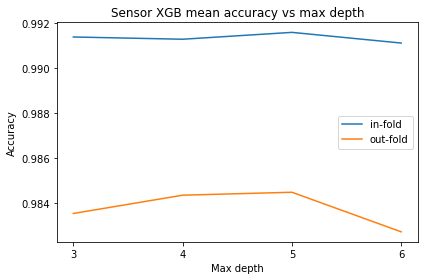

In [52]:
in_fold_md_summary = xgb_results[(xgb_results['min_samples_split'] == min_samples_split_opt) &
                                 (xgb_results['learning_rate'] == learning_rate_opt)].groupby(['max_depth'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['max_depth'], ascending = True)
out_fold_md_summary = xgb_results[(xgb_results['min_samples_split'] == min_samples_split_opt) &
                                  (xgb_results['learning_rate'] == learning_rate_opt)].groupby(['max_depth'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['max_depth'], ascending = True)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MaxNLocator(integer = True))

ax.set_xlabel("Max depth")
ax.set_ylabel("Accuracy")
ax.set_title("Sensor XGB mean accuracy vs max depth")
ax.plot(max_depths,
        in_fold_md_summary['mean'],
        label = "in-fold")
ax.plot(max_depths,
        out_fold_md_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

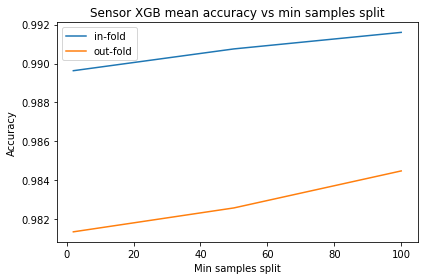

In [36]:
in_fold_mss_summary = xgb_results[(xgb_results['max_depth'] == max_depth_opt) &
                                 (xgb_results['learning_rate'] == learning_rate_opt)].groupby(['min_samples_split'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['min_samples_split'], ascending = True)
out_fold_mss_summary = xgb_results[(xgb_results['max_depth'] == max_depth_opt) &
                                  (xgb_results['learning_rate'] == learning_rate_opt)].groupby(['min_samples_split'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['min_samples_split'], ascending = True)


fig, ax = plt.subplots()

ax.set_xlabel("Min samples split")
ax.set_ylabel("Accuracy")
ax.set_title("Sensor XGB mean accuracy vs min samples split")
ax.plot(min_samples_splits,
        in_fold_mss_summary['mean'],
        label = "in-fold")
ax.plot(min_samples_splits,
        out_fold_mss_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

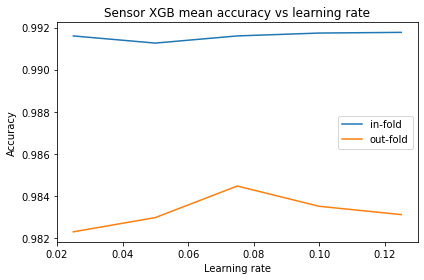

In [29]:
in_fold_lr_summary = xgb_results[(xgb_results['max_depth'] == max_depth_opt) &
                                 (xgb_results['min_samples_split'] == min_samples_split_opt)].groupby(['learning_rate'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['learning_rate'], ascending = True)
out_fold_lr_summary = xgb_results[(xgb_results['max_depth'] == max_depth_opt) &
                                  (xgb_results['min_samples_split'] == min_samples_split_opt)].groupby(['learning_rate'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['learning_rate'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("Learning rate")
ax.set_ylabel("Accuracy")
ax.set_title("Sensor XGB mean accuracy vs learning rate")
ax.plot(learning_rates,
        in_fold_lr_summary['mean'],
        label = "in-fold")
ax.plot(learning_rates,
        out_fold_lr_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

## Training size

In [31]:
xgb_train_sizes = []
xgb_train_size_train_scores = []
xgb_train_size_test_scores = []
xgb_train_size_train_time = []
xgb_train_size_score_time = []

iter_counter = 0
train_sizes = np.linspace(.05,.95, 19)
for train_size in train_sizes:
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(data_all_features,
                                                                            data_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    
    iter_counter = iter_counter + 1
    print("iter:", iter_counter,
          "| train size:", train_size)
    xgb_train_size = GradientBoostingClassifier(loss = "deviance", #deviance, exponential,
                                                       learning_rate = learning_rate_opt,
                                                       n_estimators = 1000,
                                                       subsample = 1.0,
                                                       criterion = "friedman_mse",
                                                       min_samples_split = min_samples_split_opt,
                                                       min_samples_leaf = 1,
                                                       min_weight_fraction_leaf = 0.0,
                                                       max_depth = max_depth_opt,
                                                       min_impurity_decrease = 0.0,
                                                       min_impurity_split = None,
                                                       init = None,
                                                       random_state = 28,
                                                       max_features = 25,
                                                       #verbose = 1,
                                                       max_leaf_nodes = None,
                                                       warm_start = False,
                                                       #presort = 'auto',
                                                       validation_fraction = 0.25,
                                                       n_iter_no_change = 25,
                                                       #tol = 0.0001
                                                      )
    
    start = time.time()
    xgb_train_size.fit(train_features_train_size, train_response_train_size)
    end = time.time()
    xgb_train_size_train_time.append(end - start)
    
    xgb_train_sizes.append(xgb_train_size)
    
    start = time.time()
    xgb_train_size_train_scores.append(xgb_train_size.score(train_features_train_size, train_response_train_size)) 
    end = time.time()
    xgb_train_size_score_time.append(end - start)

    xgb_train_size_test_scores.append(xgb_train_size.score(test_features_train_size, test_response_train_size))

iter: 1 | train size: 0.05
iter: 2 | train size: 0.1
iter: 3 | train size: 0.15
iter: 4 | train size: 0.2
iter: 5 | train size: 0.25
iter: 6 | train size: 0.3
iter: 7 | train size: 0.35
iter: 8 | train size: 0.39999999999999997
iter: 9 | train size: 0.44999999999999996
iter: 10 | train size: 0.49999999999999994
iter: 11 | train size: 0.5499999999999999
iter: 12 | train size: 0.6
iter: 13 | train size: 0.65
iter: 14 | train size: 0.7
iter: 15 | train size: 0.75
iter: 16 | train size: 0.7999999999999999
iter: 17 | train size: 0.85
iter: 18 | train size: 0.9
iter: 19 | train size: 0.95


### Plotting the learning curve by training size, for the optimal hyperparameters

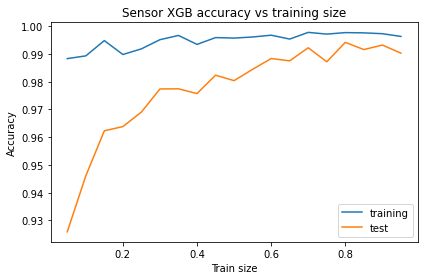

In [32]:
fig, ax = plt.subplots()
ax.set_xlabel("Train size")
ax.set_ylabel("Accuracy")
ax.set_title("Sensor XGB accuracy vs training size")
ax.plot(train_sizes, xgb_train_size_train_scores, label = "training",
        #drawstyle = "steps-post"
       )
ax.plot(train_sizes, xgb_train_size_test_scores, label = "test",
        #drawstyle = "steps-post"
       )
ax.legend()
fig.tight_layout()

###  Plotting the model fitting time as a function of the training size

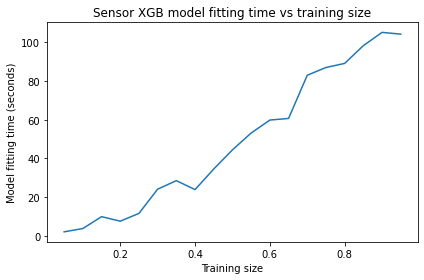

In [33]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Model fitting time (seconds)")
ax.set_title("Sensor XGB model fitting time vs training size")
ax.plot(train_sizes, xgb_train_size_train_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()

### Plotting the model scoring time as a function of the training size

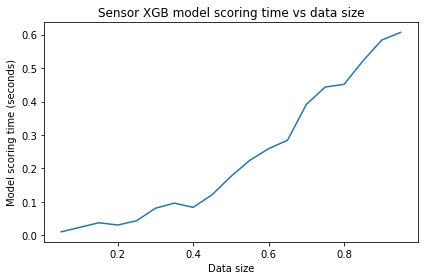

In [34]:
fig, ax = plt.subplots()

ax.set_xlabel("Data size")
ax.set_ylabel("Model scoring time (seconds)")
ax.set_title("Sensor XGB model scoring time vs data size")
ax.plot(train_sizes, xgb_train_size_score_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()